# Table of Contents

* [Import Packages](#Packages)
* [Left Hippocampus Segmentation All Brains](#left_hippocampus)

<a class="anchor" id="Packages"></a>

In [1]:
import scipy
# numpy
import numpy
# matplotlib
import matplotlib
# pandas
import pandas
# scikit-learn
import sklearn
from sklearn import metrics

from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.metrics import accuracy_score
from sklearn.metrics import average_precision_score
import pandas as pd
import seaborn as sns
import numpy as np
# Load libraries
from pandas import read_csv
from sklearn.metrics import mean_squared_error
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import label_binarize
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import BaggingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neural_network import MLPClassifier
from numpy import loadtxt
#from xgboost import XGBClassifier
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import roc_curve
from sklearn.multiclass import OneVsRestClassifier
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve
from itertools import cycle
from sklearn.impute import SimpleImputer
from numpy import mean
from numpy import std
from sklearn.metrics import auc
from sklearn.metrics import make_scorer
from scipy.stats import mannwhitneyu
from scipy.stats import kruskal
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap.umap_ as umap
import statsmodels.api as sm
import random
from scipy.stats import shapiro
from scipy.stats import levene
from scipy.stats import bartlett
from scipy.stats import ttest_ind
import matplotlib.colors as mcolors


# clustering packages 
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import normalize
from kneed import KneeLocator
from sklearn.cluster import KMeans

# Packages for importing data
import glob
import time

# Packages needed for defining which file should be added to which dictionary using regex
import re

# Package needed for labeling points in graph
from adjustText import adjust_text

# Packages for image segmentation 
%matplotlib ipympl
import ipywidgets as widgets
import urllib
import matplotlib.cbook as cbook
from mpl_interactions import image_segmenter
import PIL

<a class="anchor" id="Brain"></a>

Below we import a brain and show one ion that lights up the brain very well - 303.2328

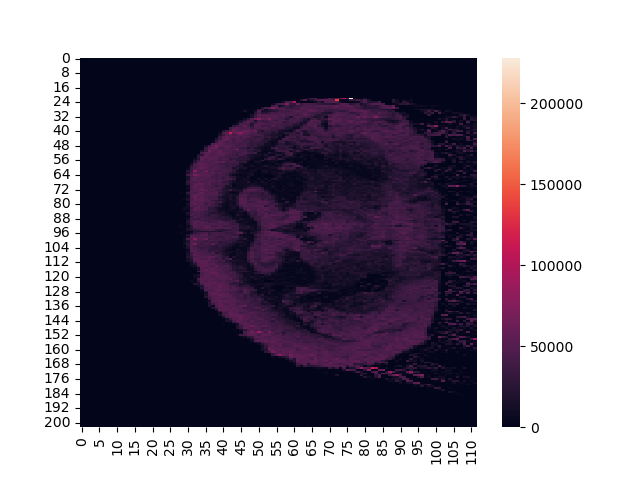

In [2]:
num_metabolites_negative = 10783
# Import metabolomics matrix only
metabolomics_matrix_249_4_Tg_s3 = pd.read_csv('Z:/All AGE Positive TL/AL010323_AGE_249_4_Tg_s3_pos on DESI HDMS_TLall.txt', sep = '\t', usecols = [i for i in range(3, num_metabolites_negative+3)], header = 2)
# Drop retention time
metabolomics_matrix_249_4_Tg_s3 = metabolomics_matrix_249_4_Tg_s3.drop(0)
# Reset index to start with 0
metabolomics_matrix_249_4_Tg_s3 = metabolomics_matrix_249_4_Tg_s3.reset_index(drop = True)
# Read in coordinates for metabolomics matrix
coordinates_matrix_249_4_Tg_s3 = pd.read_csv('Z:/All AGE Positive TL/AL010323_AGE_249_4_Tg_s3_pos on DESI HDMS_TLall.txt', sep = '\t', usecols = [i for i in range(1,3)], skiprows = 5, names = ['x_coord', 'y_coord'])
# Below we plot the ion 303.2328 (the second ion in the list)
uniform_data_249_4_Tg_s3 = np.array(metabolomics_matrix_249_4_Tg_s3).T.reshape([num_metabolites_negative, len(coordinates_matrix_249_4_Tg_s3[coordinates_matrix_249_4_Tg_s3['x_coord'] == coordinates_matrix_249_4_Tg_s3.iloc[0][0]]), len(coordinates_matrix_249_4_Tg_s3[coordinates_matrix_249_4_Tg_s3['y_coord'] == coordinates_matrix_249_4_Tg_s3.iloc[0][1]])])[metabolomics_matrix_249_4_Tg_s3.columns.get_loc('773.5269')]
ax = sns.heatmap(uniform_data_249_4_Tg_s3)
plt.show()

<a class="anchor" id="left_hippocampus"></a>
Below we use the segmentation tool from the mpl_interactions package. This allows us to easily trace a region of interest of an image and even spits out the coordinates for the mask we want to use!

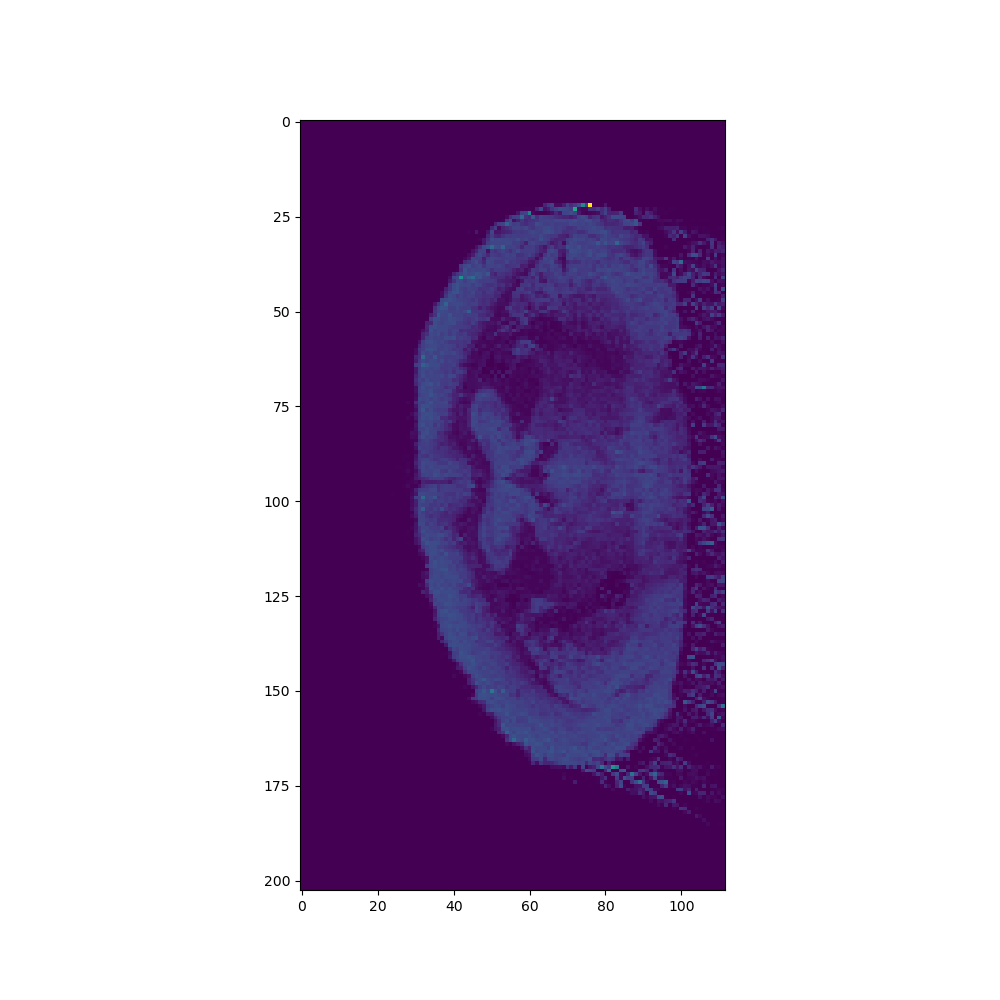

In [3]:
classes = ['Left Hippocampus']

# Define number of rois (here just 1 since we want the Left Hippocampus)
N_classes = 1
class_selector = widgets.Dropdown(options=classes, description="class")


def update(change):
    segmenter_249_4_Tg_s3_left_hippocampus.current_class = class_selector.value
    segmenter_249_4_Tg_s3_left_hippocampus.erasing = erasing_button.value


erasing_button = widgets.Checkbox(value=False, description="Erasing")
erasing_button.observe(update, names="value")

class_selector.observe(update, names="value")
# Define number of classes (rois) as N_classes set above
segmenter_249_4_Tg_s3_left_hippocampus = image_segmenter(uniform_data_249_4_Tg_s3, nclasses = N_classes, mask_alpha=0.76)
display(widgets.HBox([erasing_button, class_selector]))
display(segmenter_249_4_Tg_s3_left_hippocampus)

Below we set all background pixels to zero, and calculate the percentages of all ions within the brain and save these results.

In [4]:
# Make variable for mask
mask_249_4_Tg_s3_left_hippocampus = segmenter_249_4_Tg_s3_left_hippocampus.mask
# Create mask for pixels to tell where brain matter is
coordinates_roi_249_4_Tg_s3_left_hippocampus = pd.DataFrame(mask_249_4_Tg_s3_left_hippocampus.reshape(len(coordinates_matrix_249_4_Tg_s3)))
print('Number of pixels in mask:', len(coordinates_roi_249_4_Tg_s3_left_hippocampus[coordinates_roi_249_4_Tg_s3_left_hippocampus[0] == 1]))

# Make copy of metabolomics matrix to use as identifier of pixels for brain matter
metabolomics_matrix_249_4_Tg_s3_for_pixel_identities_left_hippocampus = metabolomics_matrix_249_4_Tg_s3.copy()
# Add segmentation labels to metabolomics matrix
metabolomics_matrix_249_4_Tg_s3_for_pixel_identities_left_hippocampus['roi'] = coordinates_roi_249_4_Tg_s3_left_hippocampus
# Specify the pixels are from the background
metabolomics_matrix_249_4_Tg_s3_for_pixel_identities_left_hippocampus.loc[metabolomics_matrix_249_4_Tg_s3_for_pixel_identities_left_hippocampus.roi == 0, :] = 0
# Drop identity column
metabolomics_matrix_249_4_Tg_s3_for_pixel_identities_left_hippocampus = metabolomics_matrix_249_4_Tg_s3_for_pixel_identities_left_hippocampus.drop(columns = 'roi')
# Save dataframe results
metabolomics_matrix_249_4_Tg_s3_for_pixel_identities_left_hippocampus.to_csv('Z:/All AGE Positive masks and roi sums/Left Hippocampus/249_4_Tg_s3_pixel_matrix_with_mask_left_hippocampus.csv')
metabolomics_matrix_249_4_Tg_s3_for_pixel_identities_left_hippocampus.to_csv('N:/All AGE Positive masks and roi sums/Left Hippocampus/249_4_Tg_s3_pixel_matrix_with_mask_left_hippocampus.csv')
# Find total number of pixels
metabolomics_matrix_249_4_Tg_s3_for_pixel_identities_left_hippocampus_pixel_count = len(metabolomics_matrix_249_4_Tg_s3_for_pixel_identities_left_hippocampus[metabolomics_matrix_249_4_Tg_s3_for_pixel_identities_left_hippocampus.sum(axis = 1) != 0])

# Find total ion current for pixel spectra
sum_by_pixel = metabolomics_matrix_249_4_Tg_s3_for_pixel_identities_left_hippocampus.sum(axis=1)
# Divide pixel values by pixel sum for all pixels
metabolomics_matrix_249_4_Tg_s3_for_pixel_identities_left_hippocampus_tic_normalized_pixel = metabolomics_matrix_249_4_Tg_s3_for_pixel_identities_left_hippocampus.divide(sum_by_pixel, axis=0)
# Sum values for ions
sums_of_ion_intensities_metabolomics_matrix_249_4_Tg_s3_for_pixel_identities_left_hippocampus_tic_normalized_pixel = metabolomics_matrix_249_4_Tg_s3_for_pixel_identities_left_hippocampus_tic_normalized_pixel.sum(axis = 0)
sums_of_ion_intensities_metabolomics_matrix_249_4_Tg_s3_for_pixel_identities_left_hippocampus_tic_normalized_pixel.to_csv('Z:/All AGE Positive masks and roi sums/Left Hippocampus/249_4_Tg_s3_sum_of_ions_within_left_hippocampus.csv')
# Divide by brain size to get normalized ion sums
sums_of_ion_intensities_metabolomics_matrix_249_4_Tg_s3_for_pixel_identities_left_hippocampus_tic_normalized_pixel_normalized_brain = sums_of_ion_intensities_metabolomics_matrix_249_4_Tg_s3_for_pixel_identities_left_hippocampus_tic_normalized_pixel/metabolomics_matrix_249_4_Tg_s3_for_pixel_identities_left_hippocampus_pixel_count
# Take sum of all values to get total ion count
total_sum_roi_normalized_249_4_Tg_s3_left_hippocampus = sums_of_ion_intensities_metabolomics_matrix_249_4_Tg_s3_for_pixel_identities_left_hippocampus_tic_normalized_pixel_normalized_brain.sum()
# Divide by total ion count and multiply by 100 to get final percentage
sums_of_ion_intensities_roi_percentage_normalized_249_4_Tg_s3_left_hippocampus = sums_of_ion_intensities_metabolomics_matrix_249_4_Tg_s3_for_pixel_identities_left_hippocampus_tic_normalized_pixel_normalized_brain/total_sum_roi_normalized_249_4_Tg_s3_left_hippocampus*100
sums_of_ion_intensities_roi_percentage_normalized_249_4_Tg_s3_left_hippocampus.to_csv('Z:/All AGE Positive masks and roi sums/Left Hippocampus/249_4_Tg_s3_percentage_of_ions_within_left_hippocampus.csv')

Number of pixels in mask: 240


<a class="anchor" id="Brain"></a>

Below we import a brain and show one ion that lights up the brain very well - 303.2328

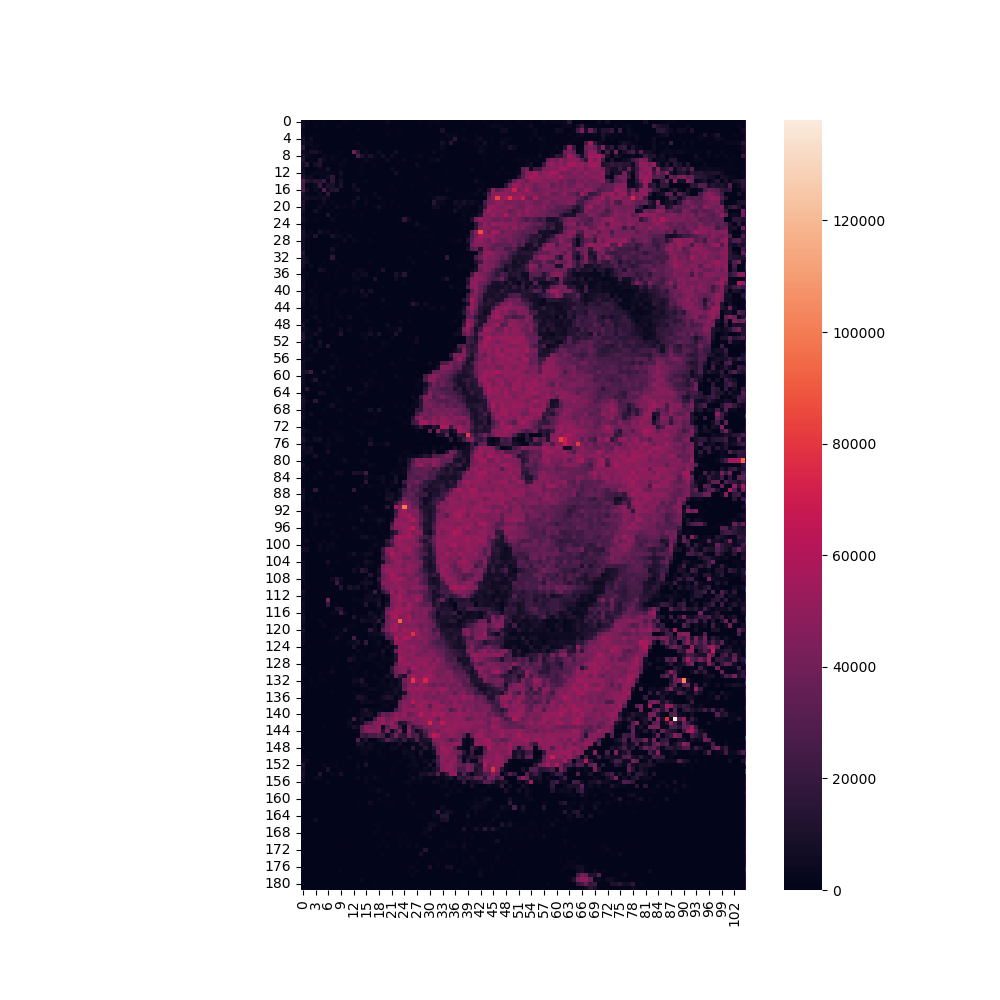

In [5]:
num_metabolites_negative = 10783
# Import metabolomics matrix only
metabolomics_matrix_256_2_WT_s4 = pd.read_csv('Z:/All AGE Positive TL/AL010323_AGE_256_2_WT_s4_pos on DESI HDMS_TLall.txt', sep = '\t', usecols = [i for i in range(3, num_metabolites_negative+3)], header = 2)
# Drop retention time
metabolomics_matrix_256_2_WT_s4 = metabolomics_matrix_256_2_WT_s4.drop(0)
# Reset index to start with 0
metabolomics_matrix_256_2_WT_s4 = metabolomics_matrix_256_2_WT_s4.reset_index(drop = True)
# Read in coordinates for metabolomics matrix
coordinates_matrix_256_2_WT_s4 = pd.read_csv('Z:/All AGE Positive TL/AL010323_AGE_256_2_WT_s4_pos on DESI HDMS_TLall.txt', sep = '\t', usecols = [i for i in range(1,3)], skiprows = 5, names = ['x_coord', 'y_coord'])
# Below we plot the ion 303.2328 (the second ion in the list)
uniform_data_256_2_WT_s4 = np.array(metabolomics_matrix_256_2_WT_s4).T.reshape([num_metabolites_negative, len(coordinates_matrix_256_2_WT_s4[coordinates_matrix_256_2_WT_s4['x_coord'] == coordinates_matrix_256_2_WT_s4.iloc[0][0]]), len(coordinates_matrix_256_2_WT_s4[coordinates_matrix_256_2_WT_s4['y_coord'] == coordinates_matrix_256_2_WT_s4.iloc[0][1]])])[metabolomics_matrix_256_2_WT_s4.columns.get_loc('773.5269')]
ax = sns.heatmap(uniform_data_256_2_WT_s4)
plt.show()

<a class="anchor" id="left_hippocampus"></a>
Below we use the segmentation tool from the mpl_interactions package. This allows us to easily trace a region of interest of an image and even spits out the coordinates for the mask we want to use!

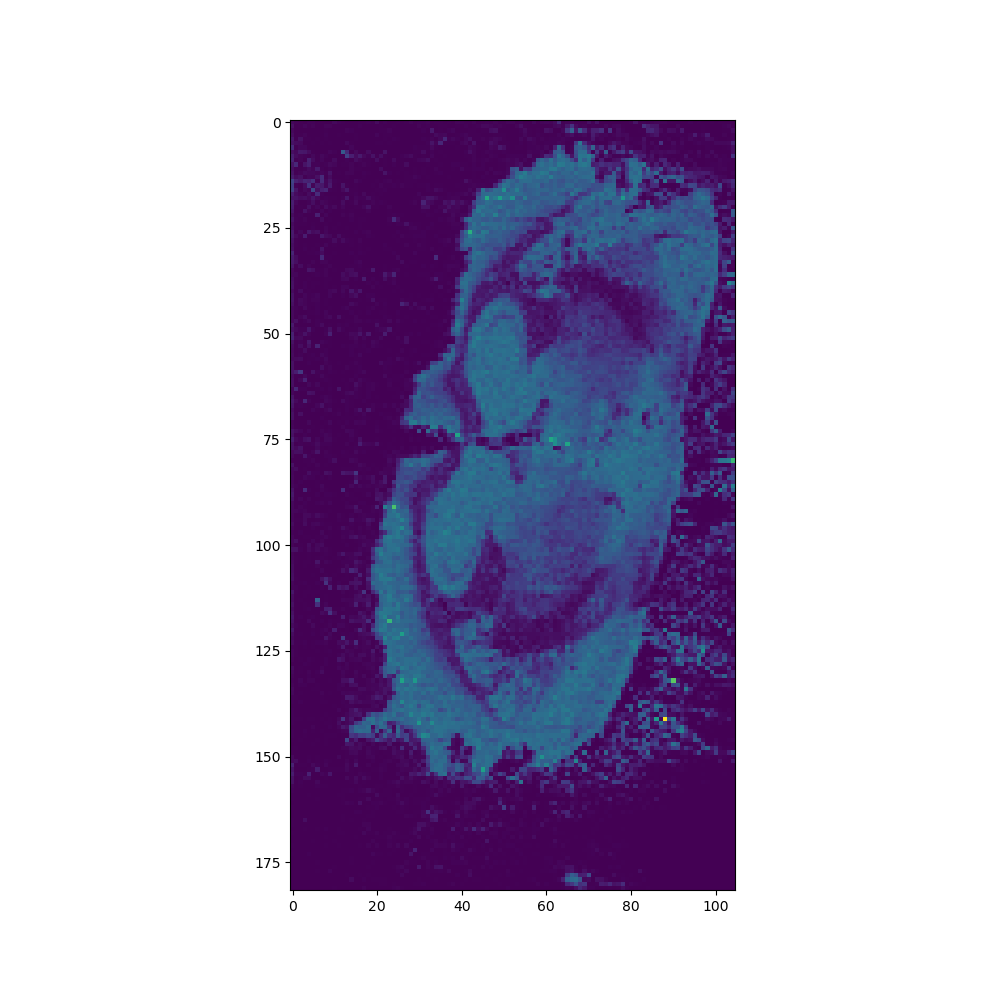

In [6]:
classes = ['Left Hippocampus']

# Define number of rois (here just 1 since we want the Left Hippocampus)
N_classes = 1
class_selector = widgets.Dropdown(options=classes, description="class")


def update(change):
    segmenter_256_2_WT_s4_left_hippocampus.current_class = class_selector.value
    segmenter_256_2_WT_s4_left_hippocampus.erasing = erasing_button.value


erasing_button = widgets.Checkbox(value=False, description="Erasing")
erasing_button.observe(update, names="value")

class_selector.observe(update, names="value")
# Define number of classes (rois) as N_classes set above
segmenter_256_2_WT_s4_left_hippocampus = image_segmenter(uniform_data_256_2_WT_s4, nclasses = N_classes, mask_alpha=0.76)
display(widgets.HBox([erasing_button, class_selector]))
display(segmenter_256_2_WT_s4_left_hippocampus)

Below we set all background pixels to zero, and calculate the percentages of all ions within the brain and save these results.

In [7]:
# Make variable for mask
mask_256_2_WT_s4_left_hippocampus = segmenter_256_2_WT_s4_left_hippocampus.mask
# Create mask for pixels to tell where brain matter is
coordinates_roi_256_2_WT_s4_left_hippocampus = pd.DataFrame(mask_256_2_WT_s4_left_hippocampus.reshape(len(coordinates_matrix_256_2_WT_s4)))
print('Number of pixels in mask:', len(coordinates_roi_256_2_WT_s4_left_hippocampus[coordinates_roi_256_2_WT_s4_left_hippocampus[0] == 1]))

# Make copy of metabolomics matrix to use as identifier of pixels for brain matter
metabolomics_matrix_256_2_WT_s4_for_pixel_identities_left_hippocampus = metabolomics_matrix_256_2_WT_s4.copy()
# Add segmentation labels to metabolomics matrix
metabolomics_matrix_256_2_WT_s4_for_pixel_identities_left_hippocampus['roi'] = coordinates_roi_256_2_WT_s4_left_hippocampus
# Specify the pixels are from the background
metabolomics_matrix_256_2_WT_s4_for_pixel_identities_left_hippocampus.loc[metabolomics_matrix_256_2_WT_s4_for_pixel_identities_left_hippocampus.roi == 0, :] = 0
# Drop identity column
metabolomics_matrix_256_2_WT_s4_for_pixel_identities_left_hippocampus = metabolomics_matrix_256_2_WT_s4_for_pixel_identities_left_hippocampus.drop(columns = 'roi')
# Save dataframe results
metabolomics_matrix_256_2_WT_s4_for_pixel_identities_left_hippocampus.to_csv('Z:/All AGE Positive masks and roi sums/Left Hippocampus/256_2_WT_s4_pixel_matrix_with_mask_left_hippocampus.csv')
metabolomics_matrix_256_2_WT_s4_for_pixel_identities_left_hippocampus.to_csv('N:/All AGE Positive masks and roi sums/Left Hippocampus/256_2_WT_s4_pixel_matrix_with_mask_left_hippocampus.csv')
# Find total number of pixels
metabolomics_matrix_256_2_WT_s4_for_pixel_identities_left_hippocampus_pixel_count = len(metabolomics_matrix_256_2_WT_s4_for_pixel_identities_left_hippocampus[metabolomics_matrix_256_2_WT_s4_for_pixel_identities_left_hippocampus.sum(axis = 1) != 0])

# Find total ion current for pixel spectra
sum_by_pixel = metabolomics_matrix_256_2_WT_s4_for_pixel_identities_left_hippocampus.sum(axis=1)
# Divide pixel values by pixel sum for all pixels
metabolomics_matrix_256_2_WT_s4_for_pixel_identities_left_hippocampus_tic_normalized_pixel = metabolomics_matrix_256_2_WT_s4_for_pixel_identities_left_hippocampus.divide(sum_by_pixel, axis=0)
# Sum values for ions
sums_of_ion_intensities_metabolomics_matrix_256_2_WT_s4_for_pixel_identities_left_hippocampus_tic_normalized_pixel = metabolomics_matrix_256_2_WT_s4_for_pixel_identities_left_hippocampus_tic_normalized_pixel.sum(axis = 0)
sums_of_ion_intensities_metabolomics_matrix_256_2_WT_s4_for_pixel_identities_left_hippocampus_tic_normalized_pixel.to_csv('Z:/All AGE Positive masks and roi sums/Left Hippocampus/256_2_WT_s4_sum_of_ions_within_left_hippocampus.csv')
# Divide by brain size to get normalized ion sums
sums_of_ion_intensities_metabolomics_matrix_256_2_WT_s4_for_pixel_identities_left_hippocampus_tic_normalized_pixel_normalized_brain = sums_of_ion_intensities_metabolomics_matrix_256_2_WT_s4_for_pixel_identities_left_hippocampus_tic_normalized_pixel/metabolomics_matrix_256_2_WT_s4_for_pixel_identities_left_hippocampus_pixel_count
# Take sum of all values to get total ion count
total_sum_roi_normalized_256_2_WT_s4_left_hippocampus = sums_of_ion_intensities_metabolomics_matrix_256_2_WT_s4_for_pixel_identities_left_hippocampus_tic_normalized_pixel_normalized_brain.sum()
# Divide by total ion count and multiply by 100 to get final percentage
sums_of_ion_intensities_roi_percentage_normalized_256_2_WT_s4_left_hippocampus = sums_of_ion_intensities_metabolomics_matrix_256_2_WT_s4_for_pixel_identities_left_hippocampus_tic_normalized_pixel_normalized_brain/total_sum_roi_normalized_256_2_WT_s4_left_hippocampus*100
sums_of_ion_intensities_roi_percentage_normalized_256_2_WT_s4_left_hippocampus.to_csv('Z:/All AGE Positive masks and roi sums/Left Hippocampus/256_2_WT_s4_percentage_of_ions_within_left_hippocampus.csv')

Number of pixels in mask: 466


<a class="anchor" id="Brain"></a>

Below we import a brain and show one ion that lights up the brain very well - 303.2328

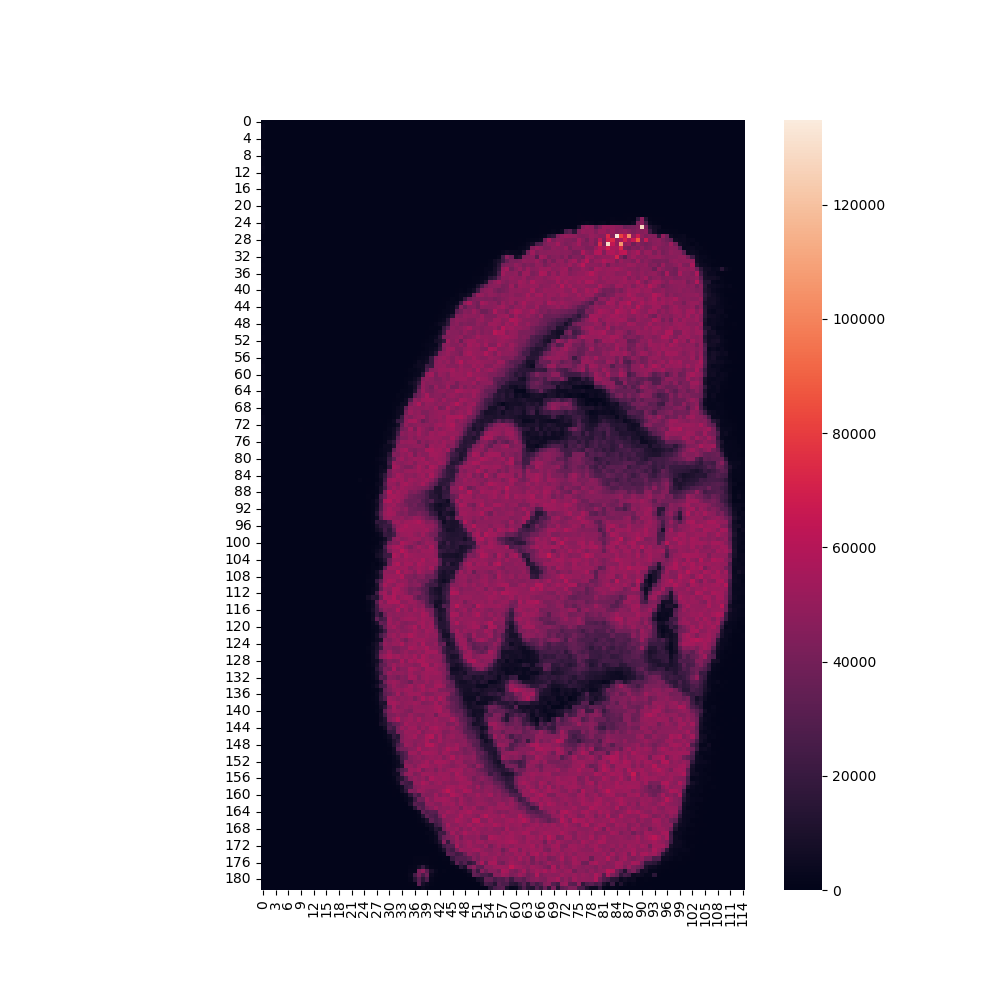

In [8]:
num_metabolites_negative = 10783
# Import metabolomics matrix only
metabolomics_matrix_308_3_Tg_s5 = pd.read_csv('Z:/All AGE Positive TL/AL011023_AGE_308_3_Tg_s5_pos on DESI HDMS_TLall.txt', sep = '\t', usecols = [i for i in range(3, num_metabolites_negative+3)], header = 2)
# Drop retention time
metabolomics_matrix_308_3_Tg_s5 = metabolomics_matrix_308_3_Tg_s5.drop(0)
# Reset index to start with 0
metabolomics_matrix_308_3_Tg_s5 = metabolomics_matrix_308_3_Tg_s5.reset_index(drop = True)
# Read in coordinates for metabolomics matrix
coordinates_matrix_308_3_Tg_s5 = pd.read_csv('Z:/All AGE Positive TL/AL011023_AGE_308_3_Tg_s5_pos on DESI HDMS_TLall.txt', sep = '\t', usecols = [i for i in range(1,3)], skiprows = 5, names = ['x_coord', 'y_coord'])
# Below we plot the ion 303.2328 (the second ion in the list)
uniform_data_308_3_Tg_s5 = np.array(metabolomics_matrix_308_3_Tg_s5).T.reshape([num_metabolites_negative, len(coordinates_matrix_308_3_Tg_s5[coordinates_matrix_308_3_Tg_s5['x_coord'] == coordinates_matrix_308_3_Tg_s5.iloc[0][0]]), len(coordinates_matrix_308_3_Tg_s5[coordinates_matrix_308_3_Tg_s5['y_coord'] == coordinates_matrix_308_3_Tg_s5.iloc[0][1]])])[metabolomics_matrix_308_3_Tg_s5.columns.get_loc('773.5269')]
ax = sns.heatmap(uniform_data_308_3_Tg_s5)
plt.show()

<a class="anchor" id="left_hippocampus"></a>
Below we use the segmentation tool from the mpl_interactions package. This allows us to easily trace a region of interest of an image and even spits out the coordinates for the mask we want to use!

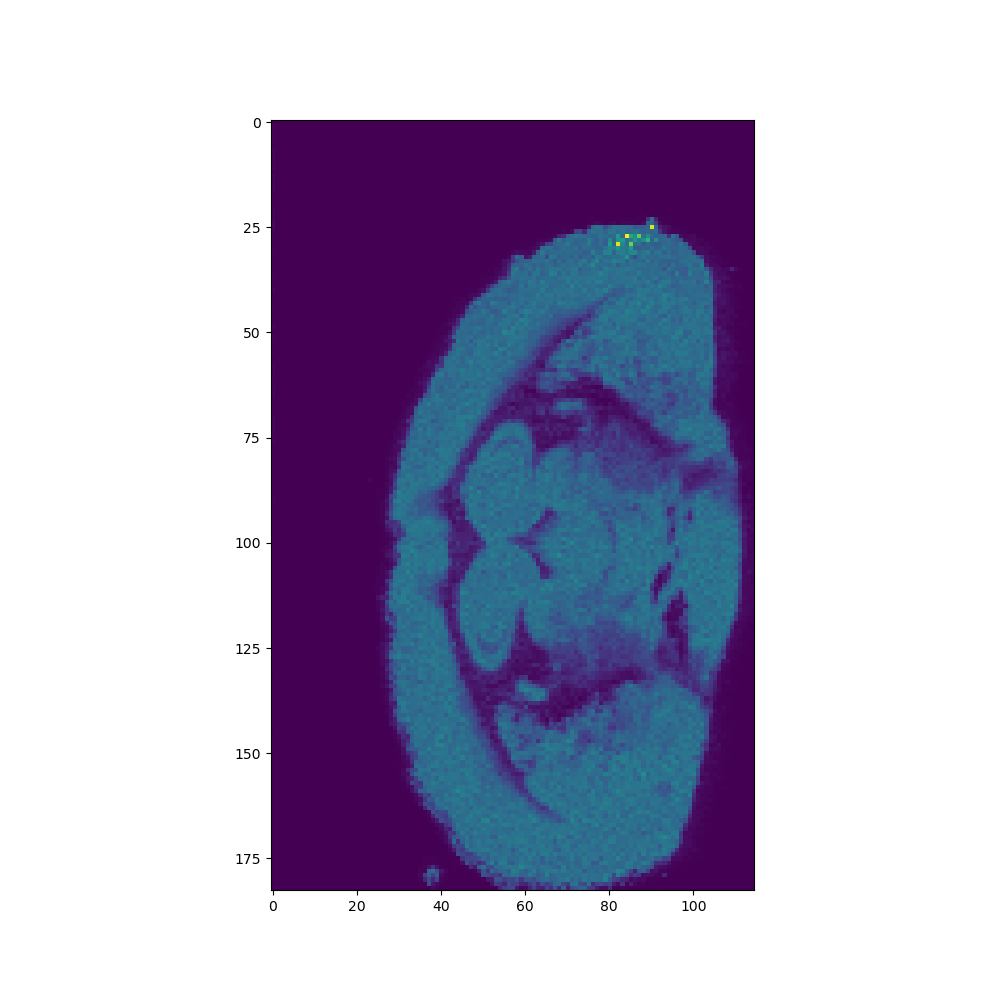

In [9]:
classes = ['Left Hippocampus']

# Define number of rois (here just 1 since we want the Left Hippocampus)
N_classes = 1
class_selector = widgets.Dropdown(options=classes, description="class")


def update(change):
    segmenter_308_3_Tg_s5_left_hippocampus.current_class = class_selector.value
    segmenter_308_3_Tg_s5_left_hippocampus.erasing = erasing_button.value


erasing_button = widgets.Checkbox(value=False, description="Erasing")
erasing_button.observe(update, names="value")

class_selector.observe(update, names="value")
# Define number of classes (rois) as N_classes set above
segmenter_308_3_Tg_s5_left_hippocampus = image_segmenter(uniform_data_308_3_Tg_s5, nclasses = N_classes, mask_alpha=0.76)
display(widgets.HBox([erasing_button, class_selector]))
display(segmenter_308_3_Tg_s5_left_hippocampus)

Below we set all background pixels to zero, and calculate the percentages of all ions within the brain and save these results.

In [10]:
# Make variable for mask
mask_308_3_Tg_s5_left_hippocampus = segmenter_308_3_Tg_s5_left_hippocampus.mask
# Create mask for pixels to tell where brain matter is
coordinates_roi_308_3_Tg_s5_left_hippocampus = pd.DataFrame(mask_308_3_Tg_s5_left_hippocampus.reshape(len(coordinates_matrix_308_3_Tg_s5)))
print('Number of pixels in mask:', len(coordinates_roi_308_3_Tg_s5_left_hippocampus[coordinates_roi_308_3_Tg_s5_left_hippocampus[0] == 1]))

# Make copy of metabolomics matrix to use as identifier of pixels for brain matter
metabolomics_matrix_308_3_Tg_s5_for_pixel_identities_left_hippocampus = metabolomics_matrix_308_3_Tg_s5.copy()
# Add segmentation labels to metabolomics matrix
metabolomics_matrix_308_3_Tg_s5_for_pixel_identities_left_hippocampus['roi'] = coordinates_roi_308_3_Tg_s5_left_hippocampus
# Specify the pixels are from the background
metabolomics_matrix_308_3_Tg_s5_for_pixel_identities_left_hippocampus.loc[metabolomics_matrix_308_3_Tg_s5_for_pixel_identities_left_hippocampus.roi == 0, :] = 0
# Drop identity column
metabolomics_matrix_308_3_Tg_s5_for_pixel_identities_left_hippocampus = metabolomics_matrix_308_3_Tg_s5_for_pixel_identities_left_hippocampus.drop(columns = 'roi')
# Save dataframe results
metabolomics_matrix_308_3_Tg_s5_for_pixel_identities_left_hippocampus.to_csv('Z:/All AGE Positive masks and roi sums/Left Hippocampus/308_3_Tg_s5_pixel_matrix_with_mask_left_hippocampus.csv')
metabolomics_matrix_308_3_Tg_s5_for_pixel_identities_left_hippocampus.to_csv('N:/All AGE Positive masks and roi sums/Left Hippocampus/308_3_Tg_s5_pixel_matrix_with_mask_left_hippocampus.csv')
# Find total number of pixels
metabolomics_matrix_308_3_Tg_s5_for_pixel_identities_left_hippocampus_pixel_count = len(metabolomics_matrix_308_3_Tg_s5_for_pixel_identities_left_hippocampus[metabolomics_matrix_308_3_Tg_s5_for_pixel_identities_left_hippocampus.sum(axis = 1) != 0])

# Find total ion current for pixel spectra
sum_by_pixel = metabolomics_matrix_308_3_Tg_s5_for_pixel_identities_left_hippocampus.sum(axis=1)
# Divide pixel values by pixel sum for all pixels
metabolomics_matrix_308_3_Tg_s5_for_pixel_identities_left_hippocampus_tic_normalized_pixel = metabolomics_matrix_308_3_Tg_s5_for_pixel_identities_left_hippocampus.divide(sum_by_pixel, axis=0)
# Sum values for ions
sums_of_ion_intensities_metabolomics_matrix_308_3_Tg_s5_for_pixel_identities_left_hippocampus_tic_normalized_pixel = metabolomics_matrix_308_3_Tg_s5_for_pixel_identities_left_hippocampus_tic_normalized_pixel.sum(axis = 0)
sums_of_ion_intensities_metabolomics_matrix_308_3_Tg_s5_for_pixel_identities_left_hippocampus_tic_normalized_pixel.to_csv('Z:/All AGE Positive masks and roi sums/Left Hippocampus/308_3_Tg_s5_sum_of_ions_within_left_hippocampus.csv')
# Divide by brain size to get normalized ion sums
sums_of_ion_intensities_metabolomics_matrix_308_3_Tg_s5_for_pixel_identities_left_hippocampus_tic_normalized_pixel_normalized_brain = sums_of_ion_intensities_metabolomics_matrix_308_3_Tg_s5_for_pixel_identities_left_hippocampus_tic_normalized_pixel/metabolomics_matrix_308_3_Tg_s5_for_pixel_identities_left_hippocampus_pixel_count
# Take sum of all values to get total ion count
total_sum_roi_normalized_308_3_Tg_s5_left_hippocampus = sums_of_ion_intensities_metabolomics_matrix_308_3_Tg_s5_for_pixel_identities_left_hippocampus_tic_normalized_pixel_normalized_brain.sum()
# Divide by total ion count and multiply by 100 to get final percentage
sums_of_ion_intensities_roi_percentage_normalized_308_3_Tg_s5_left_hippocampus = sums_of_ion_intensities_metabolomics_matrix_308_3_Tg_s5_for_pixel_identities_left_hippocampus_tic_normalized_pixel_normalized_brain/total_sum_roi_normalized_308_3_Tg_s5_left_hippocampus*100
sums_of_ion_intensities_roi_percentage_normalized_308_3_Tg_s5_left_hippocampus.to_csv('Z:/All AGE Positive masks and roi sums/Left Hippocampus/308_3_Tg_s5_percentage_of_ions_within_left_hippocampus.csv')

Number of pixels in mask: 382


<a class="anchor" id="Brain"></a>

Below we import a brain and show one ion that lights up the brain very well - 303.2328

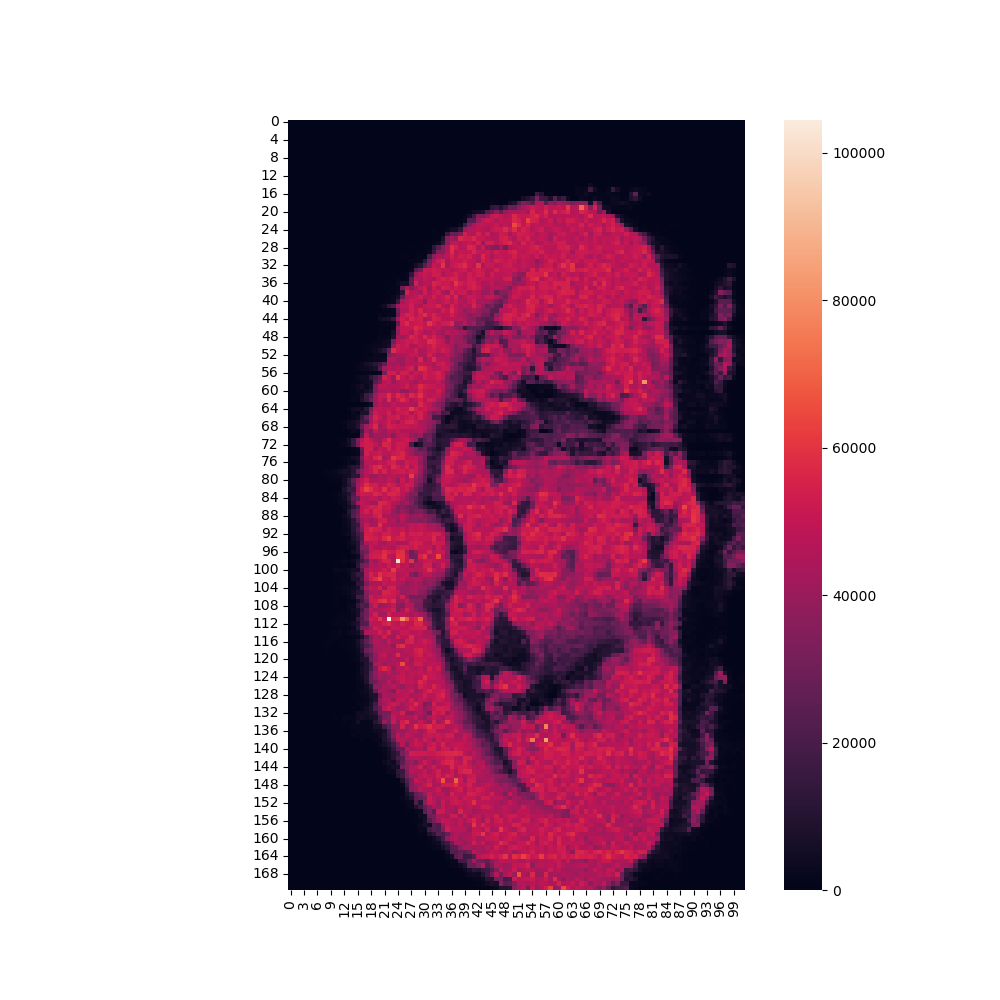

In [11]:
num_metabolites_negative = 10783
# Import metabolomics matrix only
metabolomics_matrix_308_4_WT_s2 = pd.read_csv('Z:/All AGE Positive TL/AL011023_AGE_308_4_WT_s2_pos on DESI HDMS_TLall.txt', sep = '\t', usecols = [i for i in range(3, num_metabolites_negative+3)], header = 2)
# Drop retention time
metabolomics_matrix_308_4_WT_s2 = metabolomics_matrix_308_4_WT_s2.drop(0)
# Reset index to start with 0
metabolomics_matrix_308_4_WT_s2 = metabolomics_matrix_308_4_WT_s2.reset_index(drop = True)
# Read in coordinates for metabolomics matrix
coordinates_matrix_308_4_WT_s2 = pd.read_csv('Z:/All AGE Positive TL/AL011023_AGE_308_4_WT_s2_pos on DESI HDMS_TLall.txt', sep = '\t', usecols = [i for i in range(1,3)], skiprows = 5, names = ['x_coord', 'y_coord'])
# Below we plot the ion 303.2328 (the second ion in the list)
uniform_data_308_4_WT_s2 = np.array(metabolomics_matrix_308_4_WT_s2).T.reshape([num_metabolites_negative, len(coordinates_matrix_308_4_WT_s2[coordinates_matrix_308_4_WT_s2['x_coord'] == coordinates_matrix_308_4_WT_s2.iloc[0][0]]), len(coordinates_matrix_308_4_WT_s2[coordinates_matrix_308_4_WT_s2['y_coord'] == coordinates_matrix_308_4_WT_s2.iloc[0][1]])])[metabolomics_matrix_308_4_WT_s2.columns.get_loc('773.5269')]
ax = sns.heatmap(uniform_data_308_4_WT_s2)
plt.show()

<a class="anchor" id="left_hippocampus"></a>
Below we use the segmentation tool from the mpl_interactions package. This allows us to easily trace a region of interest of an image and even spits out the coordinates for the mask we want to use!

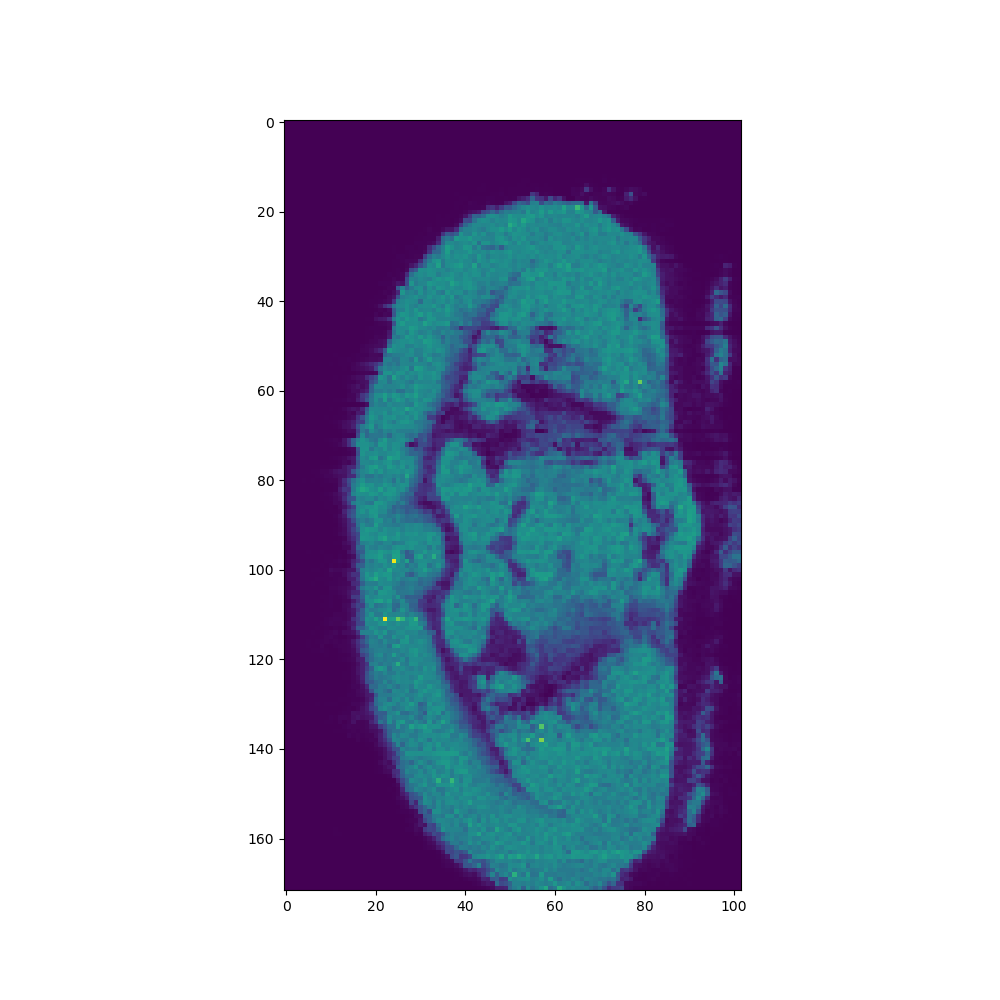

In [12]:
classes = ['Left Hippocampus']

# Define number of rois (here just 1 since we want the Left Hippocampus)
N_classes = 1
class_selector = widgets.Dropdown(options=classes, description="class")


def update(change):
    segmenter_308_4_WT_s2_left_hippocampus.current_class = class_selector.value
    segmenter_308_4_WT_s2_left_hippocampus.erasing = erasing_button.value


erasing_button = widgets.Checkbox(value=False, description="Erasing")
erasing_button.observe(update, names="value")

class_selector.observe(update, names="value")
# Define number of classes (rois) as N_classes set above
segmenter_308_4_WT_s2_left_hippocampus = image_segmenter(uniform_data_308_4_WT_s2, nclasses = N_classes, mask_alpha=0.76)
display(widgets.HBox([erasing_button, class_selector]))
display(segmenter_308_4_WT_s2_left_hippocampus)

Below we set all background pixels to zero, and calculate the percentages of all ions within the brain and save these results.

In [13]:
# Make variable for mask
mask_308_4_WT_s2_left_hippocampus = segmenter_308_4_WT_s2_left_hippocampus.mask
# Create mask for pixels to tell where brain matter is
coordinates_roi_308_4_WT_s2_left_hippocampus = pd.DataFrame(mask_308_4_WT_s2_left_hippocampus.reshape(len(coordinates_matrix_308_4_WT_s2)))
print('Number of pixels in mask:', len(coordinates_roi_308_4_WT_s2_left_hippocampus[coordinates_roi_308_4_WT_s2_left_hippocampus[0] == 1]))

# Make copy of metabolomics matrix to use as identifier of pixels for brain matter
metabolomics_matrix_308_4_WT_s2_for_pixel_identities_left_hippocampus = metabolomics_matrix_308_4_WT_s2.copy()
# Add segmentation labels to metabolomics matrix
metabolomics_matrix_308_4_WT_s2_for_pixel_identities_left_hippocampus['roi'] = coordinates_roi_308_4_WT_s2_left_hippocampus
# Specify the pixels are from the background
metabolomics_matrix_308_4_WT_s2_for_pixel_identities_left_hippocampus.loc[metabolomics_matrix_308_4_WT_s2_for_pixel_identities_left_hippocampus.roi == 0, :] = 0
# Drop identity column
metabolomics_matrix_308_4_WT_s2_for_pixel_identities_left_hippocampus = metabolomics_matrix_308_4_WT_s2_for_pixel_identities_left_hippocampus.drop(columns = 'roi')
# Save dataframe results
metabolomics_matrix_308_4_WT_s2_for_pixel_identities_left_hippocampus.to_csv('Z:/All AGE Positive masks and roi sums/Left Hippocampus/308_4_WT_s2_pixel_matrix_with_mask_left_hippocampus.csv')
metabolomics_matrix_308_4_WT_s2_for_pixel_identities_left_hippocampus.to_csv('N:/All AGE Positive masks and roi sums/Left Hippocampus/308_4_WT_s2_pixel_matrix_with_mask_left_hippocampus.csv')
# Find total number of pixels
metabolomics_matrix_308_4_WT_s2_for_pixel_identities_left_hippocampus_pixel_count = len(metabolomics_matrix_308_4_WT_s2_for_pixel_identities_left_hippocampus[metabolomics_matrix_308_4_WT_s2_for_pixel_identities_left_hippocampus.sum(axis = 1) != 0])

# Find total ion current for pixel spectra
sum_by_pixel = metabolomics_matrix_308_4_WT_s2_for_pixel_identities_left_hippocampus.sum(axis=1)
# Divide pixel values by pixel sum for all pixels
metabolomics_matrix_308_4_WT_s2_for_pixel_identities_left_hippocampus_tic_normalized_pixel = metabolomics_matrix_308_4_WT_s2_for_pixel_identities_left_hippocampus.divide(sum_by_pixel, axis=0)
# Sum values for ions
sums_of_ion_intensities_metabolomics_matrix_308_4_WT_s2_for_pixel_identities_left_hippocampus_tic_normalized_pixel = metabolomics_matrix_308_4_WT_s2_for_pixel_identities_left_hippocampus_tic_normalized_pixel.sum(axis = 0)
sums_of_ion_intensities_metabolomics_matrix_308_4_WT_s2_for_pixel_identities_left_hippocampus_tic_normalized_pixel.to_csv('Z:/All AGE Positive masks and roi sums/Left Hippocampus/308_4_WT_s2_sum_of_ions_within_left_hippocampus.csv')
# Divide by brain size to get normalized ion sums
sums_of_ion_intensities_metabolomics_matrix_308_4_WT_s2_for_pixel_identities_left_hippocampus_tic_normalized_pixel_normalized_brain = sums_of_ion_intensities_metabolomics_matrix_308_4_WT_s2_for_pixel_identities_left_hippocampus_tic_normalized_pixel/metabolomics_matrix_308_4_WT_s2_for_pixel_identities_left_hippocampus_pixel_count
# Take sum of all values to get total ion count
total_sum_roi_normalized_308_4_WT_s2_left_hippocampus = sums_of_ion_intensities_metabolomics_matrix_308_4_WT_s2_for_pixel_identities_left_hippocampus_tic_normalized_pixel_normalized_brain.sum()
# Divide by total ion count and multiply by 100 to get final percentage
sums_of_ion_intensities_roi_percentage_normalized_308_4_WT_s2_left_hippocampus = sums_of_ion_intensities_metabolomics_matrix_308_4_WT_s2_for_pixel_identities_left_hippocampus_tic_normalized_pixel_normalized_brain/total_sum_roi_normalized_308_4_WT_s2_left_hippocampus*100
sums_of_ion_intensities_roi_percentage_normalized_308_4_WT_s2_left_hippocampus.to_csv('Z:/All AGE Positive masks and roi sums/Left Hippocampus/308_4_WT_s2_percentage_of_ions_within_left_hippocampus.csv')

Number of pixels in mask: 262


<a class="anchor" id="Brain"></a>

Below we import a brain and show one ion that lights up the brain very well - 303.2328

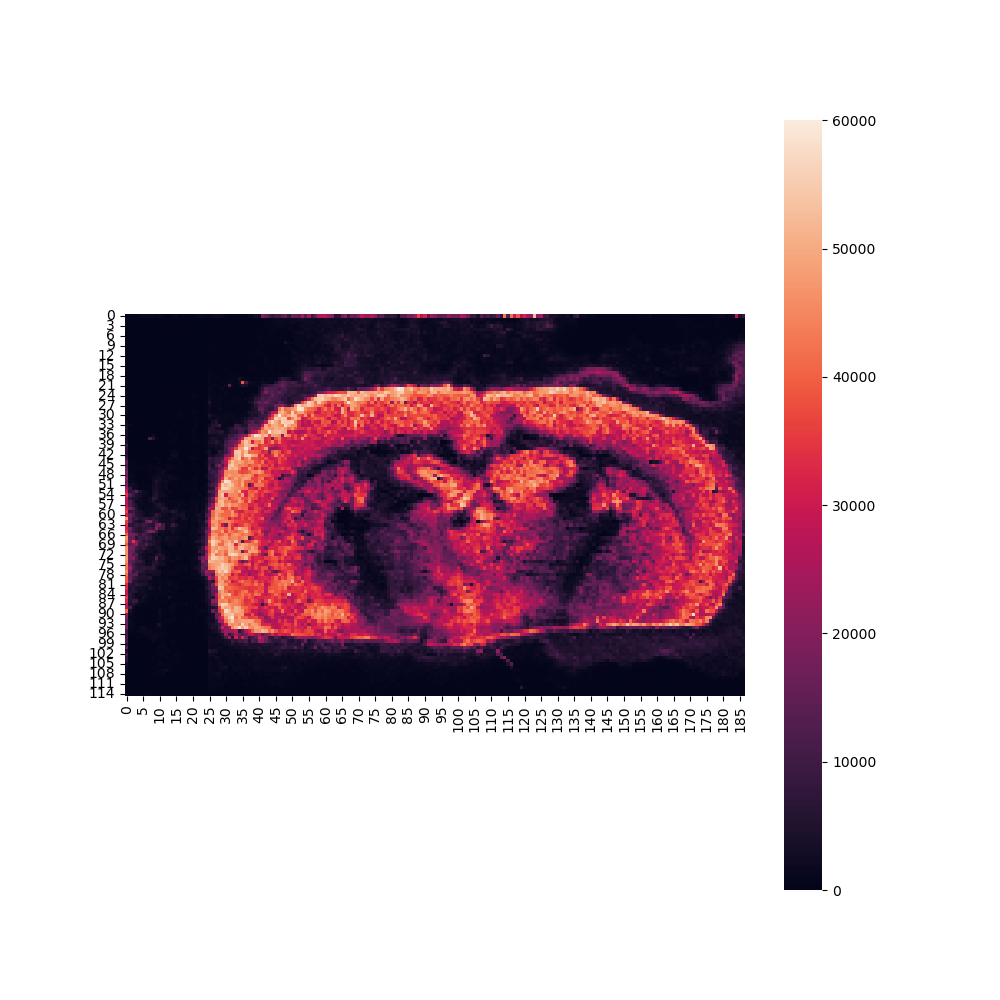

In [14]:
num_metabolites_negative = 10783
# Import metabolomics matrix only
metabolomics_matrix_226_a1_Tg_s3 = pd.read_csv('Z:/All AGE Positive TL/AL011123_AGE_226_a1_Tg_s3_pos_RE on DESI HDMS_TLall.txt', sep = '\t', usecols = [i for i in range(3, num_metabolites_negative+3)], header = 2)
# Drop retention time
metabolomics_matrix_226_a1_Tg_s3 = metabolomics_matrix_226_a1_Tg_s3.drop(0)
# Reset index to start with 0
metabolomics_matrix_226_a1_Tg_s3 = metabolomics_matrix_226_a1_Tg_s3.reset_index(drop = True)
# Read in coordinates for metabolomics matrix
coordinates_matrix_226_a1_Tg_s3 = pd.read_csv('Z:/All AGE Positive TL/AL011123_AGE_226_a1_Tg_s3_pos_RE on DESI HDMS_TLall.txt', sep = '\t', usecols = [i for i in range(1,3)], skiprows = 5, names = ['x_coord', 'y_coord'])
# Below we plot the ion 303.2328 (the second ion in the list)
uniform_data_226_a1_Tg_s3 = np.array(metabolomics_matrix_226_a1_Tg_s3).T.reshape([num_metabolites_negative, len(coordinates_matrix_226_a1_Tg_s3[coordinates_matrix_226_a1_Tg_s3['x_coord'] == coordinates_matrix_226_a1_Tg_s3.iloc[0][0]]), len(coordinates_matrix_226_a1_Tg_s3[coordinates_matrix_226_a1_Tg_s3['y_coord'] == coordinates_matrix_226_a1_Tg_s3.iloc[0][1]])])[metabolomics_matrix_226_a1_Tg_s3.columns.get_loc('773.5269')]
ax = sns.heatmap(uniform_data_226_a1_Tg_s3)
plt.show()

<a class="anchor" id="left_hippocampus"></a>
Below we use the segmentation tool from the mpl_interactions package. This allows us to easily trace a region of interest of an image and even spits out the coordinates for the mask we want to use!

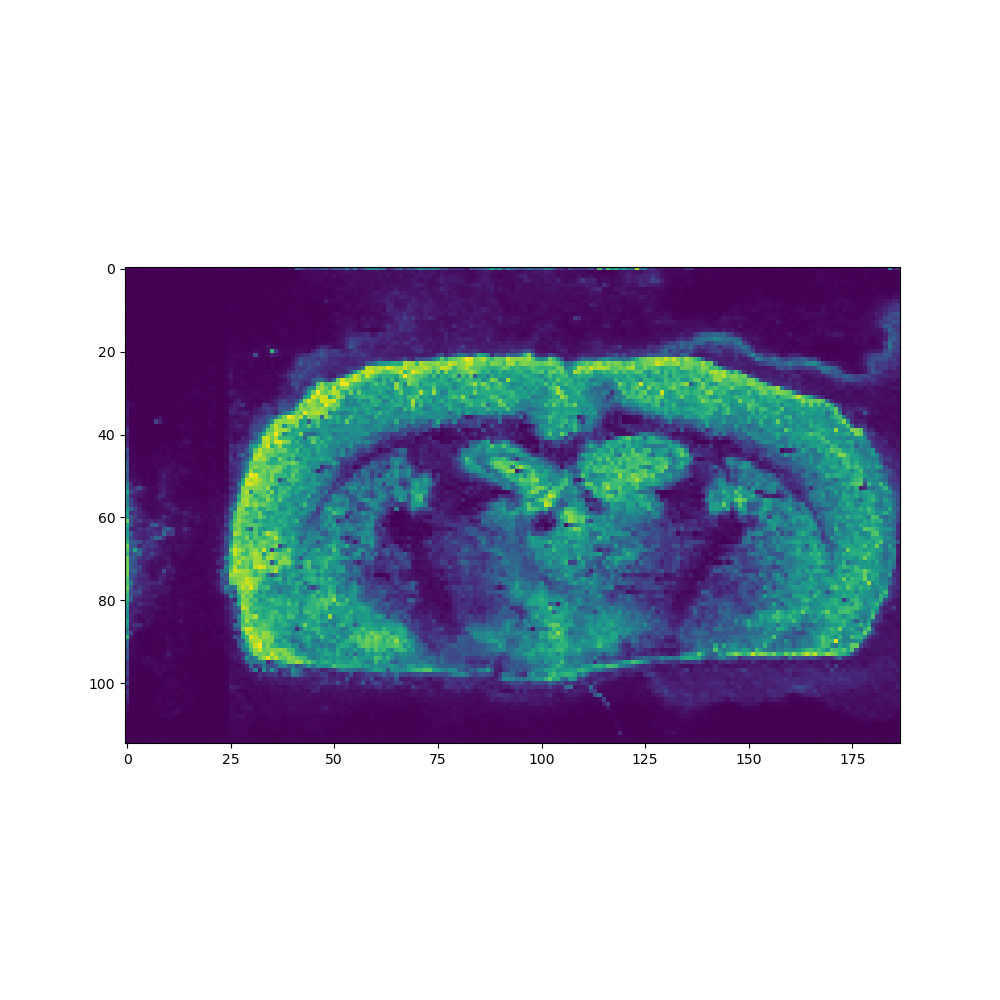

In [15]:
classes = ['Left Hippocampus']

# Define number of rois (here just 1 since we want the Left Hippocampus)
N_classes = 1
class_selector = widgets.Dropdown(options=classes, description="class")


def update(change):
    segmenter_226_a1_Tg_s3_left_hippocampus.current_class = class_selector.value
    segmenter_226_a1_Tg_s3_left_hippocampus.erasing = erasing_button.value


erasing_button = widgets.Checkbox(value=False, description="Erasing")
erasing_button.observe(update, names="value")

class_selector.observe(update, names="value")
# Define number of classes (rois) as N_classes set above
segmenter_226_a1_Tg_s3_left_hippocampus = image_segmenter(uniform_data_226_a1_Tg_s3, nclasses = N_classes, mask_alpha=0.76)
display(widgets.HBox([erasing_button, class_selector]))
display(segmenter_226_a1_Tg_s3_left_hippocampus)

Below we set all background pixels to zero, and calculate the percentages of all ions within the brain and save these results.

In [16]:
# Make variable for mask
mask_226_a1_Tg_s3_left_hippocampus = segmenter_226_a1_Tg_s3_left_hippocampus.mask
# Create mask for pixels to tell where brain matter is
coordinates_roi_226_a1_Tg_s3_left_hippocampus = pd.DataFrame(mask_226_a1_Tg_s3_left_hippocampus.reshape(len(coordinates_matrix_226_a1_Tg_s3)))
print('Number of pixels in mask:', len(coordinates_roi_226_a1_Tg_s3_left_hippocampus[coordinates_roi_226_a1_Tg_s3_left_hippocampus[0] == 1]))

# Make copy of metabolomics matrix to use as identifier of pixels for brain matter
metabolomics_matrix_226_a1_Tg_s3_for_pixel_identities_left_hippocampus = metabolomics_matrix_226_a1_Tg_s3.copy()
# Add segmentation labels to metabolomics matrix
metabolomics_matrix_226_a1_Tg_s3_for_pixel_identities_left_hippocampus['roi'] = coordinates_roi_226_a1_Tg_s3_left_hippocampus
# Specify the pixels are from the background
metabolomics_matrix_226_a1_Tg_s3_for_pixel_identities_left_hippocampus.loc[metabolomics_matrix_226_a1_Tg_s3_for_pixel_identities_left_hippocampus.roi == 0, :] = 0
# Drop identity column
metabolomics_matrix_226_a1_Tg_s3_for_pixel_identities_left_hippocampus = metabolomics_matrix_226_a1_Tg_s3_for_pixel_identities_left_hippocampus.drop(columns = 'roi')
# Save dataframe results
metabolomics_matrix_226_a1_Tg_s3_for_pixel_identities_left_hippocampus.to_csv('Z:/All AGE Positive masks and roi sums/Left Hippocampus/226_a1_Tg_s3_pixel_matrix_with_mask_left_hippocampus.csv')
metabolomics_matrix_226_a1_Tg_s3_for_pixel_identities_left_hippocampus.to_csv('N:/All AGE Positive masks and roi sums/Left Hippocampus/226_a1_Tg_s3_pixel_matrix_with_mask_left_hippocampus.csv')
# Find total number of pixels
metabolomics_matrix_226_a1_Tg_s3_for_pixel_identities_left_hippocampus_pixel_count = len(metabolomics_matrix_226_a1_Tg_s3_for_pixel_identities_left_hippocampus[metabolomics_matrix_226_a1_Tg_s3_for_pixel_identities_left_hippocampus.sum(axis = 1) != 0])

# Find total ion current for pixel spectra
sum_by_pixel = metabolomics_matrix_226_a1_Tg_s3_for_pixel_identities_left_hippocampus.sum(axis=1)
# Divide pixel values by pixel sum for all pixels
metabolomics_matrix_226_a1_Tg_s3_for_pixel_identities_left_hippocampus_tic_normalized_pixel = metabolomics_matrix_226_a1_Tg_s3_for_pixel_identities_left_hippocampus.divide(sum_by_pixel, axis=0)
# Sum values for ions
sums_of_ion_intensities_metabolomics_matrix_226_a1_Tg_s3_for_pixel_identities_left_hippocampus_tic_normalized_pixel = metabolomics_matrix_226_a1_Tg_s3_for_pixel_identities_left_hippocampus_tic_normalized_pixel.sum(axis = 0)
sums_of_ion_intensities_metabolomics_matrix_226_a1_Tg_s3_for_pixel_identities_left_hippocampus_tic_normalized_pixel.to_csv('Z:/All AGE Positive masks and roi sums/Left Hippocampus/226_a1_Tg_s3_sum_of_ions_within_left_hippocampus.csv')
# Divide by brain size to get normalized ion sums
sums_of_ion_intensities_metabolomics_matrix_226_a1_Tg_s3_for_pixel_identities_left_hippocampus_tic_normalized_pixel_normalized_brain = sums_of_ion_intensities_metabolomics_matrix_226_a1_Tg_s3_for_pixel_identities_left_hippocampus_tic_normalized_pixel/metabolomics_matrix_226_a1_Tg_s3_for_pixel_identities_left_hippocampus_pixel_count
# Take sum of all values to get total ion count
total_sum_roi_normalized_226_a1_Tg_s3_left_hippocampus = sums_of_ion_intensities_metabolomics_matrix_226_a1_Tg_s3_for_pixel_identities_left_hippocampus_tic_normalized_pixel_normalized_brain.sum()
# Divide by total ion count and multiply by 100 to get final percentage
sums_of_ion_intensities_roi_percentage_normalized_226_a1_Tg_s3_left_hippocampus = sums_of_ion_intensities_metabolomics_matrix_226_a1_Tg_s3_for_pixel_identities_left_hippocampus_tic_normalized_pixel_normalized_brain/total_sum_roi_normalized_226_a1_Tg_s3_left_hippocampus*100
sums_of_ion_intensities_roi_percentage_normalized_226_a1_Tg_s3_left_hippocampus.to_csv('Z:/All AGE Positive masks and roi sums/Left Hippocampus/226_a1_Tg_s3_percentage_of_ions_within_left_hippocampus.csv')

Number of pixels in mask: 265


<a class="anchor" id="Brain"></a>

Below we import a brain and show one ion that lights up the brain very well - 303.2328

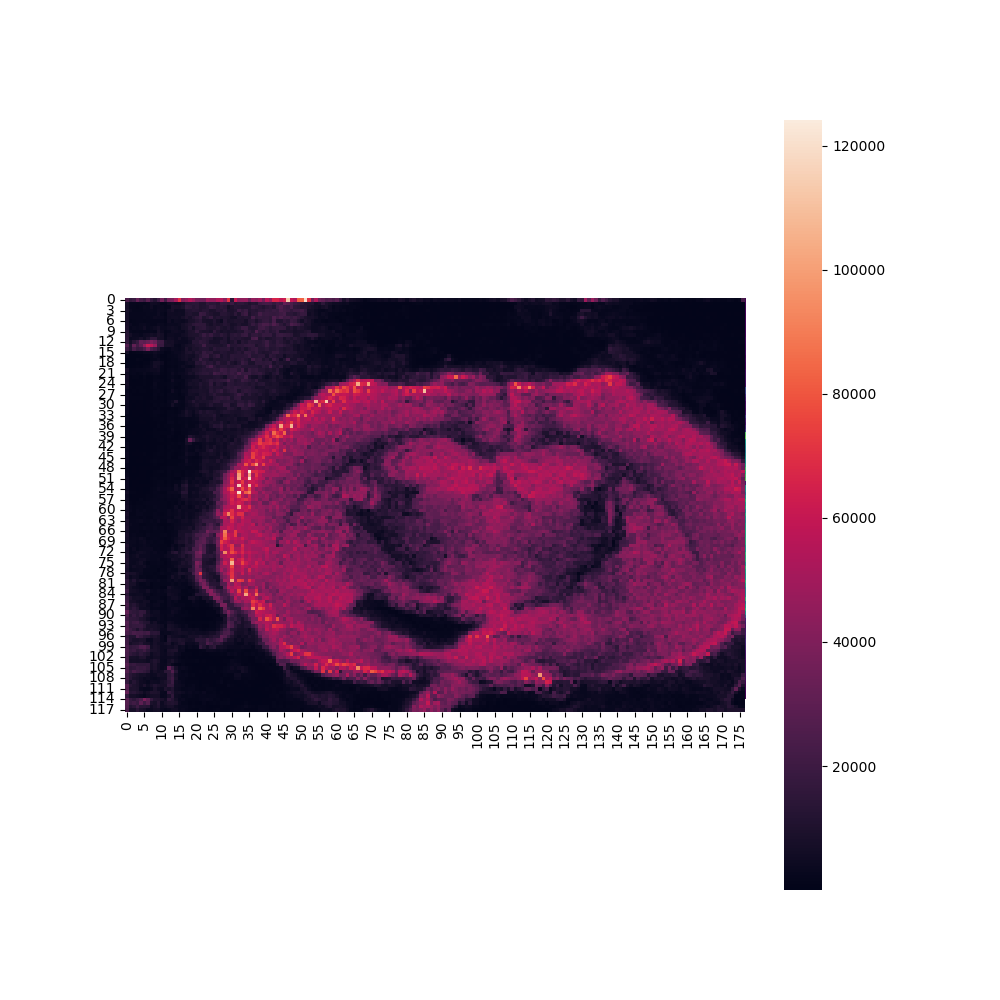

In [17]:
num_metabolites_negative = 10783
# Import metabolomics matrix only
metabolomics_matrix_226_a2_WT_s4 = pd.read_csv('Z:/All AGE Positive TL/AL011123_AGE_226_a2_WT_s4_pos_RE on DESI HDMS_TLall.txt', sep = '\t', usecols = [i for i in range(3, num_metabolites_negative+3)], header = 2)
# Drop retention time
metabolomics_matrix_226_a2_WT_s4 = metabolomics_matrix_226_a2_WT_s4.drop(0)
# Reset index to start with 0
metabolomics_matrix_226_a2_WT_s4 = metabolomics_matrix_226_a2_WT_s4.reset_index(drop = True)
# Read in coordinates for metabolomics matrix
coordinates_matrix_226_a2_WT_s4 = pd.read_csv('Z:/All AGE Positive TL/AL011123_AGE_226_a2_WT_s4_pos_RE on DESI HDMS_TLall.txt', sep = '\t', usecols = [i for i in range(1,3)], skiprows = 5, names = ['x_coord', 'y_coord'])
# Below we plot the ion 303.2328 (the second ion in the list)
uniform_data_226_a2_WT_s4 = np.array(metabolomics_matrix_226_a2_WT_s4).T.reshape([num_metabolites_negative, len(coordinates_matrix_226_a2_WT_s4[coordinates_matrix_226_a2_WT_s4['x_coord'] == coordinates_matrix_226_a2_WT_s4.iloc[0][0]]), len(coordinates_matrix_226_a2_WT_s4[coordinates_matrix_226_a2_WT_s4['y_coord'] == coordinates_matrix_226_a2_WT_s4.iloc[0][1]])])[metabolomics_matrix_226_a2_WT_s4.columns.get_loc('773.5269')]
ax = sns.heatmap(uniform_data_226_a2_WT_s4)
plt.show()

<a class="anchor" id="left_hippocampus"></a>
Below we use the segmentation tool from the mpl_interactions package. This allows us to easily trace a region of interest of an image and even spits out the coordinates for the mask we want to use!

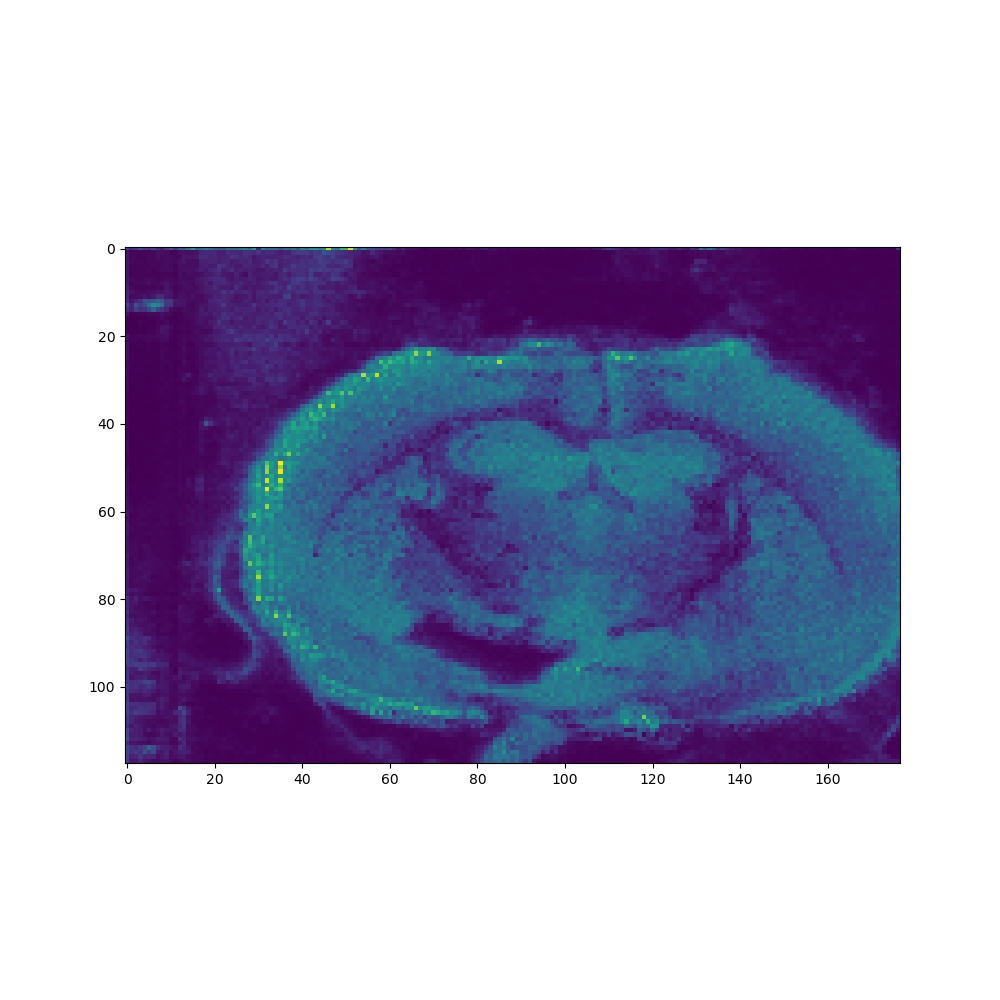

In [18]:
classes = ['Left Hippocampus']

# Define number of rois (here just 1 since we want the Left Hippocampus)
N_classes = 1
class_selector = widgets.Dropdown(options=classes, description="class")


def update(change):
    segmenter_226_a2_WT_s4_left_hippocampus.current_class = class_selector.value
    segmenter_226_a2_WT_s4_left_hippocampus.erasing = erasing_button.value


erasing_button = widgets.Checkbox(value=False, description="Erasing")
erasing_button.observe(update, names="value")

class_selector.observe(update, names="value")
# Define number of classes (rois) as N_classes set above
segmenter_226_a2_WT_s4_left_hippocampus = image_segmenter(uniform_data_226_a2_WT_s4, nclasses = N_classes, mask_alpha=0.76)
display(widgets.HBox([erasing_button, class_selector]))
display(segmenter_226_a2_WT_s4_left_hippocampus)

Below we set all background pixels to zero, and calculate the percentages of all ions within the brain and save these results.

In [19]:
# Make variable for mask
mask_226_a2_WT_s4_left_hippocampus = segmenter_226_a2_WT_s4_left_hippocampus.mask
# Create mask for pixels to tell where brain matter is
coordinates_roi_226_a2_WT_s4_left_hippocampus = pd.DataFrame(mask_226_a2_WT_s4_left_hippocampus.reshape(len(coordinates_matrix_226_a2_WT_s4)))
print('Number of pixels in mask:', len(coordinates_roi_226_a2_WT_s4_left_hippocampus[coordinates_roi_226_a2_WT_s4_left_hippocampus[0] == 1]))

# Make copy of metabolomics matrix to use as identifier of pixels for brain matter
metabolomics_matrix_226_a2_WT_s4_for_pixel_identities_left_hippocampus = metabolomics_matrix_226_a2_WT_s4.copy()
# Add segmentation labels to metabolomics matrix
metabolomics_matrix_226_a2_WT_s4_for_pixel_identities_left_hippocampus['roi'] = coordinates_roi_226_a2_WT_s4_left_hippocampus
# Specify the pixels are from the background
metabolomics_matrix_226_a2_WT_s4_for_pixel_identities_left_hippocampus.loc[metabolomics_matrix_226_a2_WT_s4_for_pixel_identities_left_hippocampus.roi == 0, :] = 0
# Drop identity column
metabolomics_matrix_226_a2_WT_s4_for_pixel_identities_left_hippocampus = metabolomics_matrix_226_a2_WT_s4_for_pixel_identities_left_hippocampus.drop(columns = 'roi')
# Save dataframe results
metabolomics_matrix_226_a2_WT_s4_for_pixel_identities_left_hippocampus.to_csv('Z:/All AGE Positive masks and roi sums/Left Hippocampus/226_a2_WT_s4_pixel_matrix_with_mask_left_hippocampus.csv')
metabolomics_matrix_226_a2_WT_s4_for_pixel_identities_left_hippocampus.to_csv('N:/All AGE Positive masks and roi sums/Left Hippocampus/226_a2_WT_s4_pixel_matrix_with_mask_left_hippocampus.csv')
# Find total number of pixels
metabolomics_matrix_226_a2_WT_s4_for_pixel_identities_left_hippocampus_pixel_count = len(metabolomics_matrix_226_a2_WT_s4_for_pixel_identities_left_hippocampus[metabolomics_matrix_226_a2_WT_s4_for_pixel_identities_left_hippocampus.sum(axis = 1) != 0])

# Find total ion current for pixel spectra
sum_by_pixel = metabolomics_matrix_226_a2_WT_s4_for_pixel_identities_left_hippocampus.sum(axis=1)
# Divide pixel values by pixel sum for all pixels
metabolomics_matrix_226_a2_WT_s4_for_pixel_identities_left_hippocampus_tic_normalized_pixel = metabolomics_matrix_226_a2_WT_s4_for_pixel_identities_left_hippocampus.divide(sum_by_pixel, axis=0)
# Sum values for ions
sums_of_ion_intensities_metabolomics_matrix_226_a2_WT_s4_for_pixel_identities_left_hippocampus_tic_normalized_pixel = metabolomics_matrix_226_a2_WT_s4_for_pixel_identities_left_hippocampus_tic_normalized_pixel.sum(axis = 0)
sums_of_ion_intensities_metabolomics_matrix_226_a2_WT_s4_for_pixel_identities_left_hippocampus_tic_normalized_pixel.to_csv('Z:/All AGE Positive masks and roi sums/Left Hippocampus/226_a2_WT_s4_sum_of_ions_within_left_hippocampus.csv')
# Divide by brain size to get normalized ion sums
sums_of_ion_intensities_metabolomics_matrix_226_a2_WT_s4_for_pixel_identities_left_hippocampus_tic_normalized_pixel_normalized_brain = sums_of_ion_intensities_metabolomics_matrix_226_a2_WT_s4_for_pixel_identities_left_hippocampus_tic_normalized_pixel/metabolomics_matrix_226_a2_WT_s4_for_pixel_identities_left_hippocampus_pixel_count
# Take sum of all values to get total ion count
total_sum_roi_normalized_226_a2_WT_s4_left_hippocampus = sums_of_ion_intensities_metabolomics_matrix_226_a2_WT_s4_for_pixel_identities_left_hippocampus_tic_normalized_pixel_normalized_brain.sum()
# Divide by total ion count and multiply by 100 to get final percentage
sums_of_ion_intensities_roi_percentage_normalized_226_a2_WT_s4_left_hippocampus = sums_of_ion_intensities_metabolomics_matrix_226_a2_WT_s4_for_pixel_identities_left_hippocampus_tic_normalized_pixel_normalized_brain/total_sum_roi_normalized_226_a2_WT_s4_left_hippocampus*100
sums_of_ion_intensities_roi_percentage_normalized_226_a2_WT_s4_left_hippocampus.to_csv('Z:/All AGE Positive masks and roi sums/Left Hippocampus/226_a2_WT_s4_percentage_of_ions_within_left_hippocampus.csv')

Number of pixels in mask: 393


<a class="anchor" id="Brain"></a>

Below we import a brain and show one ion that lights up the brain very well - 303.2328

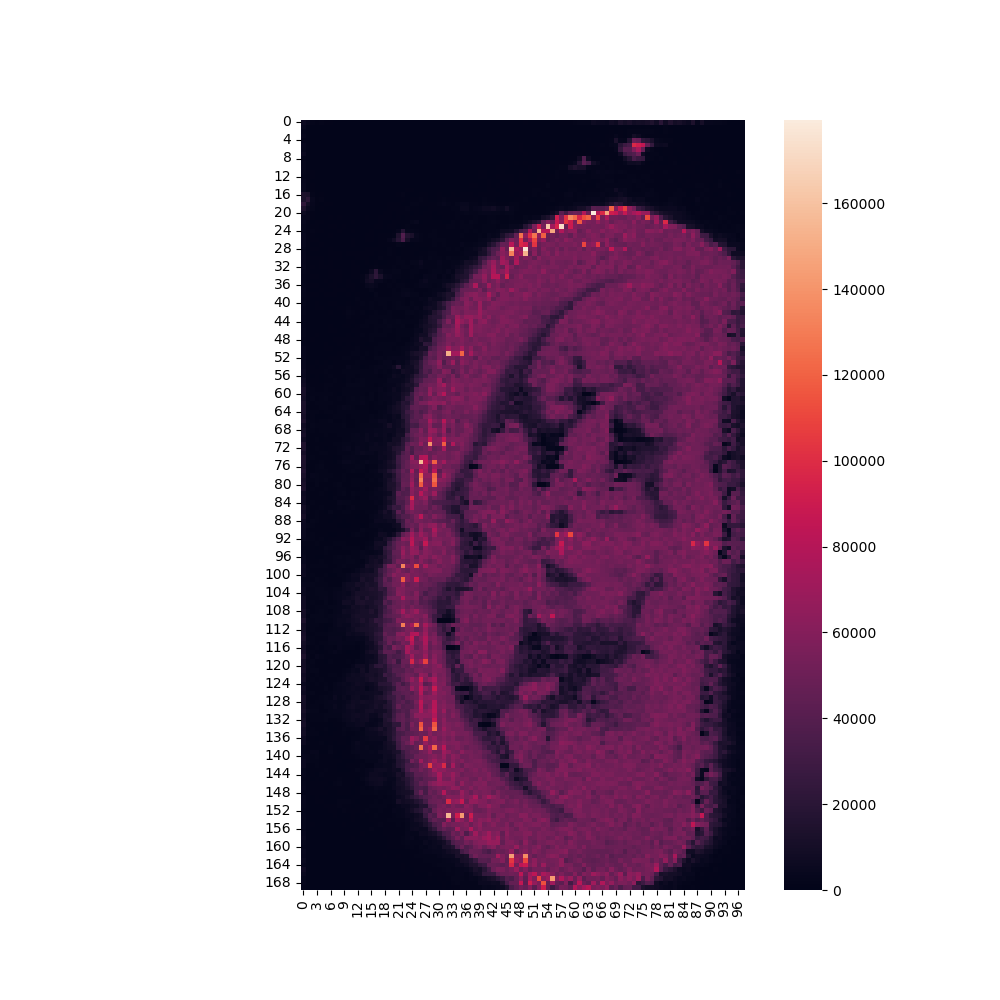

In [20]:
num_metabolites_negative = 10783
# Import metabolomics matrix only
metabolomics_matrix_271_a3_Tg_s3 = pd.read_csv('Z:/All AGE Positive TL/AL011123_AGE_271_a3_Tg_s3_pos on DESI HDMS_TLall.txt', sep = '\t', usecols = [i for i in range(3, num_metabolites_negative+3)], header = 2)
# Drop retention time
metabolomics_matrix_271_a3_Tg_s3 = metabolomics_matrix_271_a3_Tg_s3.drop(0)
# Reset index to start with 0
metabolomics_matrix_271_a3_Tg_s3 = metabolomics_matrix_271_a3_Tg_s3.reset_index(drop = True)
# Read in coordinates for metabolomics matrix
coordinates_matrix_271_a3_Tg_s3 = pd.read_csv('Z:/All AGE Positive TL/AL011123_AGE_271_a3_Tg_s3_pos on DESI HDMS_TLall.txt', sep = '\t', usecols = [i for i in range(1,3)], skiprows = 5, names = ['x_coord', 'y_coord'])
# Below we plot the ion 303.2328 (the second ion in the list)
uniform_data_271_a3_Tg_s3 = np.array(metabolomics_matrix_271_a3_Tg_s3).T.reshape([num_metabolites_negative, len(coordinates_matrix_271_a3_Tg_s3[coordinates_matrix_271_a3_Tg_s3['x_coord'] == coordinates_matrix_271_a3_Tg_s3.iloc[0][0]]), len(coordinates_matrix_271_a3_Tg_s3[coordinates_matrix_271_a3_Tg_s3['y_coord'] == coordinates_matrix_271_a3_Tg_s3.iloc[0][1]])])[metabolomics_matrix_271_a3_Tg_s3.columns.get_loc('773.5269')]
ax = sns.heatmap(uniform_data_271_a3_Tg_s3)
plt.show()

<a class="anchor" id="left_hippocampus"></a>
Below we use the segmentation tool from the mpl_interactions package. This allows us to easily trace a region of interest of an image and even spits out the coordinates for the mask we want to use!

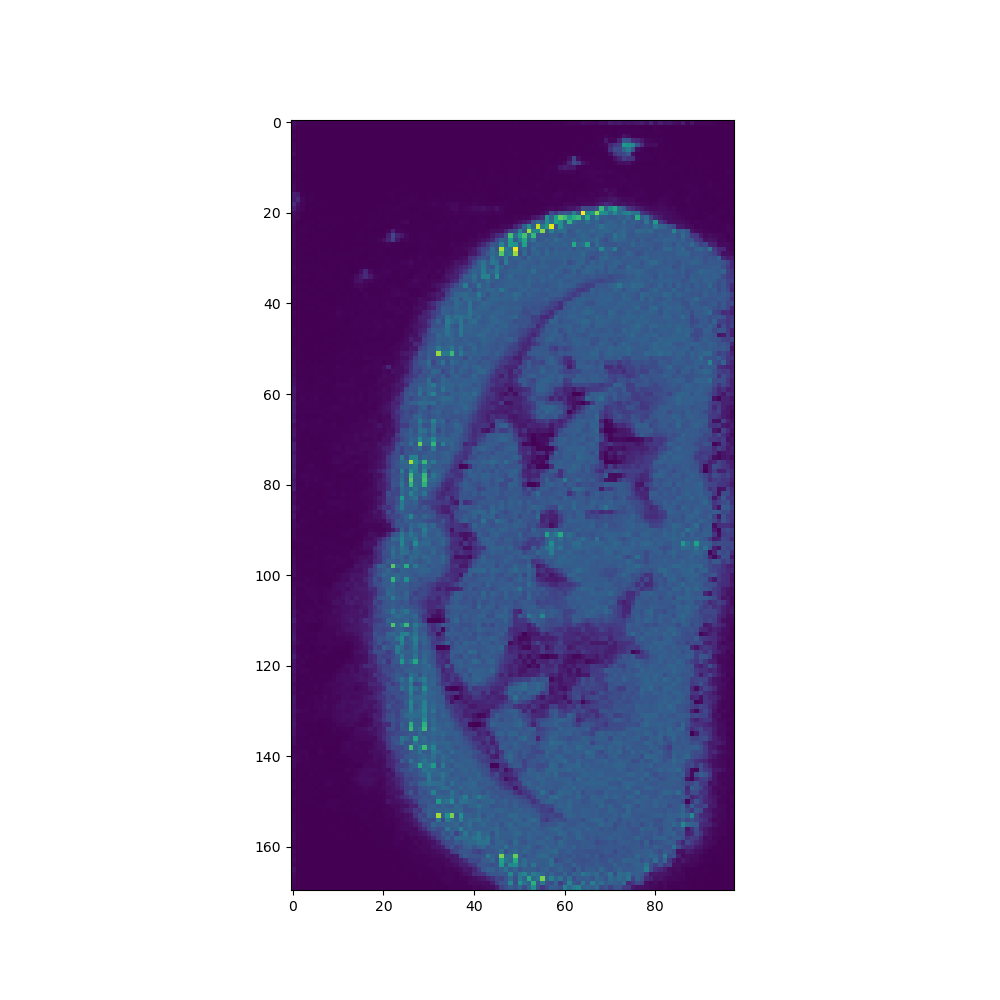

In [21]:
classes = ['Left Hippocampus']

# Define number of rois (here just 1 since we want the Left Hippocampus)
N_classes = 1
class_selector = widgets.Dropdown(options=classes, description="class")


def update(change):
    segmenter_271_a3_Tg_s3_left_hippocampus.current_class = class_selector.value
    segmenter_271_a3_Tg_s3_left_hippocampus.erasing = erasing_button.value


erasing_button = widgets.Checkbox(value=False, description="Erasing")
erasing_button.observe(update, names="value")

class_selector.observe(update, names="value")
# Define number of classes (rois) as N_classes set above
segmenter_271_a3_Tg_s3_left_hippocampus = image_segmenter(uniform_data_271_a3_Tg_s3, nclasses = N_classes, mask_alpha=0.76)
display(widgets.HBox([erasing_button, class_selector]))
display(segmenter_271_a3_Tg_s3_left_hippocampus)

Below we set all background pixels to zero, and calculate the percentages of all ions within the brain and save these results.

In [22]:
# Make variable for mask
mask_271_a3_Tg_s3_left_hippocampus = segmenter_271_a3_Tg_s3_left_hippocampus.mask
# Create mask for pixels to tell where brain matter is
coordinates_roi_271_a3_Tg_s3_left_hippocampus = pd.DataFrame(mask_271_a3_Tg_s3_left_hippocampus.reshape(len(coordinates_matrix_271_a3_Tg_s3)))
print('Number of pixels in mask:', len(coordinates_roi_271_a3_Tg_s3_left_hippocampus[coordinates_roi_271_a3_Tg_s3_left_hippocampus[0] == 1]))

# Make copy of metabolomics matrix to use as identifier of pixels for brain matter
metabolomics_matrix_271_a3_Tg_s3_for_pixel_identities_left_hippocampus = metabolomics_matrix_271_a3_Tg_s3.copy()
# Add segmentation labels to metabolomics matrix
metabolomics_matrix_271_a3_Tg_s3_for_pixel_identities_left_hippocampus['roi'] = coordinates_roi_271_a3_Tg_s3_left_hippocampus
# Specify the pixels are from the background
metabolomics_matrix_271_a3_Tg_s3_for_pixel_identities_left_hippocampus.loc[metabolomics_matrix_271_a3_Tg_s3_for_pixel_identities_left_hippocampus.roi == 0, :] = 0
# Drop identity column
metabolomics_matrix_271_a3_Tg_s3_for_pixel_identities_left_hippocampus = metabolomics_matrix_271_a3_Tg_s3_for_pixel_identities_left_hippocampus.drop(columns = 'roi')
# Save dataframe results
metabolomics_matrix_271_a3_Tg_s3_for_pixel_identities_left_hippocampus.to_csv('Z:/All AGE Positive masks and roi sums/Left Hippocampus/271_a3_Tg_s3_pixel_matrix_with_mask_left_hippocampus.csv')
metabolomics_matrix_271_a3_Tg_s3_for_pixel_identities_left_hippocampus.to_csv('N:/All AGE Positive masks and roi sums/Left Hippocampus/271_a3_Tg_s3_pixel_matrix_with_mask_left_hippocampus.csv')
# Find total number of pixels
metabolomics_matrix_271_a3_Tg_s3_for_pixel_identities_left_hippocampus_pixel_count = len(metabolomics_matrix_271_a3_Tg_s3_for_pixel_identities_left_hippocampus[metabolomics_matrix_271_a3_Tg_s3_for_pixel_identities_left_hippocampus.sum(axis = 1) != 0])

# Find total ion current for pixel spectra
sum_by_pixel = metabolomics_matrix_271_a3_Tg_s3_for_pixel_identities_left_hippocampus.sum(axis=1)
# Divide pixel values by pixel sum for all pixels
metabolomics_matrix_271_a3_Tg_s3_for_pixel_identities_left_hippocampus_tic_normalized_pixel = metabolomics_matrix_271_a3_Tg_s3_for_pixel_identities_left_hippocampus.divide(sum_by_pixel, axis=0)
# Sum values for ions
sums_of_ion_intensities_metabolomics_matrix_271_a3_Tg_s3_for_pixel_identities_left_hippocampus_tic_normalized_pixel = metabolomics_matrix_271_a3_Tg_s3_for_pixel_identities_left_hippocampus_tic_normalized_pixel.sum(axis = 0)
sums_of_ion_intensities_metabolomics_matrix_271_a3_Tg_s3_for_pixel_identities_left_hippocampus_tic_normalized_pixel.to_csv('Z:/All AGE Positive masks and roi sums/Left Hippocampus/271_a3_Tg_s3_sum_of_ions_within_left_hippocampus.csv')
# Divide by brain size to get normalized ion sums
sums_of_ion_intensities_metabolomics_matrix_271_a3_Tg_s3_for_pixel_identities_left_hippocampus_tic_normalized_pixel_normalized_brain = sums_of_ion_intensities_metabolomics_matrix_271_a3_Tg_s3_for_pixel_identities_left_hippocampus_tic_normalized_pixel/metabolomics_matrix_271_a3_Tg_s3_for_pixel_identities_left_hippocampus_pixel_count
# Take sum of all values to get total ion count
total_sum_roi_normalized_271_a3_Tg_s3_left_hippocampus = sums_of_ion_intensities_metabolomics_matrix_271_a3_Tg_s3_for_pixel_identities_left_hippocampus_tic_normalized_pixel_normalized_brain.sum()
# Divide by total ion count and multiply by 100 to get final percentage
sums_of_ion_intensities_roi_percentage_normalized_271_a3_Tg_s3_left_hippocampus = sums_of_ion_intensities_metabolomics_matrix_271_a3_Tg_s3_for_pixel_identities_left_hippocampus_tic_normalized_pixel_normalized_brain/total_sum_roi_normalized_271_a3_Tg_s3_left_hippocampus*100
sums_of_ion_intensities_roi_percentage_normalized_271_a3_Tg_s3_left_hippocampus.to_csv('Z:/All AGE Positive masks and roi sums/Left Hippocampus/271_a3_Tg_s3_percentage_of_ions_within_left_hippocampus.csv')

Number of pixels in mask: 399


<a class="anchor" id="Brain"></a>

Below we import a brain and show one ion that lights up the brain very well - 303.2328

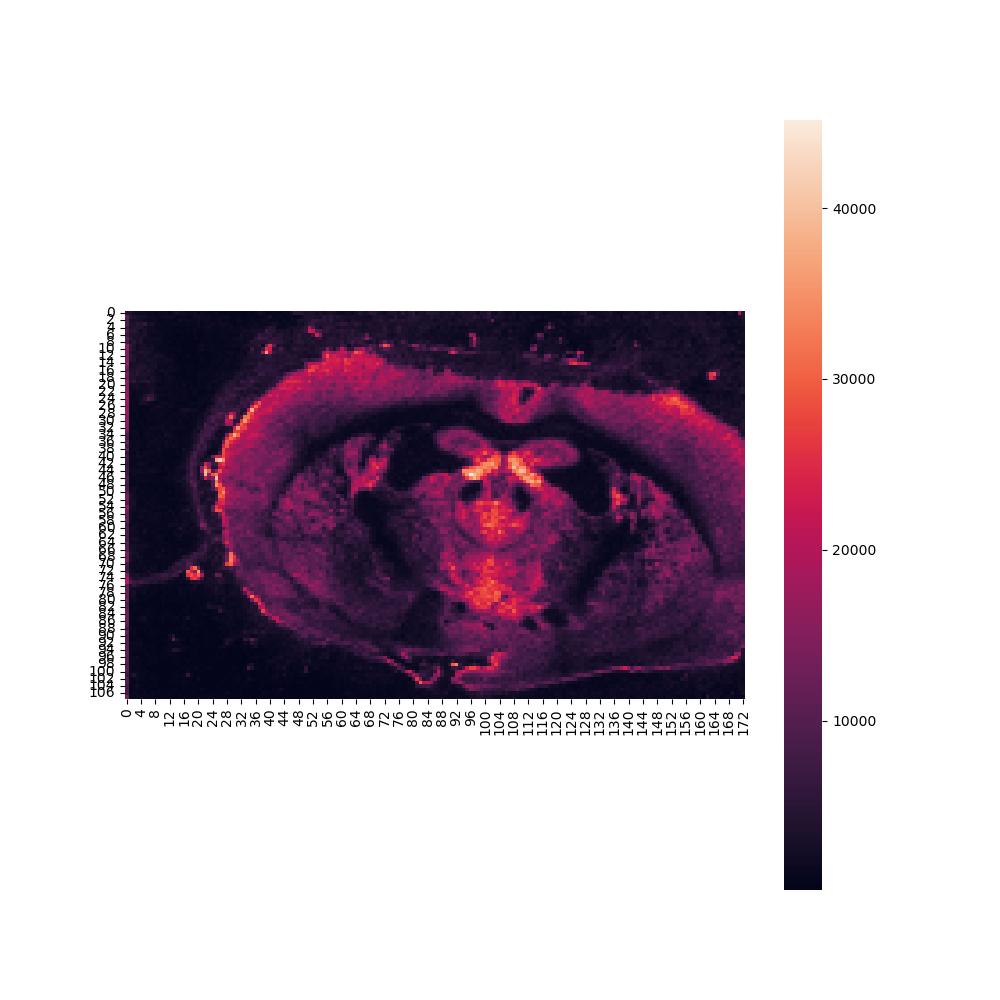

In [23]:
num_metabolites_negative = 10783
# Import metabolomics matrix only
metabolomics_matrix_191_a3_WT_s4 = pd.read_csv('Z:/All AGE Positive TL/AL011223_AGE_191_a3_WT_s4_pos_RE on DESI HDMS_TLall.txt', sep = '\t', usecols = [i for i in range(3, num_metabolites_negative+3)], header = 2)
# Drop retention time
metabolomics_matrix_191_a3_WT_s4 = metabolomics_matrix_191_a3_WT_s4.drop(0)
# Reset index to start with 0
metabolomics_matrix_191_a3_WT_s4 = metabolomics_matrix_191_a3_WT_s4.reset_index(drop = True)
# Read in coordinates for metabolomics matrix
coordinates_matrix_191_a3_WT_s4 = pd.read_csv('Z:/All AGE Positive TL/AL011223_AGE_191_a3_WT_s4_pos_RE on DESI HDMS_TLall.txt', sep = '\t', usecols = [i for i in range(1,3)], skiprows = 5, names = ['x_coord', 'y_coord'])
# Below we plot the ion 303.2328 (the second ion in the list)
uniform_data_191_a3_WT_s4 = np.array(metabolomics_matrix_191_a3_WT_s4).T.reshape([num_metabolites_negative, len(coordinates_matrix_191_a3_WT_s4[coordinates_matrix_191_a3_WT_s4['x_coord'] == coordinates_matrix_191_a3_WT_s4.iloc[0][0]]), len(coordinates_matrix_191_a3_WT_s4[coordinates_matrix_191_a3_WT_s4['y_coord'] == coordinates_matrix_191_a3_WT_s4.iloc[0][1]])])[metabolomics_matrix_191_a3_WT_s4.columns.get_loc('773.5269')]
ax = sns.heatmap(uniform_data_191_a3_WT_s4)
plt.show()

<a class="anchor" id="left_hippocampus"></a>
Below we use the segmentation tool from the mpl_interactions package. This allows us to easily trace a region of interest of an image and even spits out the coordinates for the mask we want to use!

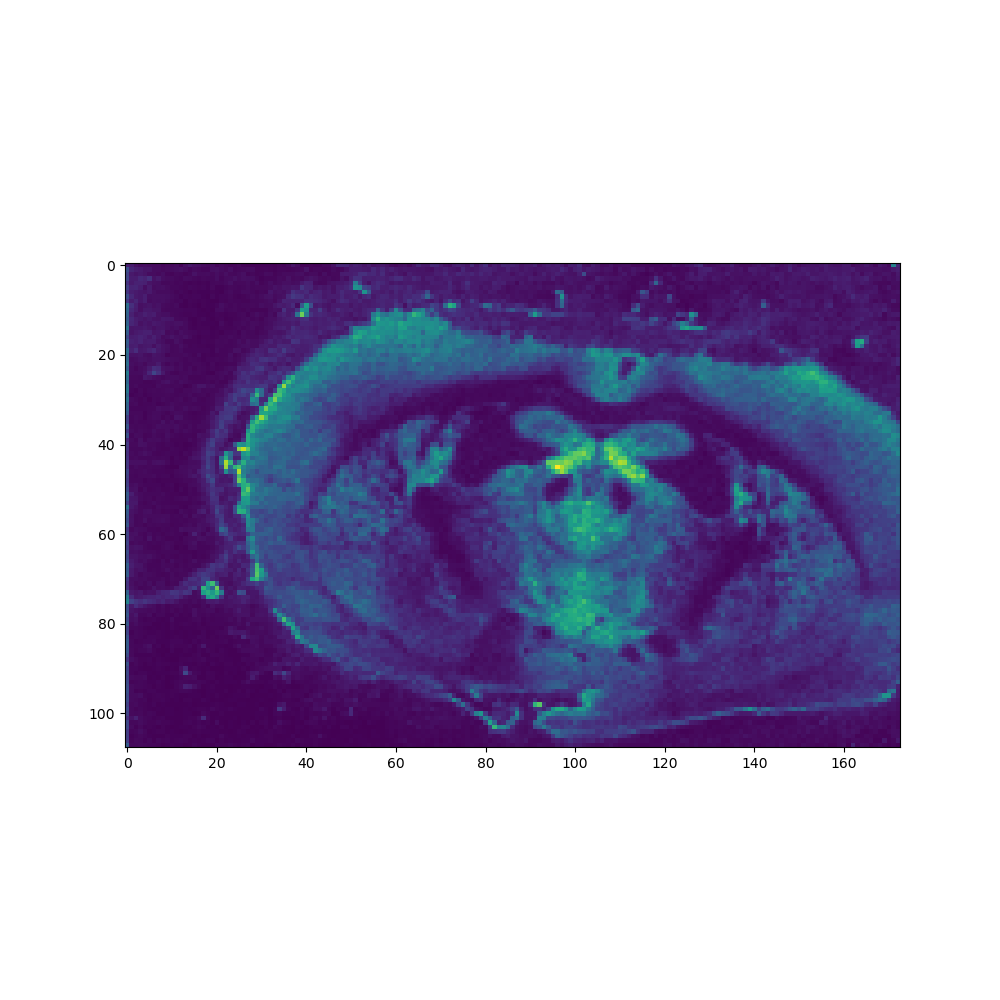

In [24]:
classes = ['Left Hippocampus']

# Define number of rois (here just 1 since we want the Left Hippocampus)
N_classes = 1
class_selector = widgets.Dropdown(options=classes, description="class")


def update(change):
    segmenter_191_a3_WT_s4_left_hippocampus.current_class = class_selector.value
    segmenter_191_a3_WT_s4_left_hippocampus.erasing = erasing_button.value


erasing_button = widgets.Checkbox(value=False, description="Erasing")
erasing_button.observe(update, names="value")

class_selector.observe(update, names="value")
# Define number of classes (rois) as N_classes set above
segmenter_191_a3_WT_s4_left_hippocampus = image_segmenter(uniform_data_191_a3_WT_s4, nclasses = N_classes, mask_alpha=0.76)
display(widgets.HBox([erasing_button, class_selector]))
display(segmenter_191_a3_WT_s4_left_hippocampus)

Below we set all background pixels to zero, and calculate the percentages of all ions within the brain and save these results.

In [25]:
# Make variable for mask
mask_191_a3_WT_s4_left_hippocampus = segmenter_191_a3_WT_s4_left_hippocampus.mask
# Create mask for pixels to tell where brain matter is
coordinates_roi_191_a3_WT_s4_left_hippocampus = pd.DataFrame(mask_191_a3_WT_s4_left_hippocampus.reshape(len(coordinates_matrix_191_a3_WT_s4)))
print('Number of pixels in mask:', len(coordinates_roi_191_a3_WT_s4_left_hippocampus[coordinates_roi_191_a3_WT_s4_left_hippocampus[0] == 1]))

# Make copy of metabolomics matrix to use as identifier of pixels for brain matter
metabolomics_matrix_191_a3_WT_s4_for_pixel_identities_left_hippocampus = metabolomics_matrix_191_a3_WT_s4.copy()
# Add segmentation labels to metabolomics matrix
metabolomics_matrix_191_a3_WT_s4_for_pixel_identities_left_hippocampus['roi'] = coordinates_roi_191_a3_WT_s4_left_hippocampus
# Specify the pixels are from the background
metabolomics_matrix_191_a3_WT_s4_for_pixel_identities_left_hippocampus.loc[metabolomics_matrix_191_a3_WT_s4_for_pixel_identities_left_hippocampus.roi == 0, :] = 0
# Drop identity column
metabolomics_matrix_191_a3_WT_s4_for_pixel_identities_left_hippocampus = metabolomics_matrix_191_a3_WT_s4_for_pixel_identities_left_hippocampus.drop(columns = 'roi')
# Save dataframe results
metabolomics_matrix_191_a3_WT_s4_for_pixel_identities_left_hippocampus.to_csv('Z:/All AGE Positive masks and roi sums/Left Hippocampus/191_a3_WT_s4_pixel_matrix_with_mask_left_hippocampus.csv')
metabolomics_matrix_191_a3_WT_s4_for_pixel_identities_left_hippocampus.to_csv('N:/All AGE Positive masks and roi sums/Left Hippocampus/191_a3_WT_s4_pixel_matrix_with_mask_left_hippocampus.csv')
# Find total number of pixels
metabolomics_matrix_191_a3_WT_s4_for_pixel_identities_left_hippocampus_pixel_count = len(metabolomics_matrix_191_a3_WT_s4_for_pixel_identities_left_hippocampus[metabolomics_matrix_191_a3_WT_s4_for_pixel_identities_left_hippocampus.sum(axis = 1) != 0])

# Find total ion current for pixel spectra
sum_by_pixel = metabolomics_matrix_191_a3_WT_s4_for_pixel_identities_left_hippocampus.sum(axis=1)
# Divide pixel values by pixel sum for all pixels
metabolomics_matrix_191_a3_WT_s4_for_pixel_identities_left_hippocampus_tic_normalized_pixel = metabolomics_matrix_191_a3_WT_s4_for_pixel_identities_left_hippocampus.divide(sum_by_pixel, axis=0)
# Sum values for ions
sums_of_ion_intensities_metabolomics_matrix_191_a3_WT_s4_for_pixel_identities_left_hippocampus_tic_normalized_pixel = metabolomics_matrix_191_a3_WT_s4_for_pixel_identities_left_hippocampus_tic_normalized_pixel.sum(axis = 0)
sums_of_ion_intensities_metabolomics_matrix_191_a3_WT_s4_for_pixel_identities_left_hippocampus_tic_normalized_pixel.to_csv('Z:/All AGE Positive masks and roi sums/Left Hippocampus/191_a3_WT_s4_sum_of_ions_within_left_hippocampus.csv')
# Divide by brain size to get normalized ion sums
sums_of_ion_intensities_metabolomics_matrix_191_a3_WT_s4_for_pixel_identities_left_hippocampus_tic_normalized_pixel_normalized_brain = sums_of_ion_intensities_metabolomics_matrix_191_a3_WT_s4_for_pixel_identities_left_hippocampus_tic_normalized_pixel/metabolomics_matrix_191_a3_WT_s4_for_pixel_identities_left_hippocampus_pixel_count
# Take sum of all values to get total ion count
total_sum_roi_normalized_191_a3_WT_s4_left_hippocampus = sums_of_ion_intensities_metabolomics_matrix_191_a3_WT_s4_for_pixel_identities_left_hippocampus_tic_normalized_pixel_normalized_brain.sum()
# Divide by total ion count and multiply by 100 to get final percentage
sums_of_ion_intensities_roi_percentage_normalized_191_a3_WT_s4_left_hippocampus = sums_of_ion_intensities_metabolomics_matrix_191_a3_WT_s4_for_pixel_identities_left_hippocampus_tic_normalized_pixel_normalized_brain/total_sum_roi_normalized_191_a3_WT_s4_left_hippocampus*100
sums_of_ion_intensities_roi_percentage_normalized_191_a3_WT_s4_left_hippocampus.to_csv('Z:/All AGE Positive masks and roi sums/Left Hippocampus/191_a3_WT_s4_percentage_of_ions_within_left_hippocampus.csv')

Number of pixels in mask: 100


<a class="anchor" id="Brain"></a>

Below we import a brain and show one ion that lights up the brain very well - 303.2328

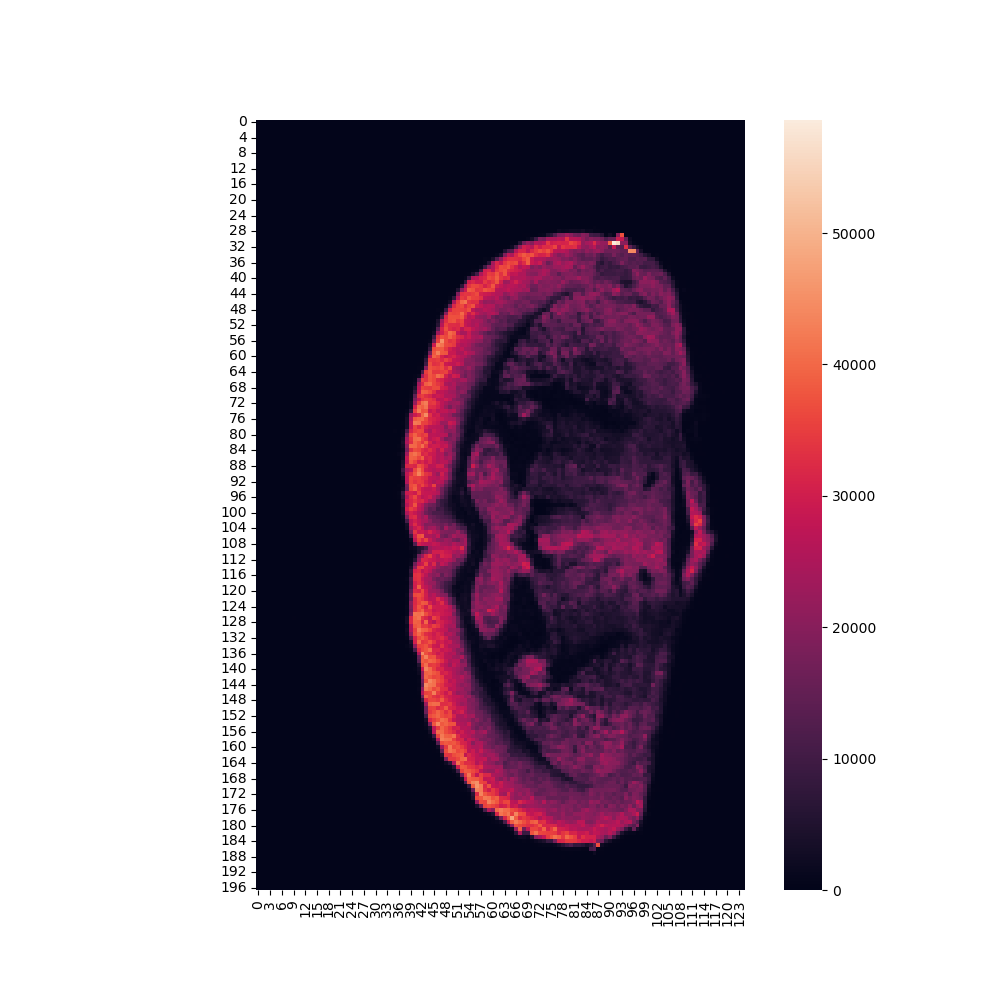

In [26]:
num_metabolites_negative = 10783
# Import metabolomics matrix only
metabolomics_matrix_270_5_Tg_s5 = pd.read_csv('Z:/All AGE Positive TL/AL011223_AGE_270_5_Tg_s5_pos on DESI HDMS_TLall.txt', sep = '\t', usecols = [i for i in range(3, num_metabolites_negative+3)], header = 2)
# Drop retention time
metabolomics_matrix_270_5_Tg_s5 = metabolomics_matrix_270_5_Tg_s5.drop(0)
# Reset index to start with 0
metabolomics_matrix_270_5_Tg_s5 = metabolomics_matrix_270_5_Tg_s5.reset_index(drop = True)
# Read in coordinates for metabolomics matrix
coordinates_matrix_270_5_Tg_s5 = pd.read_csv('Z:/All AGE Positive TL/AL011223_AGE_270_5_Tg_s5_pos on DESI HDMS_TLall.txt', sep = '\t', usecols = [i for i in range(1,3)], skiprows = 5, names = ['x_coord', 'y_coord'])
# Below we plot the ion 303.2328 (the second ion in the list)
uniform_data_270_5_Tg_s5 = np.array(metabolomics_matrix_270_5_Tg_s5).T.reshape([num_metabolites_negative, len(coordinates_matrix_270_5_Tg_s5[coordinates_matrix_270_5_Tg_s5['x_coord'] == coordinates_matrix_270_5_Tg_s5.iloc[0][0]]), len(coordinates_matrix_270_5_Tg_s5[coordinates_matrix_270_5_Tg_s5['y_coord'] == coordinates_matrix_270_5_Tg_s5.iloc[0][1]])])[metabolomics_matrix_270_5_Tg_s5.columns.get_loc('773.5269')]
ax = sns.heatmap(uniform_data_270_5_Tg_s5)
plt.show()

<a class="anchor" id="left_hippocampus"></a>
Below we use the segmentation tool from the mpl_interactions package. This allows us to easily trace a region of interest of an image and even spits out the coordinates for the mask we want to use!

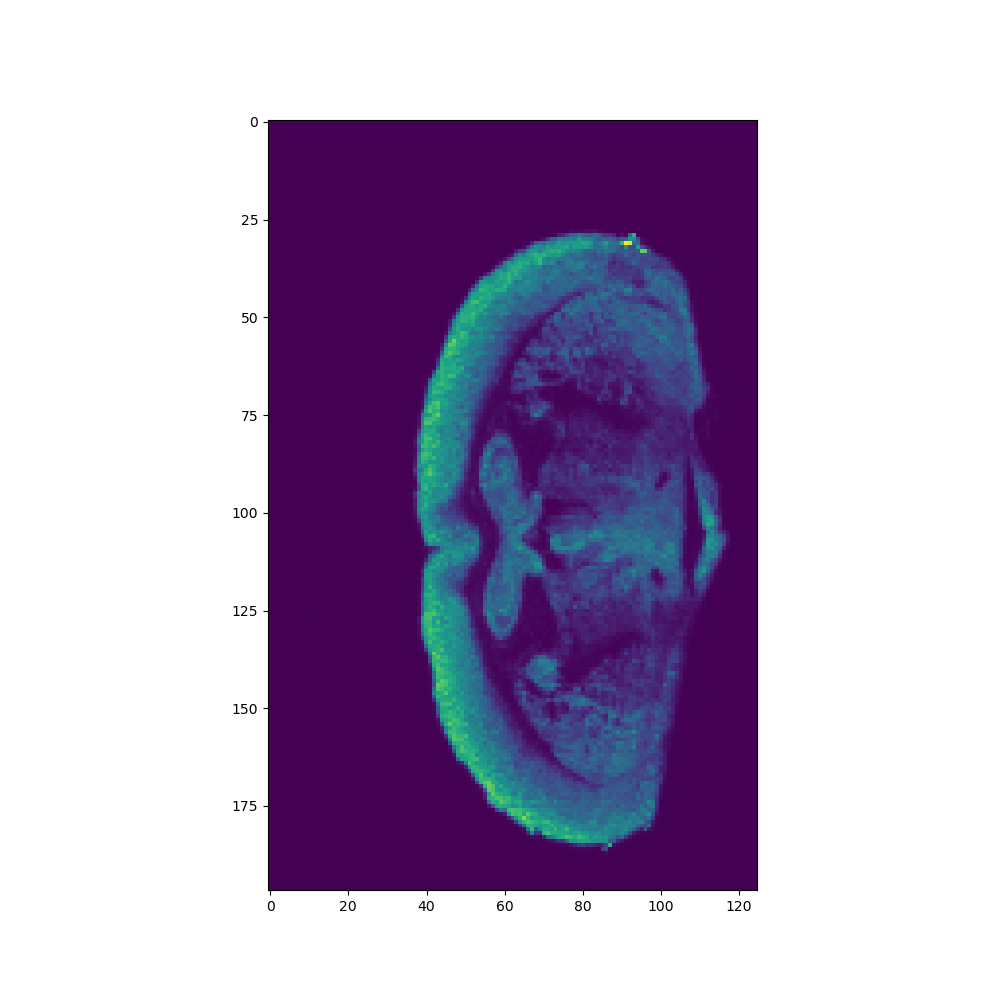

In [27]:
classes = ['Left Hippocampus']

# Define number of rois (here just 1 since we want the Left Hippocampus)
N_classes = 1
class_selector = widgets.Dropdown(options=classes, description="class")


def update(change):
    segmenter_270_5_Tg_s5_left_hippocampus.current_class = class_selector.value
    segmenter_270_5_Tg_s5_left_hippocampus.erasing = erasing_button.value


erasing_button = widgets.Checkbox(value=False, description="Erasing")
erasing_button.observe(update, names="value")

class_selector.observe(update, names="value")
# Define number of classes (rois) as N_classes set above
segmenter_270_5_Tg_s5_left_hippocampus = image_segmenter(uniform_data_270_5_Tg_s5, nclasses = N_classes, mask_alpha=0.76)
display(widgets.HBox([erasing_button, class_selector]))
display(segmenter_270_5_Tg_s5_left_hippocampus)

Below we set all background pixels to zero, and calculate the percentages of all ions within the brain and save these results.

In [28]:
# Make variable for mask
mask_270_5_Tg_s5_left_hippocampus = segmenter_270_5_Tg_s5_left_hippocampus.mask
# Create mask for pixels to tell where brain matter is
coordinates_roi_270_5_Tg_s5_left_hippocampus = pd.DataFrame(mask_270_5_Tg_s5_left_hippocampus.reshape(len(coordinates_matrix_270_5_Tg_s5)))
print('Number of pixels in mask:', len(coordinates_roi_270_5_Tg_s5_left_hippocampus[coordinates_roi_270_5_Tg_s5_left_hippocampus[0] == 1]))

# Make copy of metabolomics matrix to use as identifier of pixels for brain matter
metabolomics_matrix_270_5_Tg_s5_for_pixel_identities_left_hippocampus = metabolomics_matrix_270_5_Tg_s5.copy()
# Add segmentation labels to metabolomics matrix
metabolomics_matrix_270_5_Tg_s5_for_pixel_identities_left_hippocampus['roi'] = coordinates_roi_270_5_Tg_s5_left_hippocampus
# Specify the pixels are from the background
metabolomics_matrix_270_5_Tg_s5_for_pixel_identities_left_hippocampus.loc[metabolomics_matrix_270_5_Tg_s5_for_pixel_identities_left_hippocampus.roi == 0, :] = 0
# Drop identity column
metabolomics_matrix_270_5_Tg_s5_for_pixel_identities_left_hippocampus = metabolomics_matrix_270_5_Tg_s5_for_pixel_identities_left_hippocampus.drop(columns = 'roi')
# Save dataframe results
metabolomics_matrix_270_5_Tg_s5_for_pixel_identities_left_hippocampus.to_csv('Z:/All AGE Positive masks and roi sums/Left Hippocampus/270_5_Tg_s5_pixel_matrix_with_mask_left_hippocampus.csv')
metabolomics_matrix_270_5_Tg_s5_for_pixel_identities_left_hippocampus.to_csv('N:/All AGE Positive masks and roi sums/Left Hippocampus/270_5_Tg_s5_pixel_matrix_with_mask_left_hippocampus.csv')
# Find total number of pixels
metabolomics_matrix_270_5_Tg_s5_for_pixel_identities_left_hippocampus_pixel_count = len(metabolomics_matrix_270_5_Tg_s5_for_pixel_identities_left_hippocampus[metabolomics_matrix_270_5_Tg_s5_for_pixel_identities_left_hippocampus.sum(axis = 1) != 0])

# Find total ion current for pixel spectra
sum_by_pixel = metabolomics_matrix_270_5_Tg_s5_for_pixel_identities_left_hippocampus.sum(axis=1)
# Divide pixel values by pixel sum for all pixels
metabolomics_matrix_270_5_Tg_s5_for_pixel_identities_left_hippocampus_tic_normalized_pixel = metabolomics_matrix_270_5_Tg_s5_for_pixel_identities_left_hippocampus.divide(sum_by_pixel, axis=0)
# Sum values for ions
sums_of_ion_intensities_metabolomics_matrix_270_5_Tg_s5_for_pixel_identities_left_hippocampus_tic_normalized_pixel = metabolomics_matrix_270_5_Tg_s5_for_pixel_identities_left_hippocampus_tic_normalized_pixel.sum(axis = 0)
sums_of_ion_intensities_metabolomics_matrix_270_5_Tg_s5_for_pixel_identities_left_hippocampus_tic_normalized_pixel.to_csv('Z:/All AGE Positive masks and roi sums/Left Hippocampus/270_5_Tg_s5_sum_of_ions_within_left_hippocampus.csv')
# Divide by brain size to get normalized ion sums
sums_of_ion_intensities_metabolomics_matrix_270_5_Tg_s5_for_pixel_identities_left_hippocampus_tic_normalized_pixel_normalized_brain = sums_of_ion_intensities_metabolomics_matrix_270_5_Tg_s5_for_pixel_identities_left_hippocampus_tic_normalized_pixel/metabolomics_matrix_270_5_Tg_s5_for_pixel_identities_left_hippocampus_pixel_count
# Take sum of all values to get total ion count
total_sum_roi_normalized_270_5_Tg_s5_left_hippocampus = sums_of_ion_intensities_metabolomics_matrix_270_5_Tg_s5_for_pixel_identities_left_hippocampus_tic_normalized_pixel_normalized_brain.sum()
# Divide by total ion count and multiply by 100 to get final percentage
sums_of_ion_intensities_roi_percentage_normalized_270_5_Tg_s5_left_hippocampus = sums_of_ion_intensities_metabolomics_matrix_270_5_Tg_s5_for_pixel_identities_left_hippocampus_tic_normalized_pixel_normalized_brain/total_sum_roi_normalized_270_5_Tg_s5_left_hippocampus*100
sums_of_ion_intensities_roi_percentage_normalized_270_5_Tg_s5_left_hippocampus.to_csv('Z:/All AGE Positive masks and roi sums/Left Hippocampus/270_5_Tg_s5_percentage_of_ions_within_left_hippocampus.csv')

Number of pixels in mask: 248


<a class="anchor" id="Brain"></a>

Below we import a brain and show one ion that lights up the brain very well - 303.2328

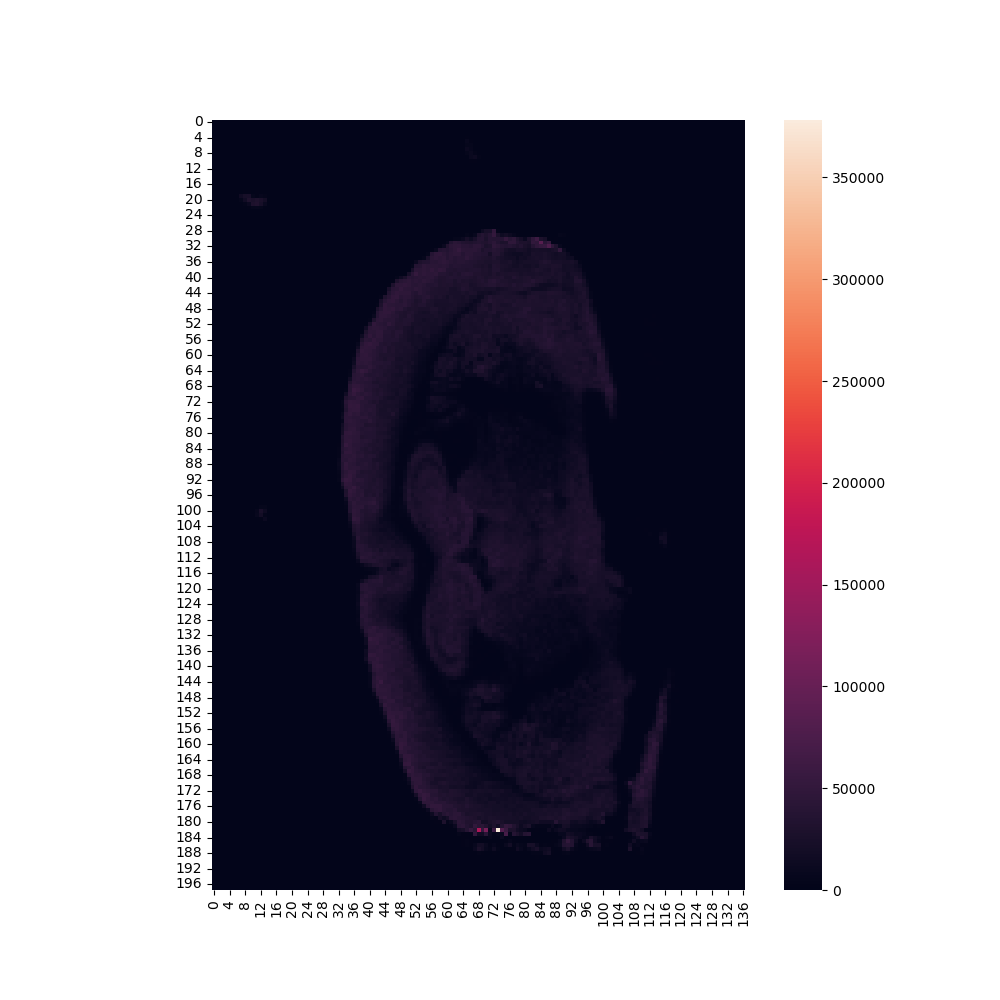

In [29]:
num_metabolites_negative = 10783
# Import metabolomics matrix only
metabolomics_matrix_278_a2_WT_s2 = pd.read_csv('Z:/All AGE Positive TL/AL011223_AGE_278_a2_WT_s2_pos on DESI HDMS_TLall.txt', sep = '\t', usecols = [i for i in range(3, num_metabolites_negative+3)], header = 2)
# Drop retention time
metabolomics_matrix_278_a2_WT_s2 = metabolomics_matrix_278_a2_WT_s2.drop(0)
# Reset index to start with 0
metabolomics_matrix_278_a2_WT_s2 = metabolomics_matrix_278_a2_WT_s2.reset_index(drop = True)
# Read in coordinates for metabolomics matrix
coordinates_matrix_278_a2_WT_s2 = pd.read_csv('Z:/All AGE Positive TL/AL011223_AGE_278_a2_WT_s2_pos on DESI HDMS_TLall.txt', sep = '\t', usecols = [i for i in range(1,3)], skiprows = 5, names = ['x_coord', 'y_coord'])
# Below we plot the ion 303.2328 (the second ion in the list)
uniform_data_278_a2_WT_s2 = np.array(metabolomics_matrix_278_a2_WT_s2).T.reshape([num_metabolites_negative, len(coordinates_matrix_278_a2_WT_s2[coordinates_matrix_278_a2_WT_s2['x_coord'] == coordinates_matrix_278_a2_WT_s2.iloc[0][0]]), len(coordinates_matrix_278_a2_WT_s2[coordinates_matrix_278_a2_WT_s2['y_coord'] == coordinates_matrix_278_a2_WT_s2.iloc[0][1]])])[metabolomics_matrix_278_a2_WT_s2.columns.get_loc('773.5269')]
ax = sns.heatmap(uniform_data_278_a2_WT_s2)
plt.show()

<a class="anchor" id="left_hippocampus"></a>
Below we use the segmentation tool from the mpl_interactions package. This allows us to easily trace a region of interest of an image and even spits out the coordinates for the mask we want to use!

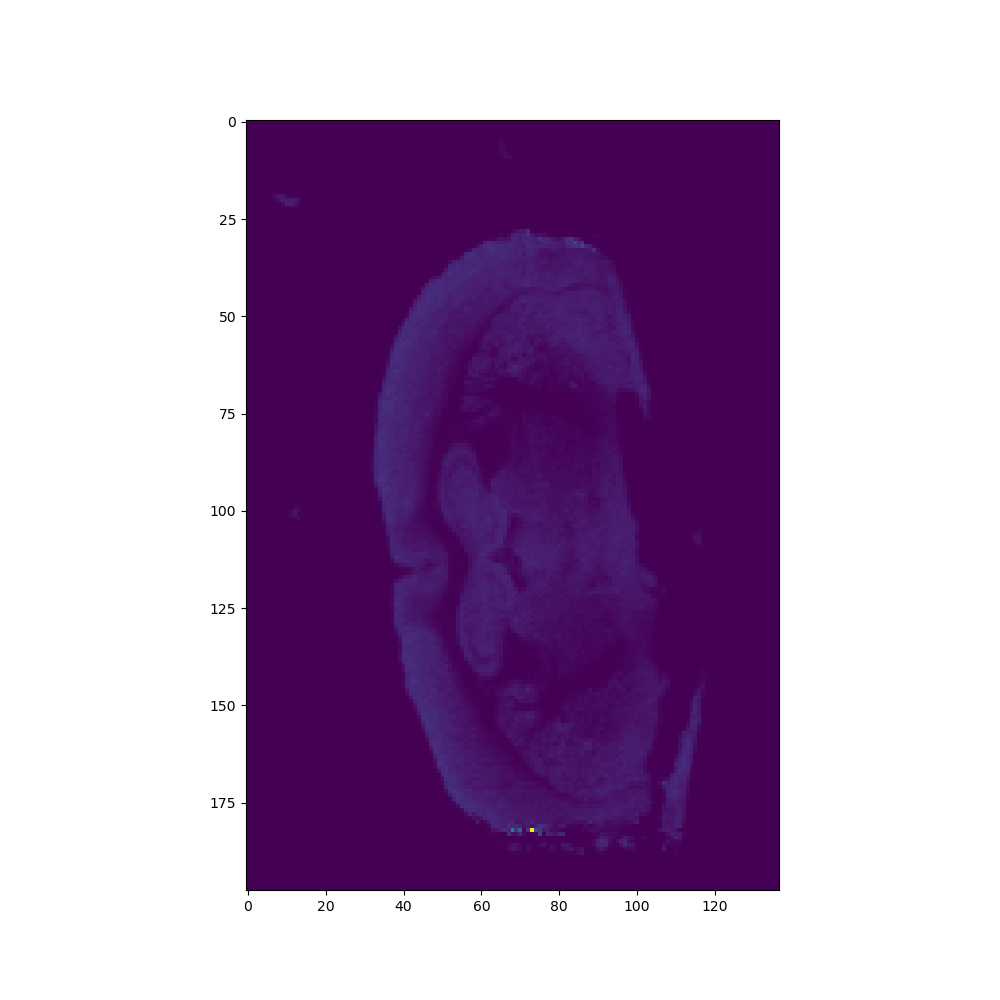

In [30]:
classes = ['Left Hippocampus']

# Define number of rois (here just 1 since we want the Left Hippocampus)
N_classes = 1
class_selector = widgets.Dropdown(options=classes, description="class")


def update(change):
    segmenter_278_a2_WT_s2_left_hippocampus.current_class = class_selector.value
    segmenter_278_a2_WT_s2_left_hippocampus.erasing = erasing_button.value


erasing_button = widgets.Checkbox(value=False, description="Erasing")
erasing_button.observe(update, names="value")

class_selector.observe(update, names="value")
# Define number of classes (rois) as N_classes set above
segmenter_278_a2_WT_s2_left_hippocampus = image_segmenter(uniform_data_278_a2_WT_s2, nclasses = N_classes, mask_alpha=0.76)
display(widgets.HBox([erasing_button, class_selector]))
display(segmenter_278_a2_WT_s2_left_hippocampus)

Below we set all background pixels to zero, and calculate the percentages of all ions within the brain and save these results.

In [31]:
# Make variable for mask
mask_278_a2_WT_s2_left_hippocampus = segmenter_278_a2_WT_s2_left_hippocampus.mask
# Create mask for pixels to tell where brain matter is
coordinates_roi_278_a2_WT_s2_left_hippocampus = pd.DataFrame(mask_278_a2_WT_s2_left_hippocampus.reshape(len(coordinates_matrix_278_a2_WT_s2)))
print('Number of pixels in mask:', len(coordinates_roi_278_a2_WT_s2_left_hippocampus[coordinates_roi_278_a2_WT_s2_left_hippocampus[0] == 1]))

# Make copy of metabolomics matrix to use as identifier of pixels for brain matter
metabolomics_matrix_278_a2_WT_s2_for_pixel_identities_left_hippocampus = metabolomics_matrix_278_a2_WT_s2.copy()
# Add segmentation labels to metabolomics matrix
metabolomics_matrix_278_a2_WT_s2_for_pixel_identities_left_hippocampus['roi'] = coordinates_roi_278_a2_WT_s2_left_hippocampus
# Specify the pixels are from the background
metabolomics_matrix_278_a2_WT_s2_for_pixel_identities_left_hippocampus.loc[metabolomics_matrix_278_a2_WT_s2_for_pixel_identities_left_hippocampus.roi == 0, :] = 0
# Drop identity column
metabolomics_matrix_278_a2_WT_s2_for_pixel_identities_left_hippocampus = metabolomics_matrix_278_a2_WT_s2_for_pixel_identities_left_hippocampus.drop(columns = 'roi')
# Save dataframe results
metabolomics_matrix_278_a2_WT_s2_for_pixel_identities_left_hippocampus.to_csv('Z:/All AGE Positive masks and roi sums/Left Hippocampus/278_a2_WT_s2_pixel_matrix_with_mask_left_hippocampus.csv')
metabolomics_matrix_278_a2_WT_s2_for_pixel_identities_left_hippocampus.to_csv('N:/All AGE Positive masks and roi sums/Left Hippocampus/278_a2_WT_s2_pixel_matrix_with_mask_left_hippocampus.csv')
# Find total number of pixels
metabolomics_matrix_278_a2_WT_s2_for_pixel_identities_left_hippocampus_pixel_count = len(metabolomics_matrix_278_a2_WT_s2_for_pixel_identities_left_hippocampus[metabolomics_matrix_278_a2_WT_s2_for_pixel_identities_left_hippocampus.sum(axis = 1) != 0])

# Find total ion current for pixel spectra
sum_by_pixel = metabolomics_matrix_278_a2_WT_s2_for_pixel_identities_left_hippocampus.sum(axis=1)
# Divide pixel values by pixel sum for all pixels
metabolomics_matrix_278_a2_WT_s2_for_pixel_identities_left_hippocampus_tic_normalized_pixel = metabolomics_matrix_278_a2_WT_s2_for_pixel_identities_left_hippocampus.divide(sum_by_pixel, axis=0)
# Sum values for ions
sums_of_ion_intensities_metabolomics_matrix_278_a2_WT_s2_for_pixel_identities_left_hippocampus_tic_normalized_pixel = metabolomics_matrix_278_a2_WT_s2_for_pixel_identities_left_hippocampus_tic_normalized_pixel.sum(axis = 0)
sums_of_ion_intensities_metabolomics_matrix_278_a2_WT_s2_for_pixel_identities_left_hippocampus_tic_normalized_pixel.to_csv('Z:/All AGE Positive masks and roi sums/Left Hippocampus/278_a2_WT_s2_sum_of_ions_within_left_hippocampus.csv')
# Divide by brain size to get normalized ion sums
sums_of_ion_intensities_metabolomics_matrix_278_a2_WT_s2_for_pixel_identities_left_hippocampus_tic_normalized_pixel_normalized_brain = sums_of_ion_intensities_metabolomics_matrix_278_a2_WT_s2_for_pixel_identities_left_hippocampus_tic_normalized_pixel/metabolomics_matrix_278_a2_WT_s2_for_pixel_identities_left_hippocampus_pixel_count
# Take sum of all values to get total ion count
total_sum_roi_normalized_278_a2_WT_s2_left_hippocampus = sums_of_ion_intensities_metabolomics_matrix_278_a2_WT_s2_for_pixel_identities_left_hippocampus_tic_normalized_pixel_normalized_brain.sum()
# Divide by total ion count and multiply by 100 to get final percentage
sums_of_ion_intensities_roi_percentage_normalized_278_a2_WT_s2_left_hippocampus = sums_of_ion_intensities_metabolomics_matrix_278_a2_WT_s2_for_pixel_identities_left_hippocampus_tic_normalized_pixel_normalized_brain/total_sum_roi_normalized_278_a2_WT_s2_left_hippocampus*100
sums_of_ion_intensities_roi_percentage_normalized_278_a2_WT_s2_left_hippocampus.to_csv('Z:/All AGE Positive masks and roi sums/Left Hippocampus/278_a2_WT_s2_percentage_of_ions_within_left_hippocampus.csv')

Number of pixels in mask: 339


<a class="anchor" id="Brain"></a>

Below we import a brain and show one ion that lights up the brain very well - 303.2328

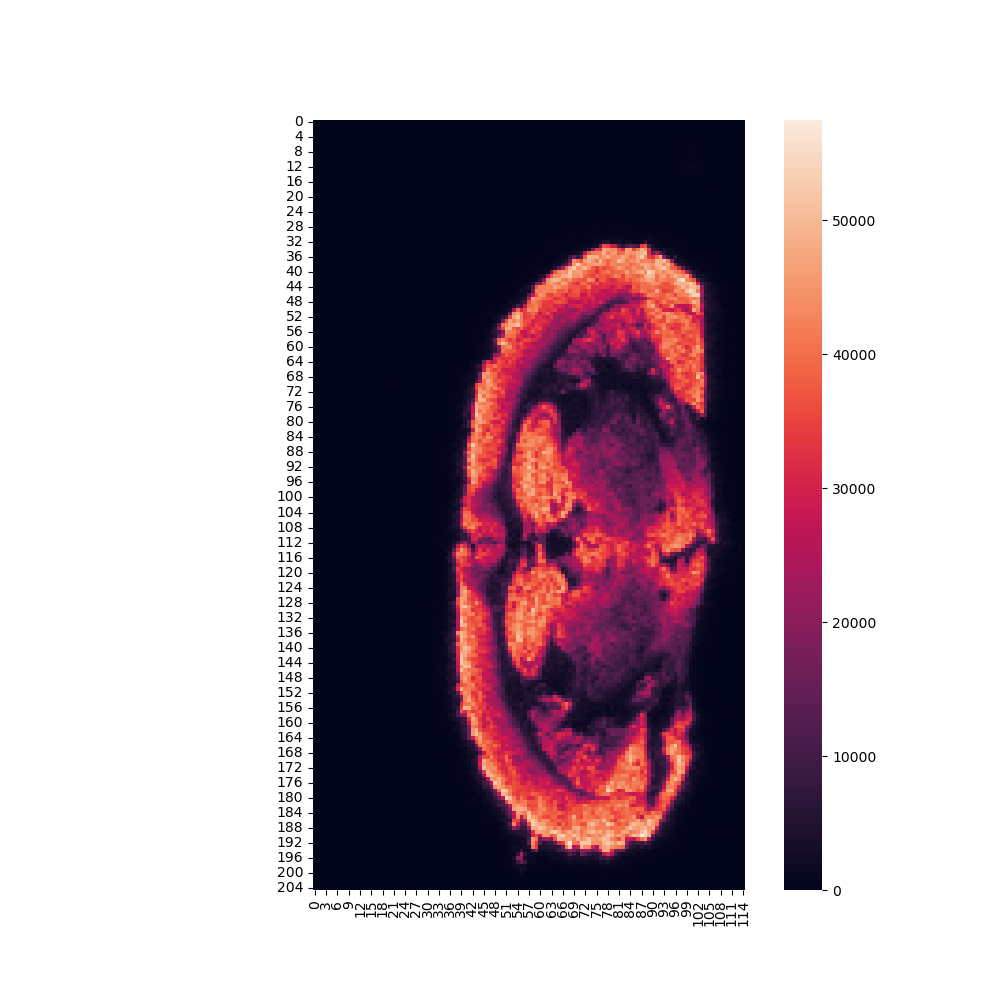

In [32]:
num_metabolites_negative = 10783
# Import metabolomics matrix only
metabolomics_matrix_268_3_Tg_s5 = pd.read_csv('Z:/All AGE Positive TL/AL011323_AGE_268_3_Tg_s5_pos on DESI HDMS_TLall.txt', sep = '\t', usecols = [i for i in range(3, num_metabolites_negative+3)], header = 2)
# Drop retention time
metabolomics_matrix_268_3_Tg_s5 = metabolomics_matrix_268_3_Tg_s5.drop(0)
# Reset index to start with 0
metabolomics_matrix_268_3_Tg_s5 = metabolomics_matrix_268_3_Tg_s5.reset_index(drop = True)
# Read in coordinates for metabolomics matrix
coordinates_matrix_268_3_Tg_s5 = pd.read_csv('Z:/All AGE Positive TL/AL011323_AGE_268_3_Tg_s5_pos on DESI HDMS_TLall.txt', sep = '\t', usecols = [i for i in range(1,3)], skiprows = 5, names = ['x_coord', 'y_coord'])
# Below we plot the ion 303.2328 (the second ion in the list)
uniform_data_268_3_Tg_s5 = np.array(metabolomics_matrix_268_3_Tg_s5).T.reshape([num_metabolites_negative, len(coordinates_matrix_268_3_Tg_s5[coordinates_matrix_268_3_Tg_s5['x_coord'] == coordinates_matrix_268_3_Tg_s5.iloc[0][0]]), len(coordinates_matrix_268_3_Tg_s5[coordinates_matrix_268_3_Tg_s5['y_coord'] == coordinates_matrix_268_3_Tg_s5.iloc[0][1]])])[metabolomics_matrix_268_3_Tg_s5.columns.get_loc('773.5269')]
ax = sns.heatmap(uniform_data_268_3_Tg_s5)
plt.show()

<a class="anchor" id="left_hippocampus"></a>
Below we use the segmentation tool from the mpl_interactions package. This allows us to easily trace a region of interest of an image and even spits out the coordinates for the mask we want to use!

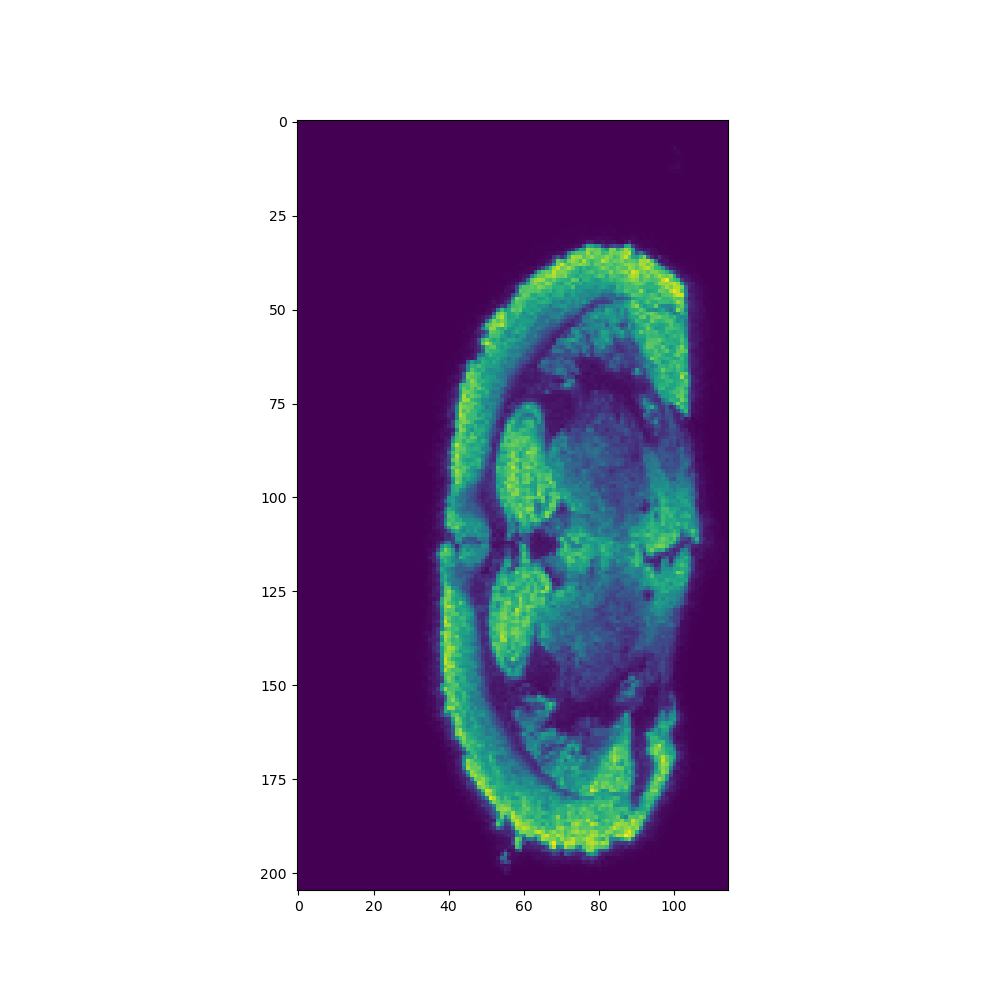

In [33]:
classes = ['Left Hippocampus']

# Define number of rois (here just 1 since we want the Left Hippocampus)
N_classes = 1
class_selector = widgets.Dropdown(options=classes, description="class")


def update(change):
    segmenter_268_3_Tg_s5_left_hippocampus.current_class = class_selector.value
    segmenter_268_3_Tg_s5_left_hippocampus.erasing = erasing_button.value


erasing_button = widgets.Checkbox(value=False, description="Erasing")
erasing_button.observe(update, names="value")

class_selector.observe(update, names="value")
# Define number of classes (rois) as N_classes set above
segmenter_268_3_Tg_s5_left_hippocampus = image_segmenter(uniform_data_268_3_Tg_s5, nclasses = N_classes, mask_alpha=0.76)
display(widgets.HBox([erasing_button, class_selector]))
display(segmenter_268_3_Tg_s5_left_hippocampus)

Below we set all background pixels to zero, and calculate the percentages of all ions within the brain and save these results.

In [34]:
# Make variable for mask
mask_268_3_Tg_s5_left_hippocampus = segmenter_268_3_Tg_s5_left_hippocampus.mask
# Create mask for pixels to tell where brain matter is
coordinates_roi_268_3_Tg_s5_left_hippocampus = pd.DataFrame(mask_268_3_Tg_s5_left_hippocampus.reshape(len(coordinates_matrix_268_3_Tg_s5)))
print('Number of pixels in mask:', len(coordinates_roi_268_3_Tg_s5_left_hippocampus[coordinates_roi_268_3_Tg_s5_left_hippocampus[0] == 1]))

# Make copy of metabolomics matrix to use as identifier of pixels for brain matter
metabolomics_matrix_268_3_Tg_s5_for_pixel_identities_left_hippocampus = metabolomics_matrix_268_3_Tg_s5.copy()
# Add segmentation labels to metabolomics matrix
metabolomics_matrix_268_3_Tg_s5_for_pixel_identities_left_hippocampus['roi'] = coordinates_roi_268_3_Tg_s5_left_hippocampus
# Specify the pixels are from the background
metabolomics_matrix_268_3_Tg_s5_for_pixel_identities_left_hippocampus.loc[metabolomics_matrix_268_3_Tg_s5_for_pixel_identities_left_hippocampus.roi == 0, :] = 0
# Drop identity column
metabolomics_matrix_268_3_Tg_s5_for_pixel_identities_left_hippocampus = metabolomics_matrix_268_3_Tg_s5_for_pixel_identities_left_hippocampus.drop(columns = 'roi')
# Save dataframe results
metabolomics_matrix_268_3_Tg_s5_for_pixel_identities_left_hippocampus.to_csv('Z:/All AGE Positive masks and roi sums/Left Hippocampus/268_3_Tg_s5_pixel_matrix_with_mask_left_hippocampus.csv')
metabolomics_matrix_268_3_Tg_s5_for_pixel_identities_left_hippocampus.to_csv('N:/All AGE Positive masks and roi sums/Left Hippocampus/268_3_Tg_s5_pixel_matrix_with_mask_left_hippocampus.csv')
# Find total number of pixels
metabolomics_matrix_268_3_Tg_s5_for_pixel_identities_left_hippocampus_pixel_count = len(metabolomics_matrix_268_3_Tg_s5_for_pixel_identities_left_hippocampus[metabolomics_matrix_268_3_Tg_s5_for_pixel_identities_left_hippocampus.sum(axis = 1) != 0])

# Find total ion current for pixel spectra
sum_by_pixel = metabolomics_matrix_268_3_Tg_s5_for_pixel_identities_left_hippocampus.sum(axis=1)
# Divide pixel values by pixel sum for all pixels
metabolomics_matrix_268_3_Tg_s5_for_pixel_identities_left_hippocampus_tic_normalized_pixel = metabolomics_matrix_268_3_Tg_s5_for_pixel_identities_left_hippocampus.divide(sum_by_pixel, axis=0)
# Sum values for ions
sums_of_ion_intensities_metabolomics_matrix_268_3_Tg_s5_for_pixel_identities_left_hippocampus_tic_normalized_pixel = metabolomics_matrix_268_3_Tg_s5_for_pixel_identities_left_hippocampus_tic_normalized_pixel.sum(axis = 0)
sums_of_ion_intensities_metabolomics_matrix_268_3_Tg_s5_for_pixel_identities_left_hippocampus_tic_normalized_pixel.to_csv('Z:/All AGE Positive masks and roi sums/Left Hippocampus/268_3_Tg_s5_sum_of_ions_within_left_hippocampus.csv')
# Divide by brain size to get normalized ion sums
sums_of_ion_intensities_metabolomics_matrix_268_3_Tg_s5_for_pixel_identities_left_hippocampus_tic_normalized_pixel_normalized_brain = sums_of_ion_intensities_metabolomics_matrix_268_3_Tg_s5_for_pixel_identities_left_hippocampus_tic_normalized_pixel/metabolomics_matrix_268_3_Tg_s5_for_pixel_identities_left_hippocampus_pixel_count
# Take sum of all values to get total ion count
total_sum_roi_normalized_268_3_Tg_s5_left_hippocampus = sums_of_ion_intensities_metabolomics_matrix_268_3_Tg_s5_for_pixel_identities_left_hippocampus_tic_normalized_pixel_normalized_brain.sum()
# Divide by total ion count and multiply by 100 to get final percentage
sums_of_ion_intensities_roi_percentage_normalized_268_3_Tg_s5_left_hippocampus = sums_of_ion_intensities_metabolomics_matrix_268_3_Tg_s5_for_pixel_identities_left_hippocampus_tic_normalized_pixel_normalized_brain/total_sum_roi_normalized_268_3_Tg_s5_left_hippocampus*100
sums_of_ion_intensities_roi_percentage_normalized_268_3_Tg_s5_left_hippocampus.to_csv('Z:/All AGE Positive masks and roi sums/Left Hippocampus/268_3_Tg_s5_percentage_of_ions_within_left_hippocampus.csv')

Number of pixels in mask: 394


<a class="anchor" id="Brain"></a>

Below we import a brain and show one ion that lights up the brain very well - 303.2328

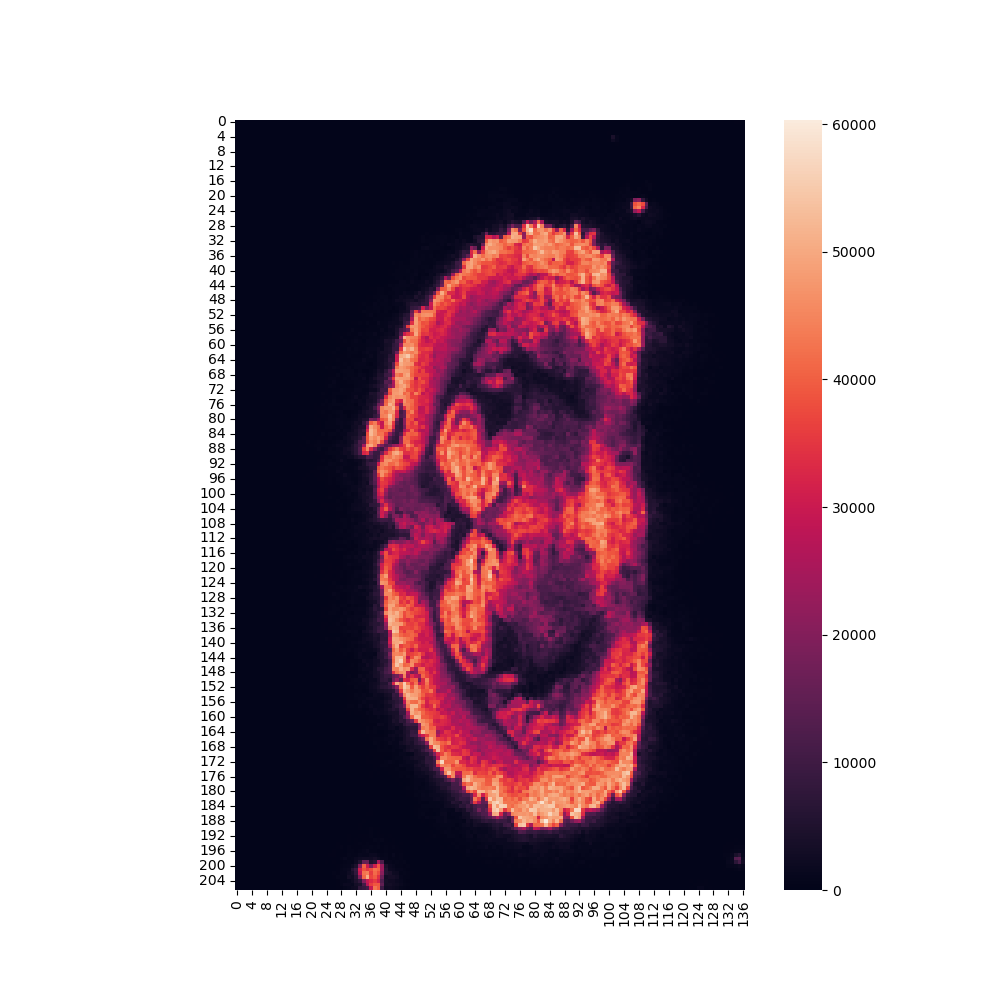

In [35]:
num_metabolites_negative = 10783
# Import metabolomics matrix only
metabolomics_matrix_268_a3_WT_s3 = pd.read_csv('Z:/All AGE Positive TL/AL011323_AGE_268_a3_WT_s3_pos on DESI HDMS_TLall.txt', sep = '\t', usecols = [i for i in range(3, num_metabolites_negative+3)], header = 2)
# Drop retention time
metabolomics_matrix_268_a3_WT_s3 = metabolomics_matrix_268_a3_WT_s3.drop(0)
# Reset index to start with 0
metabolomics_matrix_268_a3_WT_s3 = metabolomics_matrix_268_a3_WT_s3.reset_index(drop = True)
# Read in coordinates for metabolomics matrix
coordinates_matrix_268_a3_WT_s3 = pd.read_csv('Z:/All AGE Positive TL/AL011323_AGE_268_a3_WT_s3_pos on DESI HDMS_TLall.txt', sep = '\t', usecols = [i for i in range(1,3)], skiprows = 5, names = ['x_coord', 'y_coord'])
# Below we plot the ion 303.2328 (the second ion in the list)
uniform_data_268_a3_WT_s3 = np.array(metabolomics_matrix_268_a3_WT_s3).T.reshape([num_metabolites_negative, len(coordinates_matrix_268_a3_WT_s3[coordinates_matrix_268_a3_WT_s3['x_coord'] == coordinates_matrix_268_a3_WT_s3.iloc[0][0]]), len(coordinates_matrix_268_a3_WT_s3[coordinates_matrix_268_a3_WT_s3['y_coord'] == coordinates_matrix_268_a3_WT_s3.iloc[0][1]])])[metabolomics_matrix_268_a3_WT_s3.columns.get_loc('773.5269')]
ax = sns.heatmap(uniform_data_268_a3_WT_s3)
plt.show()

<a class="anchor" id="left_hippocampus"></a>
Below we use the segmentation tool from the mpl_interactions package. This allows us to easily trace a region of interest of an image and even spits out the coordinates for the mask we want to use!

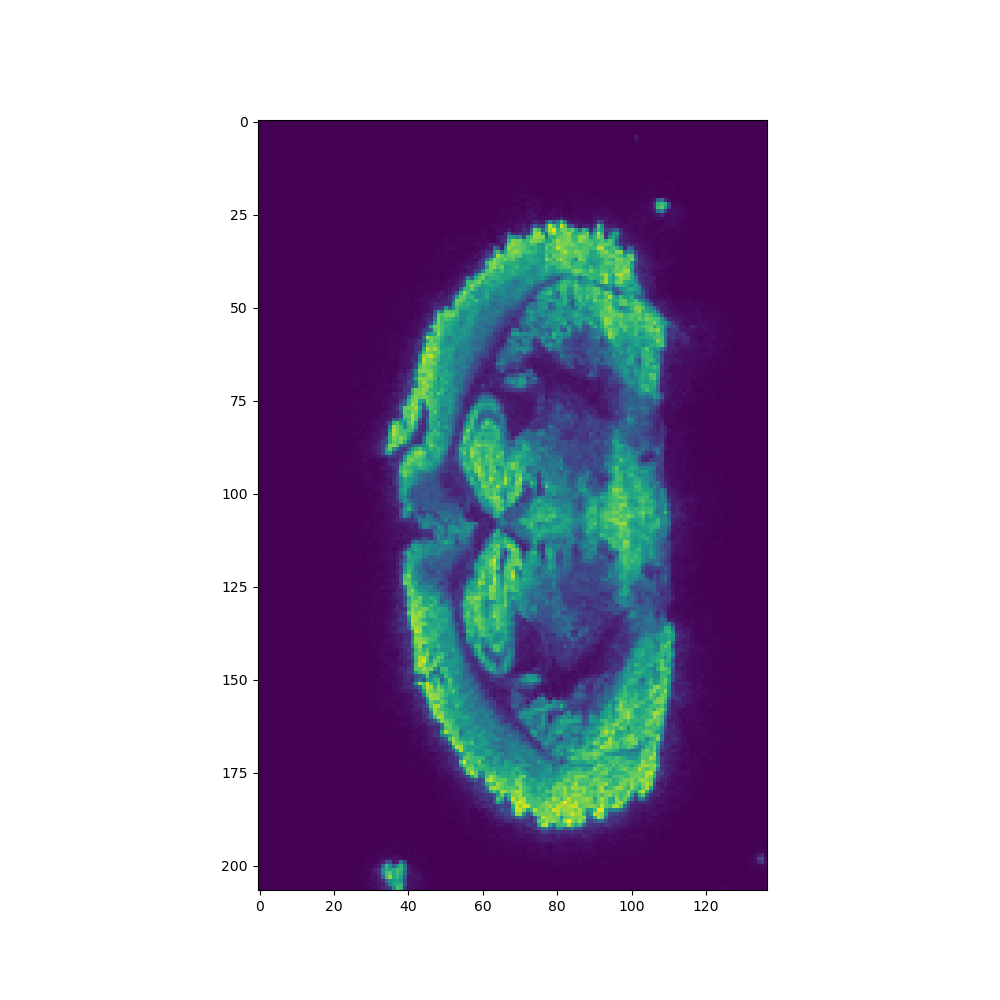

In [36]:
classes = ['Left Hippocampus']

# Define number of rois (here just 1 since we want the Left Hippocampus)
N_classes = 1
class_selector = widgets.Dropdown(options=classes, description="class")


def update(change):
    segmenter_268_a3_WT_s3_left_hippocampus.current_class = class_selector.value
    segmenter_268_a3_WT_s3_left_hippocampus.erasing = erasing_button.value


erasing_button = widgets.Checkbox(value=False, description="Erasing")
erasing_button.observe(update, names="value")

class_selector.observe(update, names="value")
# Define number of classes (rois) as N_classes set above
segmenter_268_a3_WT_s3_left_hippocampus = image_segmenter(uniform_data_268_a3_WT_s3, nclasses = N_classes, mask_alpha=0.76)
display(widgets.HBox([erasing_button, class_selector]))
display(segmenter_268_a3_WT_s3_left_hippocampus)

Below we set all background pixels to zero, and calculate the percentages of all ions within the brain and save these results.

In [37]:
# Make variable for mask
mask_268_a3_WT_s3_left_hippocampus = segmenter_268_a3_WT_s3_left_hippocampus.mask
# Create mask for pixels to tell where brain matter is
coordinates_roi_268_a3_WT_s3_left_hippocampus = pd.DataFrame(mask_268_a3_WT_s3_left_hippocampus.reshape(len(coordinates_matrix_268_a3_WT_s3)))
print('Number of pixels in mask:', len(coordinates_roi_268_a3_WT_s3_left_hippocampus[coordinates_roi_268_a3_WT_s3_left_hippocampus[0] == 1]))

# Make copy of metabolomics matrix to use as identifier of pixels for brain matter
metabolomics_matrix_268_a3_WT_s3_for_pixel_identities_left_hippocampus = metabolomics_matrix_268_a3_WT_s3.copy()
# Add segmentation labels to metabolomics matrix
metabolomics_matrix_268_a3_WT_s3_for_pixel_identities_left_hippocampus['roi'] = coordinates_roi_268_a3_WT_s3_left_hippocampus
# Specify the pixels are from the background
metabolomics_matrix_268_a3_WT_s3_for_pixel_identities_left_hippocampus.loc[metabolomics_matrix_268_a3_WT_s3_for_pixel_identities_left_hippocampus.roi == 0, :] = 0
# Drop identity column
metabolomics_matrix_268_a3_WT_s3_for_pixel_identities_left_hippocampus = metabolomics_matrix_268_a3_WT_s3_for_pixel_identities_left_hippocampus.drop(columns = 'roi')
# Save dataframe results
metabolomics_matrix_268_a3_WT_s3_for_pixel_identities_left_hippocampus.to_csv('Z:/All AGE Positive masks and roi sums/Left Hippocampus/268_a3_WT_s3_pixel_matrix_with_mask_left_hippocampus.csv')
metabolomics_matrix_268_a3_WT_s3_for_pixel_identities_left_hippocampus.to_csv('N:/All AGE Positive masks and roi sums/Left Hippocampus/268_a3_WT_s3_pixel_matrix_with_mask_left_hippocampus.csv')
# Find total number of pixels
metabolomics_matrix_268_a3_WT_s3_for_pixel_identities_left_hippocampus_pixel_count = len(metabolomics_matrix_268_a3_WT_s3_for_pixel_identities_left_hippocampus[metabolomics_matrix_268_a3_WT_s3_for_pixel_identities_left_hippocampus.sum(axis = 1) != 0])

# Find total ion current for pixel spectra
sum_by_pixel = metabolomics_matrix_268_a3_WT_s3_for_pixel_identities_left_hippocampus.sum(axis=1)
# Divide pixel values by pixel sum for all pixels
metabolomics_matrix_268_a3_WT_s3_for_pixel_identities_left_hippocampus_tic_normalized_pixel = metabolomics_matrix_268_a3_WT_s3_for_pixel_identities_left_hippocampus.divide(sum_by_pixel, axis=0)
# Sum values for ions
sums_of_ion_intensities_metabolomics_matrix_268_a3_WT_s3_for_pixel_identities_left_hippocampus_tic_normalized_pixel = metabolomics_matrix_268_a3_WT_s3_for_pixel_identities_left_hippocampus_tic_normalized_pixel.sum(axis = 0)
sums_of_ion_intensities_metabolomics_matrix_268_a3_WT_s3_for_pixel_identities_left_hippocampus_tic_normalized_pixel.to_csv('Z:/All AGE Positive masks and roi sums/Left Hippocampus/268_a3_WT_s3_sum_of_ions_within_left_hippocampus.csv')
# Divide by brain size to get normalized ion sums
sums_of_ion_intensities_metabolomics_matrix_268_a3_WT_s3_for_pixel_identities_left_hippocampus_tic_normalized_pixel_normalized_brain = sums_of_ion_intensities_metabolomics_matrix_268_a3_WT_s3_for_pixel_identities_left_hippocampus_tic_normalized_pixel/metabolomics_matrix_268_a3_WT_s3_for_pixel_identities_left_hippocampus_pixel_count
# Take sum of all values to get total ion count
total_sum_roi_normalized_268_a3_WT_s3_left_hippocampus = sums_of_ion_intensities_metabolomics_matrix_268_a3_WT_s3_for_pixel_identities_left_hippocampus_tic_normalized_pixel_normalized_brain.sum()
# Divide by total ion count and multiply by 100 to get final percentage
sums_of_ion_intensities_roi_percentage_normalized_268_a3_WT_s3_left_hippocampus = sums_of_ion_intensities_metabolomics_matrix_268_a3_WT_s3_for_pixel_identities_left_hippocampus_tic_normalized_pixel_normalized_brain/total_sum_roi_normalized_268_a3_WT_s3_left_hippocampus*100
sums_of_ion_intensities_roi_percentage_normalized_268_a3_WT_s3_left_hippocampus.to_csv('Z:/All AGE Positive masks and roi sums/Left Hippocampus/268_a3_WT_s3_percentage_of_ions_within_left_hippocampus.csv')

Number of pixels in mask: 467


<a class="anchor" id="Brain"></a>

Below we import a brain and show one ion that lights up the brain very well - 303.2328

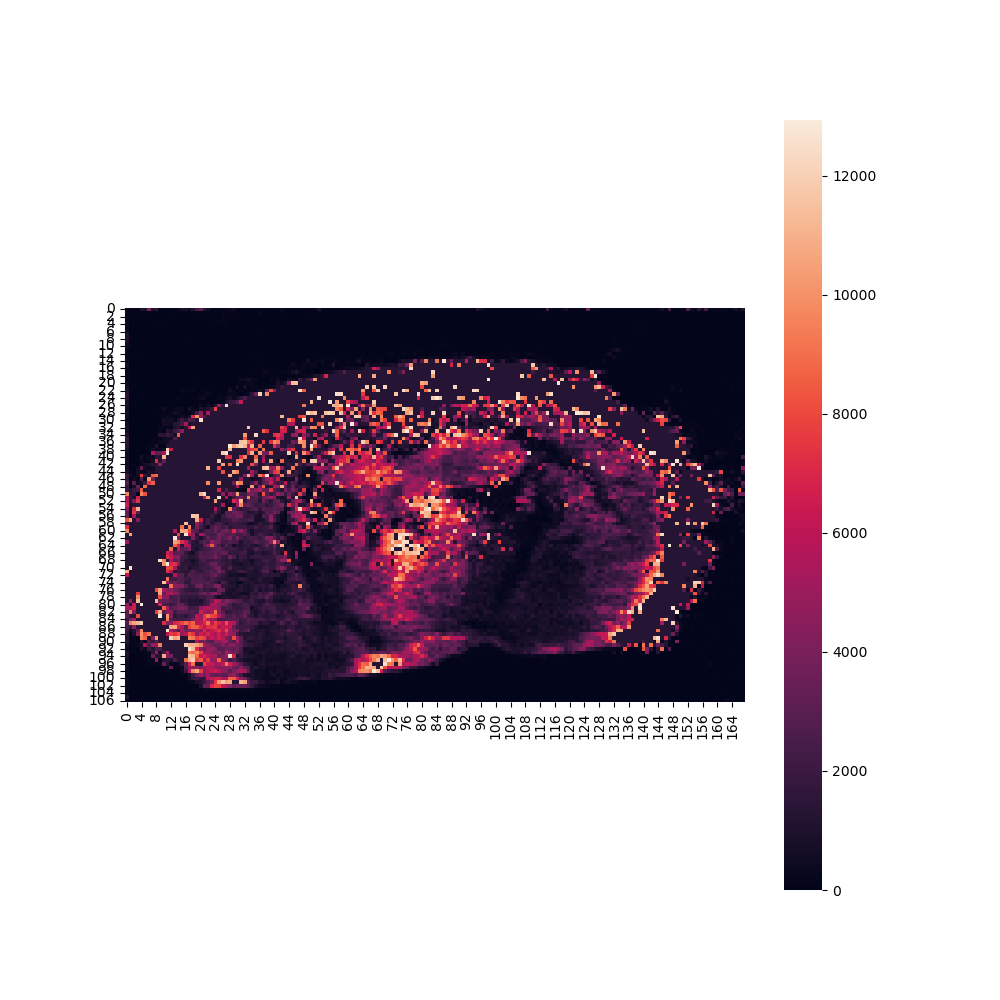

In [12]:
num_metabolites_negative = 10783
# Import metabolomics matrix only
metabolomics_matrix_225_3tg = pd.read_csv('Z:/All AGE Positive TL/AL080521_225_3tg_pos on DESI HDMS_TLall.txt', sep = '\t', usecols = [i for i in range(3, num_metabolites_negative+3)], header = 2)
# Drop retention time
metabolomics_matrix_225_3tg = metabolomics_matrix_225_3tg.drop(0)
# Reset index to start with 0
metabolomics_matrix_225_3tg = metabolomics_matrix_225_3tg.reset_index(drop = True)
# Read in coordinates for metabolomics matrix
coordinates_matrix_225_3tg = pd.read_csv('Z:/All AGE Positive TL/AL080521_225_3tg_pos on DESI HDMS_TLall.txt', sep = '\t', usecols = [i for i in range(1,3)], skiprows = 5, names = ['x_coord', 'y_coord'])
# Make copy of brain matrix for tracing
metabolomics_matrix_225_3tg_for_tracing = metabolomics_matrix_225_3tg.copy()
# Since our data has very high values for just a few pixels for the ion, we change these values so we can see the whole brain
ind = np.argpartition(metabolomics_matrix_225_3tg_for_tracing['773.5269'], -4000)[-4000:]
metabolomics_matrix_225_3tg_for_tracing.loc[ind.values.tolist(), '773.5269'] = np.median(metabolomics_matrix_225_3tg_for_tracing['773.5269'])
# Below we plot the ion 303.2328 (the second ion in the list)
uniform_data_225_3tg = np.array(metabolomics_matrix_225_3tg_for_tracing).T.reshape([num_metabolites_negative, len(coordinates_matrix_225_3tg[coordinates_matrix_225_3tg['x_coord'] == coordinates_matrix_225_3tg.iloc[0][0]]), len(coordinates_matrix_225_3tg[coordinates_matrix_225_3tg['y_coord'] == coordinates_matrix_225_3tg.iloc[0][1]])])[metabolomics_matrix_225_3tg.columns.get_loc('773.5269')]
ax = sns.heatmap(uniform_data_225_3tg)
plt.show()

<a class="anchor" id="left_hippocampus"></a>
Below we use the segmentation tool from the mpl_interactions package. This allows us to easily trace a region of interest of an image and even spits out the coordinates for the mask we want to use!

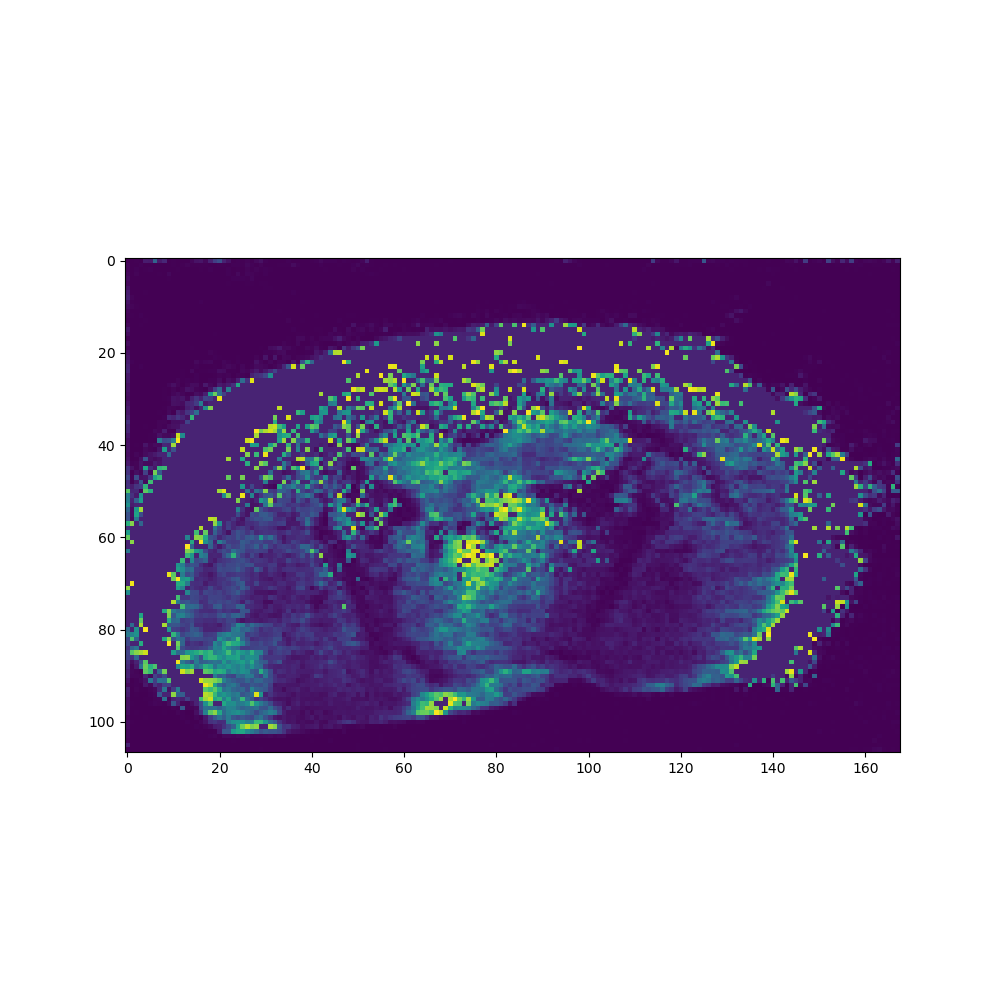

In [13]:
classes = ['Left Hippocampus']

# Define number of rois (here just 1 since we want the Left Hippocampus)
N_classes = 1
class_selector = widgets.Dropdown(options=classes, description="class")


def update(change):
    segmenter_225_3tg_left_hippocampus.current_class = class_selector.value
    segmenter_225_3tg_left_hippocampus.erasing = erasing_button.value


erasing_button = widgets.Checkbox(value=False, description="Erasing")
erasing_button.observe(update, names="value")

class_selector.observe(update, names="value")
# Define number of classes (rois) as N_classes set above
segmenter_225_3tg_left_hippocampus = image_segmenter(uniform_data_225_3tg, nclasses = N_classes, mask_alpha=0.76)
display(widgets.HBox([erasing_button, class_selector]))
display(segmenter_225_3tg_left_hippocampus)

Below we set all background pixels to zero, and calculate the percentages of all ions within the brain and save these results.

In [14]:
# Make variable for mask
mask_225_3tg_left_hippocampus = segmenter_225_3tg_left_hippocampus.mask
# Create mask for pixels to tell where brain matter is
coordinates_roi_225_3tg_left_hippocampus = pd.DataFrame(mask_225_3tg_left_hippocampus.reshape(len(coordinates_matrix_225_3tg)))
print('Number of pixels in mask:', len(coordinates_roi_225_3tg_left_hippocampus[coordinates_roi_225_3tg_left_hippocampus[0] == 1]))

# Make copy of metabolomics matrix to use as identifier of pixels for brain matter
metabolomics_matrix_225_3tg_for_pixel_identities_left_hippocampus = metabolomics_matrix_225_3tg.copy()
# Add segmentation labels to metabolomics matrix
metabolomics_matrix_225_3tg_for_pixel_identities_left_hippocampus['roi'] = coordinates_roi_225_3tg_left_hippocampus
# Specify the pixels are from the background
metabolomics_matrix_225_3tg_for_pixel_identities_left_hippocampus.loc[metabolomics_matrix_225_3tg_for_pixel_identities_left_hippocampus.roi == 0, :] = 0
# Drop identity column
metabolomics_matrix_225_3tg_for_pixel_identities_left_hippocampus = metabolomics_matrix_225_3tg_for_pixel_identities_left_hippocampus.drop(columns = 'roi')
# Save dataframe results
metabolomics_matrix_225_3tg_for_pixel_identities_left_hippocampus.to_csv('Z:/All AGE Positive masks and roi sums/Left Hippocampus/225_3tg_pixel_matrix_with_mask_left_hippocampus.csv')
metabolomics_matrix_225_3tg_for_pixel_identities_left_hippocampus.to_csv('N:/All AGE Positive masks and roi sums/Left Hippocampus/225_3tg_pixel_matrix_with_mask_left_hippocampus.csv')
# Find total number of pixels
metabolomics_matrix_225_3tg_for_pixel_identities_left_hippocampus_pixel_count = len(metabolomics_matrix_225_3tg_for_pixel_identities_left_hippocampus[metabolomics_matrix_225_3tg_for_pixel_identities_left_hippocampus.sum(axis = 1) != 0])

# Find total ion current for pixel spectra
sum_by_pixel = metabolomics_matrix_225_3tg_for_pixel_identities_left_hippocampus.sum(axis=1)
# Divide pixel values by pixel sum for all pixels
metabolomics_matrix_225_3tg_for_pixel_identities_left_hippocampus_tic_normalized_pixel = metabolomics_matrix_225_3tg_for_pixel_identities_left_hippocampus.divide(sum_by_pixel, axis=0)
# Sum values for ions
sums_of_ion_intensities_metabolomics_matrix_225_3tg_for_pixel_identities_left_hippocampus_tic_normalized_pixel = metabolomics_matrix_225_3tg_for_pixel_identities_left_hippocampus_tic_normalized_pixel.sum(axis = 0)
sums_of_ion_intensities_metabolomics_matrix_225_3tg_for_pixel_identities_left_hippocampus_tic_normalized_pixel.to_csv('Z:/All AGE Positive masks and roi sums/Left Hippocampus/225_3tg_sum_of_ions_within_left_hippocampus.csv')
# Divide by brain size to get normalized ion sums
sums_of_ion_intensities_metabolomics_matrix_225_3tg_for_pixel_identities_left_hippocampus_tic_normalized_pixel_normalized_brain = sums_of_ion_intensities_metabolomics_matrix_225_3tg_for_pixel_identities_left_hippocampus_tic_normalized_pixel/metabolomics_matrix_225_3tg_for_pixel_identities_left_hippocampus_pixel_count
# Take sum of all values to get total ion count
total_sum_roi_normalized_225_3tg_left_hippocampus = sums_of_ion_intensities_metabolomics_matrix_225_3tg_for_pixel_identities_left_hippocampus_tic_normalized_pixel_normalized_brain.sum()
# Divide by total ion count and multiply by 100 to get final percentage
sums_of_ion_intensities_roi_percentage_normalized_225_3tg_left_hippocampus = sums_of_ion_intensities_metabolomics_matrix_225_3tg_for_pixel_identities_left_hippocampus_tic_normalized_pixel_normalized_brain/total_sum_roi_normalized_225_3tg_left_hippocampus*100
sums_of_ion_intensities_roi_percentage_normalized_225_3tg_left_hippocampus.to_csv('Z:/All AGE Positive masks and roi sums/Left Hippocampus/225_3tg_percentage_of_ions_within_left_hippocampus.csv')

Number of pixels in mask: 241


<a class="anchor" id="Brain"></a>

Below we import a brain and show one ion that lights up the brain very well - 303.2328

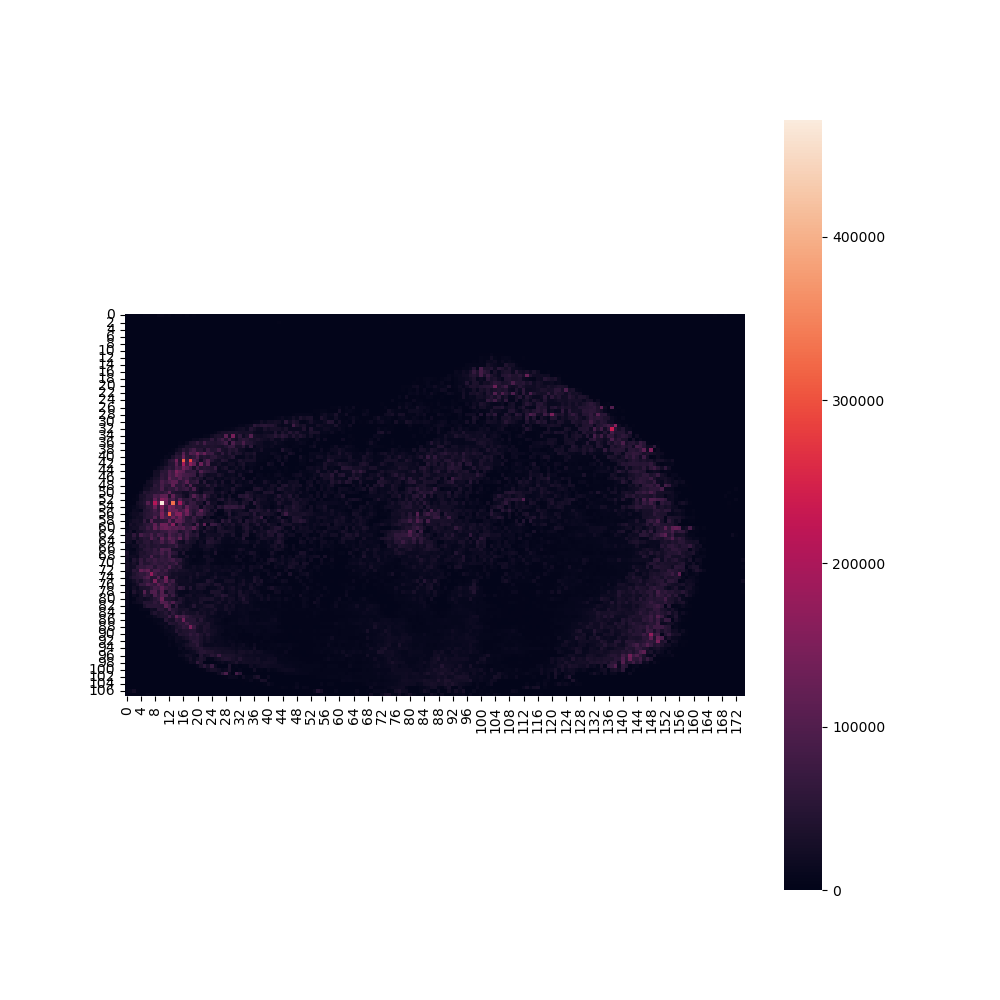

In [15]:
num_metabolites_negative = 10783
# Import metabolomics matrix only
metabolomics_matrix_225_a1wt = pd.read_csv('Z:/All AGE Positive TL/AL080521_225_a1wt_pos on DESI HDMS_TLall.txt', sep = '\t', usecols = [i for i in range(3, num_metabolites_negative+3)], header = 2)
# Drop retention time
metabolomics_matrix_225_a1wt = metabolomics_matrix_225_a1wt.drop(0)
# Reset index to start with 0
metabolomics_matrix_225_a1wt = metabolomics_matrix_225_a1wt.reset_index(drop = True)
# Read in coordinates for metabolomics matrix
coordinates_matrix_225_a1wt = pd.read_csv('Z:/All AGE Positive TL/AL080521_225_a1wt_pos on DESI HDMS_TLall.txt', sep = '\t', usecols = [i for i in range(1,3)], skiprows = 5, names = ['x_coord', 'y_coord'])
# Make copy of brain matrix for tracing
metabolomics_matrix_225_a1wt_for_tracing = metabolomics_matrix_225_a1wt.copy()
# Since our data has very high values for just a few pixels for the ion, we change these values so we can see the whole brain
ind = np.argpartition(metabolomics_matrix_225_a1wt_for_tracing['772.5237'], -1000)[-1000:]
metabolomics_matrix_225_a1wt_for_tracing.loc[ind.values.tolist(), '772.5237'] = np.median(metabolomics_matrix_225_a1wt_for_tracing['772.5237'])
# Below we plot the ion 303.2328 (the second ion in the list)
uniform_data_225_a1wt = np.array(metabolomics_matrix_225_a1wt_for_tracing).T.reshape([num_metabolites_negative, len(coordinates_matrix_225_a1wt[coordinates_matrix_225_a1wt['x_coord'] == coordinates_matrix_225_a1wt.iloc[0][0]]), len(coordinates_matrix_225_a1wt[coordinates_matrix_225_a1wt['y_coord'] == coordinates_matrix_225_a1wt.iloc[0][1]])])[metabolomics_matrix_225_a1wt.columns.get_loc('772.5237')]
ax = sns.heatmap(uniform_data_225_a1wt)
plt.show()

<a class="anchor" id="left_hippocampus"></a>
Below we use the segmentation tool from the mpl_interactions package. This allows us to easily trace a region of interest of an image and even spits out the coordinates for the mask we want to use!

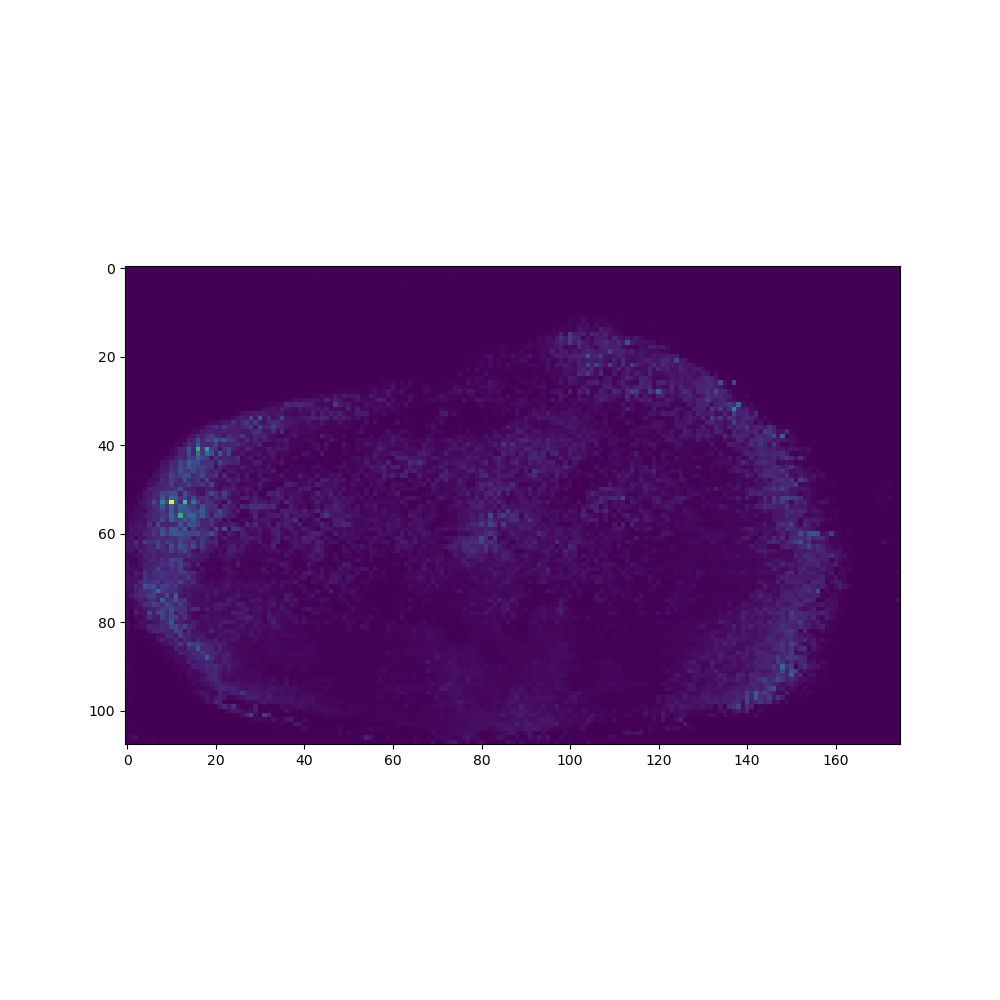

In [16]:
classes = ['Left Hippocampus']

# Define number of rois (here just 1 since we want the Left Hippocampus)
N_classes = 1
class_selector = widgets.Dropdown(options=classes, description="class")


def update(change):
    segmenter_225_a1wt_left_hippocampus.current_class = class_selector.value
    segmenter_225_a1wt_left_hippocampus.erasing = erasing_button.value


erasing_button = widgets.Checkbox(value=False, description="Erasing")
erasing_button.observe(update, names="value")

class_selector.observe(update, names="value")
# Define number of classes (rois) as N_classes set above
segmenter_225_a1wt_left_hippocampus = image_segmenter(uniform_data_225_a1wt, nclasses = N_classes, mask_alpha=0.76)
display(widgets.HBox([erasing_button, class_selector]))
display(segmenter_225_a1wt_left_hippocampus)

Below we set all background pixels to zero, and calculate the percentages of all ions within the brain and save these results.

In [17]:
# Make variable for mask
mask_225_a1wt_left_hippocampus = segmenter_225_a1wt_left_hippocampus.mask
# Create mask for pixels to tell where brain matter is
coordinates_roi_225_a1wt_left_hippocampus = pd.DataFrame(mask_225_a1wt_left_hippocampus.reshape(len(coordinates_matrix_225_a1wt)))
print('Number of pixels in mask:', len(coordinates_roi_225_a1wt_left_hippocampus[coordinates_roi_225_a1wt_left_hippocampus[0] == 1]))

# Make copy of metabolomics matrix to use as identifier of pixels for brain matter
metabolomics_matrix_225_a1wt_for_pixel_identities_left_hippocampus = metabolomics_matrix_225_a1wt.copy()
# Add segmentation labels to metabolomics matrix
metabolomics_matrix_225_a1wt_for_pixel_identities_left_hippocampus['roi'] = coordinates_roi_225_a1wt_left_hippocampus
# Specify the pixels are from the background
metabolomics_matrix_225_a1wt_for_pixel_identities_left_hippocampus.loc[metabolomics_matrix_225_a1wt_for_pixel_identities_left_hippocampus.roi == 0, :] = 0
# Drop identity column
metabolomics_matrix_225_a1wt_for_pixel_identities_left_hippocampus = metabolomics_matrix_225_a1wt_for_pixel_identities_left_hippocampus.drop(columns = 'roi')
# Save dataframe results
metabolomics_matrix_225_a1wt_for_pixel_identities_left_hippocampus.to_csv('Z:/All AGE Positive masks and roi sums/Left Hippocampus/225_a1wt_pixel_matrix_with_mask_left_hippocampus.csv')
metabolomics_matrix_225_a1wt_for_pixel_identities_left_hippocampus.to_csv('N:/All AGE Positive masks and roi sums/Left Hippocampus/225_a1wt_pixel_matrix_with_mask_left_hippocampus.csv')
# Find total number of pixels
metabolomics_matrix_225_a1wt_for_pixel_identities_left_hippocampus_pixel_count = len(metabolomics_matrix_225_a1wt_for_pixel_identities_left_hippocampus[metabolomics_matrix_225_a1wt_for_pixel_identities_left_hippocampus.sum(axis = 1) != 0])

# Find total ion current for pixel spectra
sum_by_pixel = metabolomics_matrix_225_a1wt_for_pixel_identities_left_hippocampus.sum(axis=1)
# Divide pixel values by pixel sum for all pixels
metabolomics_matrix_225_a1wt_for_pixel_identities_left_hippocampus_tic_normalized_pixel = metabolomics_matrix_225_a1wt_for_pixel_identities_left_hippocampus.divide(sum_by_pixel, axis=0)
# Sum values for ions
sums_of_ion_intensities_metabolomics_matrix_225_a1wt_for_pixel_identities_left_hippocampus_tic_normalized_pixel = metabolomics_matrix_225_a1wt_for_pixel_identities_left_hippocampus_tic_normalized_pixel.sum(axis = 0)
sums_of_ion_intensities_metabolomics_matrix_225_a1wt_for_pixel_identities_left_hippocampus_tic_normalized_pixel.to_csv('Z:/All AGE Positive masks and roi sums/Left Hippocampus/225_a1wt_sum_of_ions_within_left_hippocampus.csv')
# Divide by brain size to get normalized ion sums
sums_of_ion_intensities_metabolomics_matrix_225_a1wt_for_pixel_identities_left_hippocampus_tic_normalized_pixel_normalized_brain = sums_of_ion_intensities_metabolomics_matrix_225_a1wt_for_pixel_identities_left_hippocampus_tic_normalized_pixel/metabolomics_matrix_225_a1wt_for_pixel_identities_left_hippocampus_pixel_count
# Take sum of all values to get total ion count
total_sum_roi_normalized_225_a1wt_left_hippocampus = sums_of_ion_intensities_metabolomics_matrix_225_a1wt_for_pixel_identities_left_hippocampus_tic_normalized_pixel_normalized_brain.sum()
# Divide by total ion count and multiply by 100 to get final percentage
sums_of_ion_intensities_roi_percentage_normalized_225_a1wt_left_hippocampus = sums_of_ion_intensities_metabolomics_matrix_225_a1wt_for_pixel_identities_left_hippocampus_tic_normalized_pixel_normalized_brain/total_sum_roi_normalized_225_a1wt_left_hippocampus*100
sums_of_ion_intensities_roi_percentage_normalized_225_a1wt_left_hippocampus.to_csv('Z:/All AGE Positive masks and roi sums/Left Hippocampus/225_a1wt_percentage_of_ions_within_left_hippocampus.csv')

Number of pixels in mask: 299


<a class="anchor" id="Brain"></a>

Below we import a brain and show one ion that lights up the brain very well - 303.2328

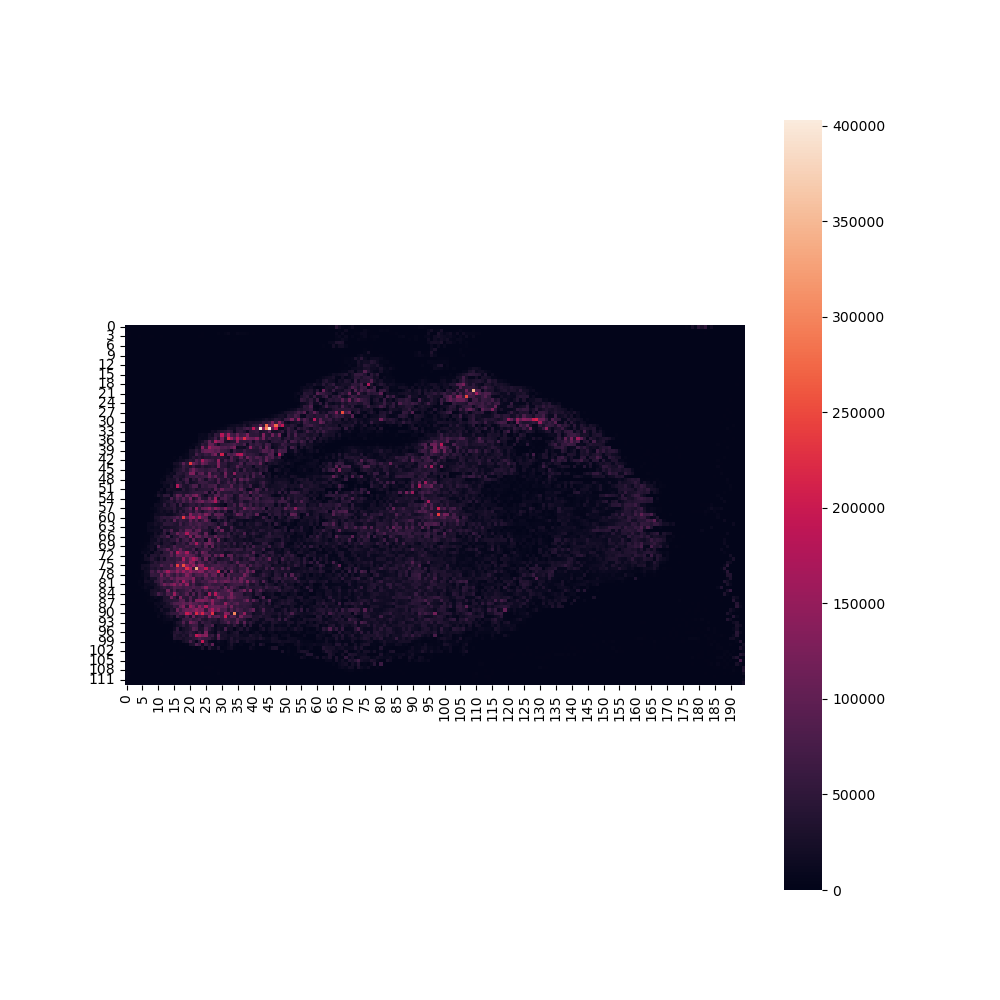

In [18]:
num_metabolites_negative = 10783
# Import metabolomics matrix only
metabolomics_matrix_208_5wt = pd.read_csv('Z:/All AGE Positive TL/AL080621_208_5wt_pos on DESI HDMS_TLall.txt', sep = '\t', usecols = [i for i in range(3, num_metabolites_negative+3)], header = 2)
# Drop retention time
metabolomics_matrix_208_5wt = metabolomics_matrix_208_5wt.drop(0)
# Reset index to start with 0
metabolomics_matrix_208_5wt = metabolomics_matrix_208_5wt.reset_index(drop = True)
# Read in coordinates for metabolomics matrix
coordinates_matrix_208_5wt = pd.read_csv('Z:/All AGE Positive TL/AL080621_208_5wt_pos on DESI HDMS_TLall.txt', sep = '\t', usecols = [i for i in range(1,3)], skiprows = 5, names = ['x_coord', 'y_coord'])
# Make copy of brain matrix for tracing
metabolomics_matrix_208_5wt_for_tracing = metabolomics_matrix_208_5wt.copy()
# Since our data has very high values for just a few pixels for the ion, we change these values so we can see the whole brain
ind = np.argpartition(metabolomics_matrix_208_5wt_for_tracing['772.5237'], -50)[-50:]
metabolomics_matrix_208_5wt_for_tracing.loc[ind.values.tolist(), '772.5237'] = np.median(metabolomics_matrix_208_5wt_for_tracing['772.5237'])
# Below we plot the ion 303.2328 (the second ion in the list)
uniform_data_208_5wt = np.array(metabolomics_matrix_208_5wt_for_tracing).T.reshape([num_metabolites_negative, len(coordinates_matrix_208_5wt[coordinates_matrix_208_5wt['x_coord'] == coordinates_matrix_208_5wt.iloc[0][0]]), len(coordinates_matrix_208_5wt[coordinates_matrix_208_5wt['y_coord'] == coordinates_matrix_208_5wt.iloc[0][1]])])[metabolomics_matrix_208_5wt.columns.get_loc('772.5237')]
ax = sns.heatmap(uniform_data_208_5wt)
plt.show()

<a class="anchor" id="left_hippocampus"></a>
Below we use the segmentation tool from the mpl_interactions package. This allows us to easily trace a region of interest of an image and even spits out the coordinates for the mask we want to use!

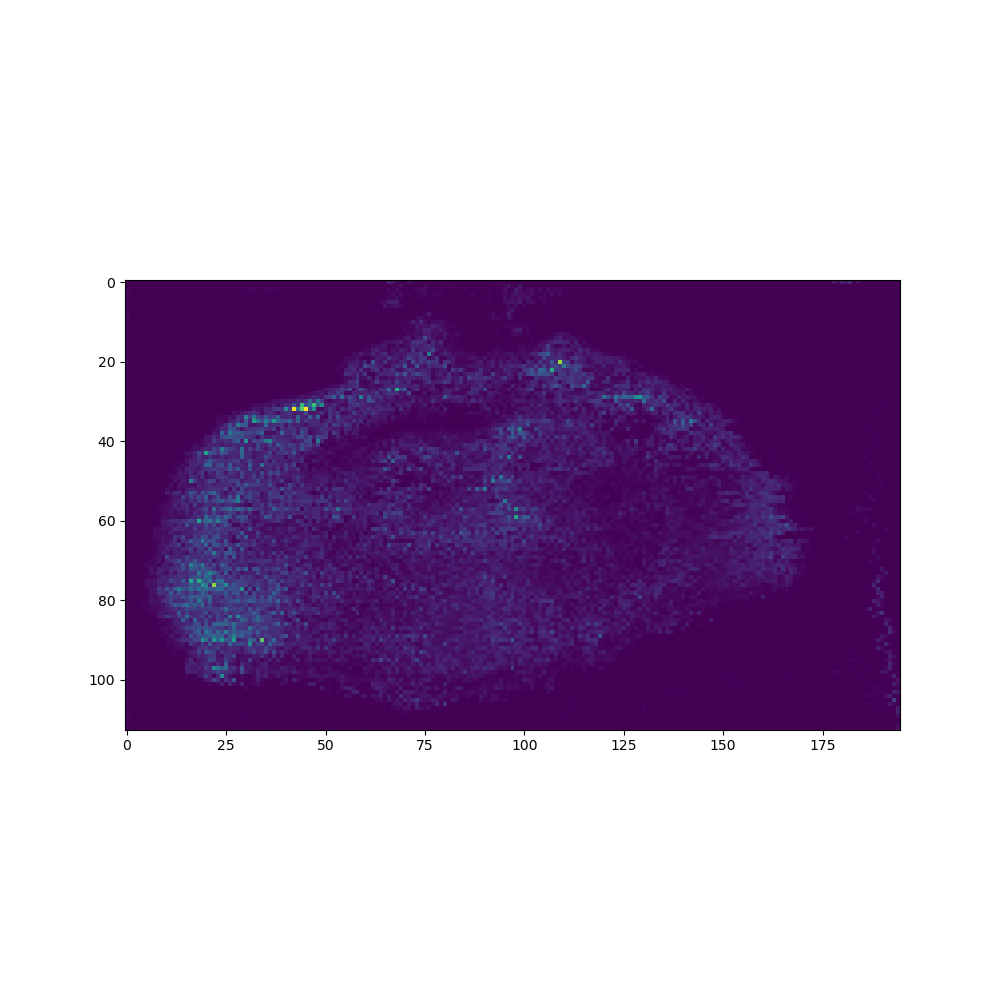

In [19]:
classes = ['Left Hippocampus']

# Define number of rois (here just 1 since we want the Left Hippocampus)
N_classes = 1
class_selector = widgets.Dropdown(options=classes, description="class")


def update(change):
    segmenter_208_5wt_left_hippocampus.current_class = class_selector.value
    segmenter_208_5wt_left_hippocampus.erasing = erasing_button.value


erasing_button = widgets.Checkbox(value=False, description="Erasing")
erasing_button.observe(update, names="value")

class_selector.observe(update, names="value")
# Define number of classes (rois) as N_classes set above
segmenter_208_5wt_left_hippocampus = image_segmenter(uniform_data_208_5wt, nclasses = N_classes, mask_alpha=0.76)
display(widgets.HBox([erasing_button, class_selector]))
display(segmenter_208_5wt_left_hippocampus)

Below we set all background pixels to zero, and calculate the percentages of all ions within the brain and save these results.

In [20]:
# Make variable for mask
mask_208_5wt_left_hippocampus = segmenter_208_5wt_left_hippocampus.mask
# Create mask for pixels to tell where brain matter is
coordinates_roi_208_5wt_left_hippocampus = pd.DataFrame(mask_208_5wt_left_hippocampus.reshape(len(coordinates_matrix_208_5wt)))
print('Number of pixels in mask:', len(coordinates_roi_208_5wt_left_hippocampus[coordinates_roi_208_5wt_left_hippocampus[0] == 1]))

# Make copy of metabolomics matrix to use as identifier of pixels for brain matter
metabolomics_matrix_208_5wt_for_pixel_identities_left_hippocampus = metabolomics_matrix_208_5wt.copy()
# Add segmentation labels to metabolomics matrix
metabolomics_matrix_208_5wt_for_pixel_identities_left_hippocampus['roi'] = coordinates_roi_208_5wt_left_hippocampus
# Specify the pixels are from the background
metabolomics_matrix_208_5wt_for_pixel_identities_left_hippocampus.loc[metabolomics_matrix_208_5wt_for_pixel_identities_left_hippocampus.roi == 0, :] = 0
# Drop identity column
metabolomics_matrix_208_5wt_for_pixel_identities_left_hippocampus = metabolomics_matrix_208_5wt_for_pixel_identities_left_hippocampus.drop(columns = 'roi')
# Save dataframe results
metabolomics_matrix_208_5wt_for_pixel_identities_left_hippocampus.to_csv('Z:/All AGE Positive masks and roi sums/Left Hippocampus/208_5wt_pixel_matrix_with_mask_left_hippocampus.csv')
metabolomics_matrix_208_5wt_for_pixel_identities_left_hippocampus.to_csv('N:/All AGE Positive masks and roi sums/Left Hippocampus/208_5wt_pixel_matrix_with_mask_left_hippocampus.csv')
# Find total number of pixels
metabolomics_matrix_208_5wt_for_pixel_identities_left_hippocampus_pixel_count = len(metabolomics_matrix_208_5wt_for_pixel_identities_left_hippocampus[metabolomics_matrix_208_5wt_for_pixel_identities_left_hippocampus.sum(axis = 1) != 0])

# Find total ion current for pixel spectra
sum_by_pixel = metabolomics_matrix_208_5wt_for_pixel_identities_left_hippocampus.sum(axis=1)
# Divide pixel values by pixel sum for all pixels
metabolomics_matrix_208_5wt_for_pixel_identities_left_hippocampus_tic_normalized_pixel = metabolomics_matrix_208_5wt_for_pixel_identities_left_hippocampus.divide(sum_by_pixel, axis=0)
# Sum values for ions
sums_of_ion_intensities_metabolomics_matrix_208_5wt_for_pixel_identities_left_hippocampus_tic_normalized_pixel = metabolomics_matrix_208_5wt_for_pixel_identities_left_hippocampus_tic_normalized_pixel.sum(axis = 0)
sums_of_ion_intensities_metabolomics_matrix_208_5wt_for_pixel_identities_left_hippocampus_tic_normalized_pixel.to_csv('Z:/All AGE Positive masks and roi sums/Left Hippocampus/208_5wt_sum_of_ions_within_left_hippocampus.csv')
# Divide by brain size to get normalized ion sums
sums_of_ion_intensities_metabolomics_matrix_208_5wt_for_pixel_identities_left_hippocampus_tic_normalized_pixel_normalized_brain = sums_of_ion_intensities_metabolomics_matrix_208_5wt_for_pixel_identities_left_hippocampus_tic_normalized_pixel/metabolomics_matrix_208_5wt_for_pixel_identities_left_hippocampus_pixel_count
# Take sum of all values to get total ion count
total_sum_roi_normalized_208_5wt_left_hippocampus = sums_of_ion_intensities_metabolomics_matrix_208_5wt_for_pixel_identities_left_hippocampus_tic_normalized_pixel_normalized_brain.sum()
# Divide by total ion count and multiply by 100 to get final percentage
sums_of_ion_intensities_roi_percentage_normalized_208_5wt_left_hippocampus = sums_of_ion_intensities_metabolomics_matrix_208_5wt_for_pixel_identities_left_hippocampus_tic_normalized_pixel_normalized_brain/total_sum_roi_normalized_208_5wt_left_hippocampus*100
sums_of_ion_intensities_roi_percentage_normalized_208_5wt_left_hippocampus.to_csv('Z:/All AGE Positive masks and roi sums/Left Hippocampus/208_5wt_percentage_of_ions_within_left_hippocampus.csv')

Number of pixels in mask: 303


<a class="anchor" id="Brain"></a>

Below we import a brain and show one ion that lights up the brain very well - 303.2328

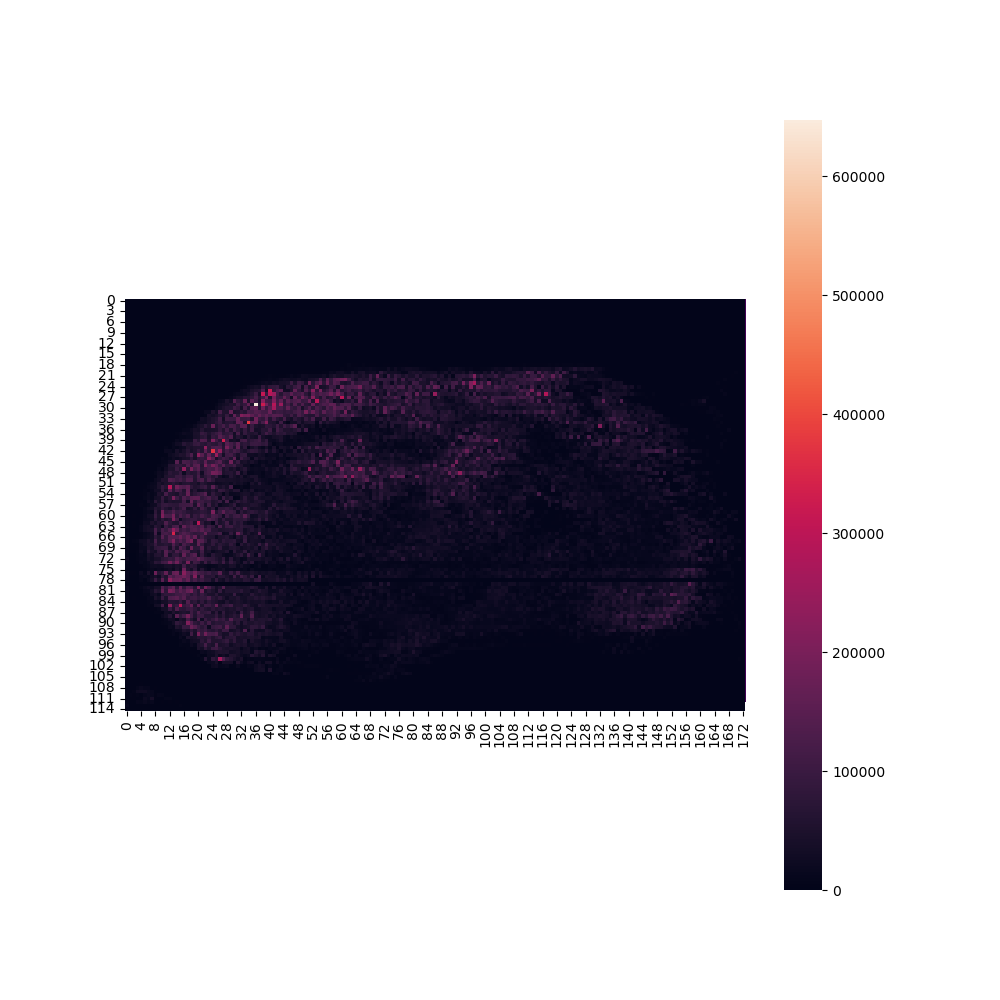

In [21]:
num_metabolites_negative = 10783
# Import metabolomics matrix only
metabolomics_matrix_209_2wt = pd.read_csv('Z:/All AGE Positive TL/AL080621_209_2wt_pos on DESI HDMS_TLall.txt', sep = '\t', usecols = [i for i in range(3, num_metabolites_negative+3)], header = 2)
# Drop retention time
metabolomics_matrix_209_2wt = metabolomics_matrix_209_2wt.drop(0)
# Reset index to start with 0
metabolomics_matrix_209_2wt = metabolomics_matrix_209_2wt.reset_index(drop = True)
# Read in coordinates for metabolomics matrix
coordinates_matrix_209_2wt = pd.read_csv('Z:/All AGE Positive TL/AL080621_209_2wt_pos on DESI HDMS_TLall.txt', sep = '\t', usecols = [i for i in range(1,3)], skiprows = 5, names = ['x_coord', 'y_coord'])
# Make copy of brain matrix for tracing
metabolomics_matrix_209_2wt_for_tracing = metabolomics_matrix_209_2wt.copy()
# Since our data has very high values for just a few pixels for the ion, we change these values so we can see the whole brain
ind = np.argpartition(metabolomics_matrix_209_2wt_for_tracing['772.5237'], -50)[-50:]
metabolomics_matrix_209_2wt_for_tracing.loc[ind.values.tolist(), '772.5237'] = np.median(metabolomics_matrix_209_2wt_for_tracing['772.5237'])
# Below we plot the ion 303.2328 (the second ion in the list)
uniform_data_209_2wt = np.array(metabolomics_matrix_209_2wt_for_tracing).T.reshape([num_metabolites_negative, len(coordinates_matrix_209_2wt[coordinates_matrix_209_2wt['x_coord'] == coordinates_matrix_209_2wt.iloc[0][0]]), len(coordinates_matrix_209_2wt[coordinates_matrix_209_2wt['y_coord'] == coordinates_matrix_209_2wt.iloc[0][1]])])[metabolomics_matrix_209_2wt.columns.get_loc('772.5237')]
ax = sns.heatmap(uniform_data_209_2wt)
plt.show()

<a class="anchor" id="left_hippocampus"></a>
Below we use the segmentation tool from the mpl_interactions package. This allows us to easily trace a region of interest of an image and even spits out the coordinates for the mask we want to use!

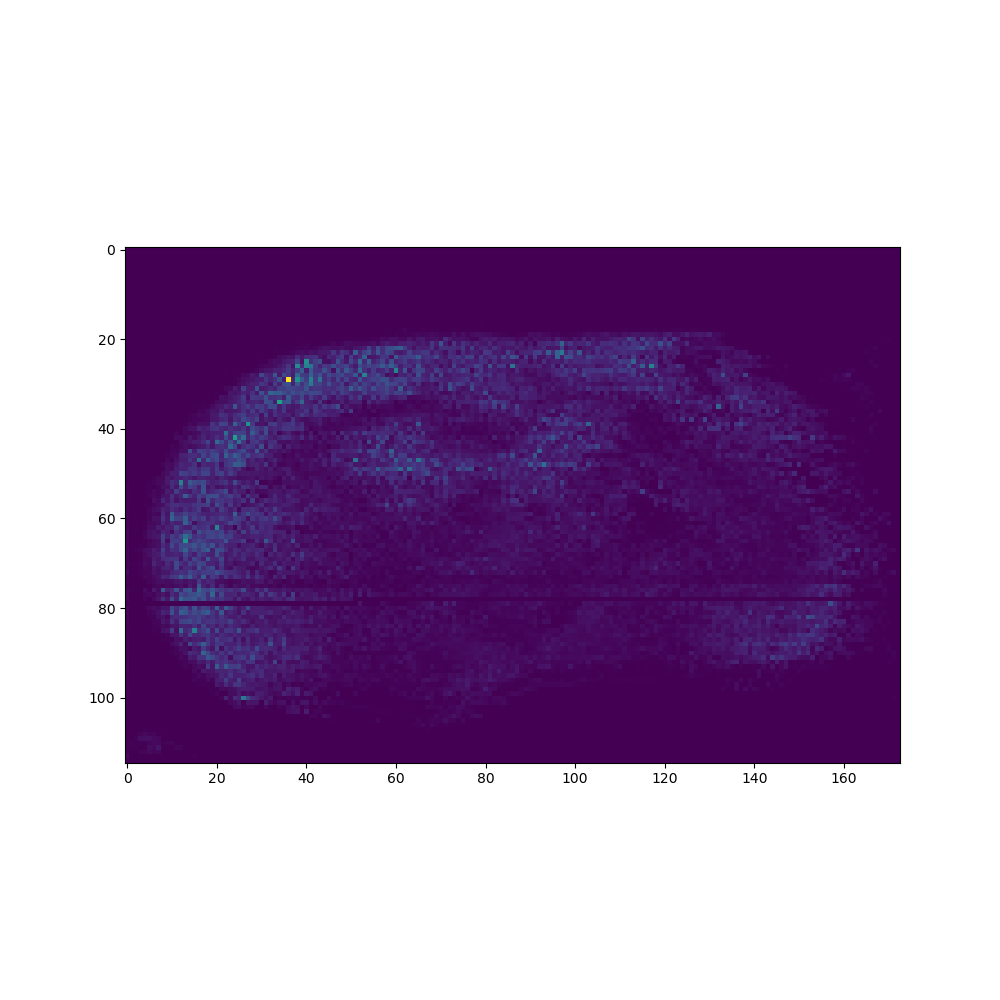

In [26]:
classes = ['Left Hippocampus']

# Define number of rois (here just 1 since we want the Left Hippocampus)
N_classes = 1
class_selector = widgets.Dropdown(options=classes, description="class")


def update(change):
    segmenter_209_2wt_left_hippocampus.current_class = class_selector.value
    segmenter_209_2wt_left_hippocampus.erasing = erasing_button.value


erasing_button = widgets.Checkbox(value=False, description="Erasing")
erasing_button.observe(update, names="value")

class_selector.observe(update, names="value")
# Define number of classes (rois) as N_classes set above
segmenter_209_2wt_left_hippocampus = image_segmenter(uniform_data_209_2wt, nclasses = N_classes, mask_alpha=0.76)
display(widgets.HBox([erasing_button, class_selector]))
display(segmenter_209_2wt_left_hippocampus)

Below we set all background pixels to zero, and calculate the percentages of all ions within the brain and save these results.

In [24]:
# Make variable for mask
mask_209_2wt_left_hippocampus = segmenter_209_2wt_left_hippocampus.mask
# Create mask for pixels to tell where brain matter is
coordinates_roi_209_2wt_left_hippocampus = pd.DataFrame(mask_209_2wt_left_hippocampus.reshape(len(coordinates_matrix_209_2wt)))
print('Number of pixels in mask:', len(coordinates_roi_209_2wt_left_hippocampus[coordinates_roi_209_2wt_left_hippocampus[0] == 1]))

# Make copy of metabolomics matrix to use as identifier of pixels for brain matter
metabolomics_matrix_209_2wt_for_pixel_identities_left_hippocampus = metabolomics_matrix_209_2wt.copy()
# Add segmentation labels to metabolomics matrix
metabolomics_matrix_209_2wt_for_pixel_identities_left_hippocampus['roi'] = coordinates_roi_209_2wt_left_hippocampus
# Specify the pixels are from the background
metabolomics_matrix_209_2wt_for_pixel_identities_left_hippocampus.loc[metabolomics_matrix_209_2wt_for_pixel_identities_left_hippocampus.roi == 0, :] = 0
# Drop identity column
metabolomics_matrix_209_2wt_for_pixel_identities_left_hippocampus = metabolomics_matrix_209_2wt_for_pixel_identities_left_hippocampus.drop(columns = 'roi')
# Save dataframe results
metabolomics_matrix_209_2wt_for_pixel_identities_left_hippocampus.to_csv('Z:/All AGE Positive masks and roi sums/Left Hippocampus/209_2wt_pixel_matrix_with_mask_left_hippocampus.csv')
metabolomics_matrix_209_2wt_for_pixel_identities_left_hippocampus.to_csv('N:/All AGE Positive masks and roi sums/Left Hippocampus/209_2wt_pixel_matrix_with_mask_left_hippocampus.csv')
# Find total number of pixels
metabolomics_matrix_209_2wt_for_pixel_identities_left_hippocampus_pixel_count = len(metabolomics_matrix_209_2wt_for_pixel_identities_left_hippocampus[metabolomics_matrix_209_2wt_for_pixel_identities_left_hippocampus.sum(axis = 1) != 0])

# Find total ion current for pixel spectra
sum_by_pixel = metabolomics_matrix_209_2wt_for_pixel_identities_left_hippocampus.sum(axis=1)
# Divide pixel values by pixel sum for all pixels
metabolomics_matrix_209_2wt_for_pixel_identities_left_hippocampus_tic_normalized_pixel = metabolomics_matrix_209_2wt_for_pixel_identities_left_hippocampus.divide(sum_by_pixel, axis=0)
# Sum values for ions
sums_of_ion_intensities_metabolomics_matrix_209_2wt_for_pixel_identities_left_hippocampus_tic_normalized_pixel = metabolomics_matrix_209_2wt_for_pixel_identities_left_hippocampus_tic_normalized_pixel.sum(axis = 0)
sums_of_ion_intensities_metabolomics_matrix_209_2wt_for_pixel_identities_left_hippocampus_tic_normalized_pixel.to_csv('Z:/All AGE Positive masks and roi sums/Left Hippocampus/209_2wt_sum_of_ions_within_left_hippocampus.csv')
# Divide by brain size to get normalized ion sums
sums_of_ion_intensities_metabolomics_matrix_209_2wt_for_pixel_identities_left_hippocampus_tic_normalized_pixel_normalized_brain = sums_of_ion_intensities_metabolomics_matrix_209_2wt_for_pixel_identities_left_hippocampus_tic_normalized_pixel/metabolomics_matrix_209_2wt_for_pixel_identities_left_hippocampus_pixel_count
# Take sum of all values to get total ion count
total_sum_roi_normalized_209_2wt_left_hippocampus = sums_of_ion_intensities_metabolomics_matrix_209_2wt_for_pixel_identities_left_hippocampus_tic_normalized_pixel_normalized_brain.sum()
# Divide by total ion count and multiply by 100 to get final percentage
sums_of_ion_intensities_roi_percentage_normalized_209_2wt_left_hippocampus = sums_of_ion_intensities_metabolomics_matrix_209_2wt_for_pixel_identities_left_hippocampus_tic_normalized_pixel_normalized_brain/total_sum_roi_normalized_209_2wt_left_hippocampus*100
sums_of_ion_intensities_roi_percentage_normalized_209_2wt_left_hippocampus.to_csv('Z:/All AGE Positive masks and roi sums/Left Hippocampus/209_2wt_percentage_of_ions_within_left_hippocampus.csv')

Number of pixels in mask: 446


<a class="anchor" id="Brain"></a>

Below we import a brain and show one ion that lights up the brain very well - 303.2328

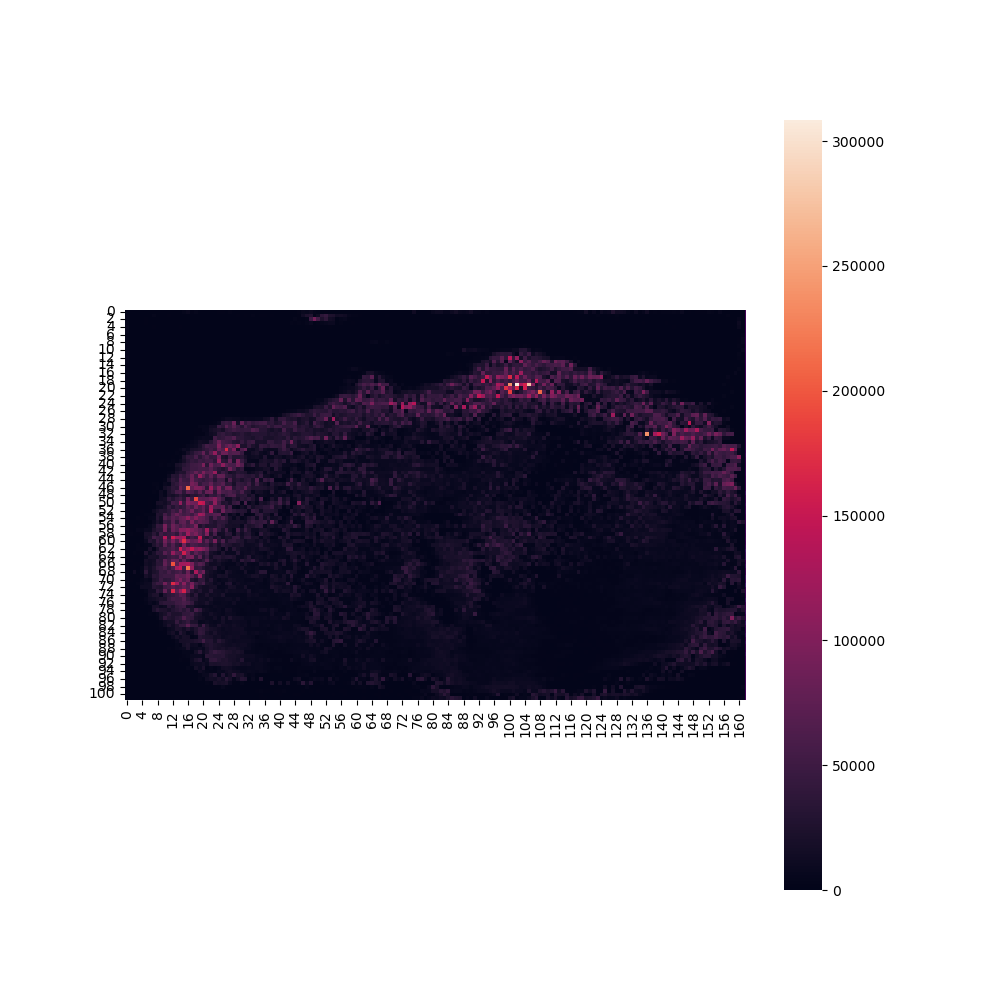

In [25]:
num_metabolites_negative = 10783
# Import metabolomics matrix only
metabolomics_matrix_210_a1tg = pd.read_csv('Z:/All AGE Positive TL/AL080621_210_a1tg_pos on DESI HDMS_TLall.txt', sep = '\t', usecols = [i for i in range(3, num_metabolites_negative+3)], header = 2)
# Drop retention time
metabolomics_matrix_210_a1tg = metabolomics_matrix_210_a1tg.drop(0)
# Reset index to start with 0
metabolomics_matrix_210_a1tg = metabolomics_matrix_210_a1tg.reset_index(drop = True)
# Read in coordinates for metabolomics matrix
coordinates_matrix_210_a1tg = pd.read_csv('Z:/All AGE Positive TL/AL080621_210_a1tg_pos on DESI HDMS_TLall.txt', sep = '\t', usecols = [i for i in range(1,3)], skiprows = 5, names = ['x_coord', 'y_coord'])
# Make copy of brain matrix for tracing
metabolomics_matrix_210_a1tg_for_tracing = metabolomics_matrix_210_a1tg.copy()
# Since our data has very high values for just a few pixels for the ion, we change these values so we can see the whole brain
ind = np.argpartition(metabolomics_matrix_210_a1tg_for_tracing['772.5237'], -500)[-500:]
metabolomics_matrix_210_a1tg_for_tracing.loc[ind.values.tolist(), '772.5237'] = np.median(metabolomics_matrix_210_a1tg_for_tracing['772.5237'])
# Below we plot the ion 303.2328 (the second ion in the list)
uniform_data_210_a1tg = np.array(metabolomics_matrix_210_a1tg_for_tracing).T.reshape([num_metabolites_negative, len(coordinates_matrix_210_a1tg[coordinates_matrix_210_a1tg['x_coord'] == coordinates_matrix_210_a1tg.iloc[0][0]]), len(coordinates_matrix_210_a1tg[coordinates_matrix_210_a1tg['y_coord'] == coordinates_matrix_210_a1tg.iloc[0][1]])])[metabolomics_matrix_210_a1tg.columns.get_loc('772.5237')]
ax = sns.heatmap(uniform_data_210_a1tg)
plt.show()

<a class="anchor" id="left_hippocampus"></a>
Below we use the segmentation tool from the mpl_interactions package. This allows us to easily trace a region of interest of an image and even spits out the coordinates for the mask we want to use!

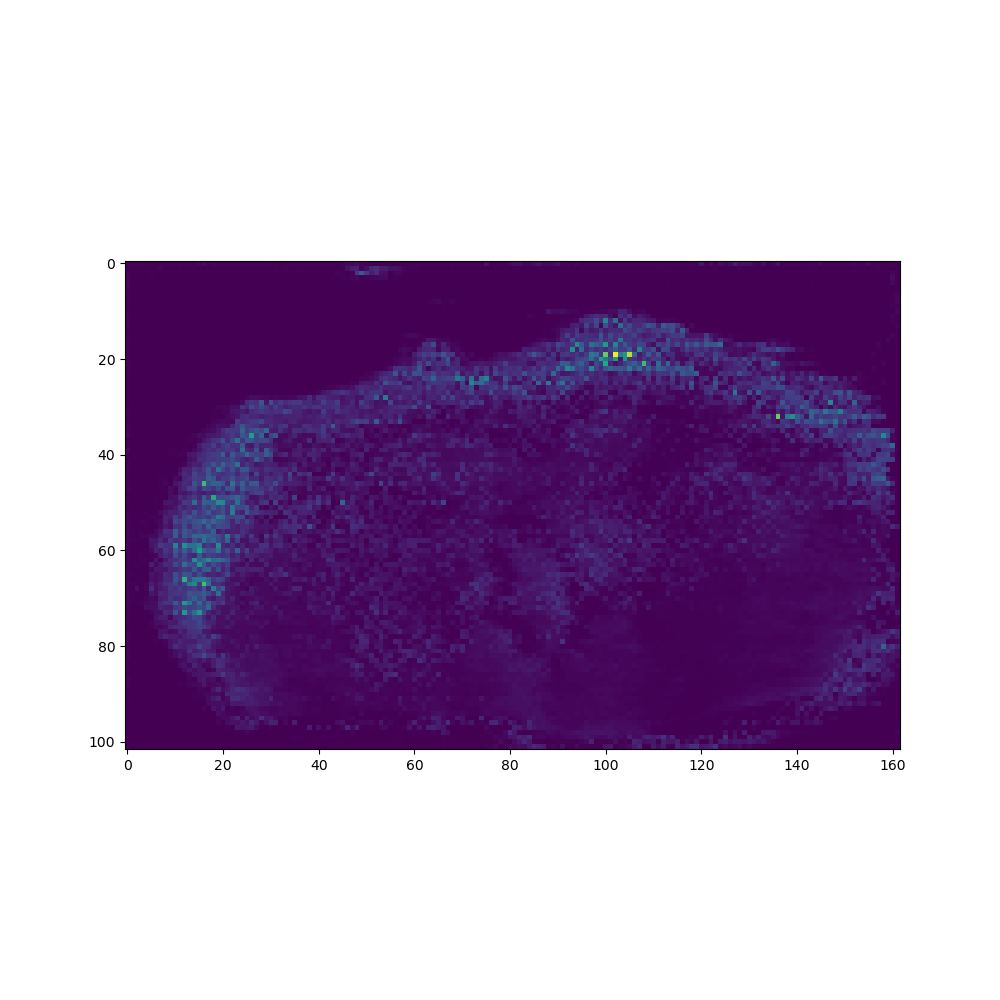

In [27]:
classes = ['Left Hippocampus']

# Define number of rois (here just 1 since we want the Left Hippocampus)
N_classes = 1
class_selector = widgets.Dropdown(options=classes, description="class")


def update(change):
    segmenter_210_a1tg_left_hippocampus.current_class = class_selector.value
    segmenter_210_a1tg_left_hippocampus.erasing = erasing_button.value


erasing_button = widgets.Checkbox(value=False, description="Erasing")
erasing_button.observe(update, names="value")

class_selector.observe(update, names="value")
# Define number of classes (rois) as N_classes set above
segmenter_210_a1tg_left_hippocampus = image_segmenter(uniform_data_210_a1tg, nclasses = N_classes, mask_alpha=0.76)
display(widgets.HBox([erasing_button, class_selector]))
display(segmenter_210_a1tg_left_hippocampus)

Below we set all background pixels to zero, and calculate the percentages of all ions within the brain and save these results.

In [28]:
# Make variable for mask
mask_210_a1tg_left_hippocampus = segmenter_210_a1tg_left_hippocampus.mask
# Create mask for pixels to tell where brain matter is
coordinates_roi_210_a1tg_left_hippocampus = pd.DataFrame(mask_210_a1tg_left_hippocampus.reshape(len(coordinates_matrix_210_a1tg)))
print('Number of pixels in mask:', len(coordinates_roi_210_a1tg_left_hippocampus[coordinates_roi_210_a1tg_left_hippocampus[0] == 1]))

# Make copy of metabolomics matrix to use as identifier of pixels for brain matter
metabolomics_matrix_210_a1tg_for_pixel_identities_left_hippocampus = metabolomics_matrix_210_a1tg.copy()
# Add segmentation labels to metabolomics matrix
metabolomics_matrix_210_a1tg_for_pixel_identities_left_hippocampus['roi'] = coordinates_roi_210_a1tg_left_hippocampus
# Specify the pixels are from the background
metabolomics_matrix_210_a1tg_for_pixel_identities_left_hippocampus.loc[metabolomics_matrix_210_a1tg_for_pixel_identities_left_hippocampus.roi == 0, :] = 0
# Drop identity column
metabolomics_matrix_210_a1tg_for_pixel_identities_left_hippocampus = metabolomics_matrix_210_a1tg_for_pixel_identities_left_hippocampus.drop(columns = 'roi')
# Save dataframe results
metabolomics_matrix_210_a1tg_for_pixel_identities_left_hippocampus.to_csv('Z:/All AGE Positive masks and roi sums/Left Hippocampus/210_a1tg_pixel_matrix_with_mask_left_hippocampus.csv')
metabolomics_matrix_210_a1tg_for_pixel_identities_left_hippocampus.to_csv('N:/All AGE Positive masks and roi sums/Left Hippocampus/210_a1tg_pixel_matrix_with_mask_left_hippocampus.csv')
# Find total number of pixels
metabolomics_matrix_210_a1tg_for_pixel_identities_left_hippocampus_pixel_count = len(metabolomics_matrix_210_a1tg_for_pixel_identities_left_hippocampus[metabolomics_matrix_210_a1tg_for_pixel_identities_left_hippocampus.sum(axis = 1) != 0])

# Find total ion current for pixel spectra
sum_by_pixel = metabolomics_matrix_210_a1tg_for_pixel_identities_left_hippocampus.sum(axis=1)
# Divide pixel values by pixel sum for all pixels
metabolomics_matrix_210_a1tg_for_pixel_identities_left_hippocampus_tic_normalized_pixel = metabolomics_matrix_210_a1tg_for_pixel_identities_left_hippocampus.divide(sum_by_pixel, axis=0)
# Sum values for ions
sums_of_ion_intensities_metabolomics_matrix_210_a1tg_for_pixel_identities_left_hippocampus_tic_normalized_pixel = metabolomics_matrix_210_a1tg_for_pixel_identities_left_hippocampus_tic_normalized_pixel.sum(axis = 0)
sums_of_ion_intensities_metabolomics_matrix_210_a1tg_for_pixel_identities_left_hippocampus_tic_normalized_pixel.to_csv('Z:/All AGE Positive masks and roi sums/Left Hippocampus/210_a1tg_sum_of_ions_within_left_hippocampus.csv')
# Divide by brain size to get normalized ion sums
sums_of_ion_intensities_metabolomics_matrix_210_a1tg_for_pixel_identities_left_hippocampus_tic_normalized_pixel_normalized_brain = sums_of_ion_intensities_metabolomics_matrix_210_a1tg_for_pixel_identities_left_hippocampus_tic_normalized_pixel/metabolomics_matrix_210_a1tg_for_pixel_identities_left_hippocampus_pixel_count
# Take sum of all values to get total ion count
total_sum_roi_normalized_210_a1tg_left_hippocampus = sums_of_ion_intensities_metabolomics_matrix_210_a1tg_for_pixel_identities_left_hippocampus_tic_normalized_pixel_normalized_brain.sum()
# Divide by total ion count and multiply by 100 to get final percentage
sums_of_ion_intensities_roi_percentage_normalized_210_a1tg_left_hippocampus = sums_of_ion_intensities_metabolomics_matrix_210_a1tg_for_pixel_identities_left_hippocampus_tic_normalized_pixel_normalized_brain/total_sum_roi_normalized_210_a1tg_left_hippocampus*100
sums_of_ion_intensities_roi_percentage_normalized_210_a1tg_left_hippocampus.to_csv('Z:/All AGE Positive masks and roi sums/Left Hippocampus/210_a1tg_percentage_of_ions_within_left_hippocampus.csv')

Number of pixels in mask: 356


<a class="anchor" id="Brain"></a>

Below we import a brain and show one ion that lights up the brain very well - 303.2328

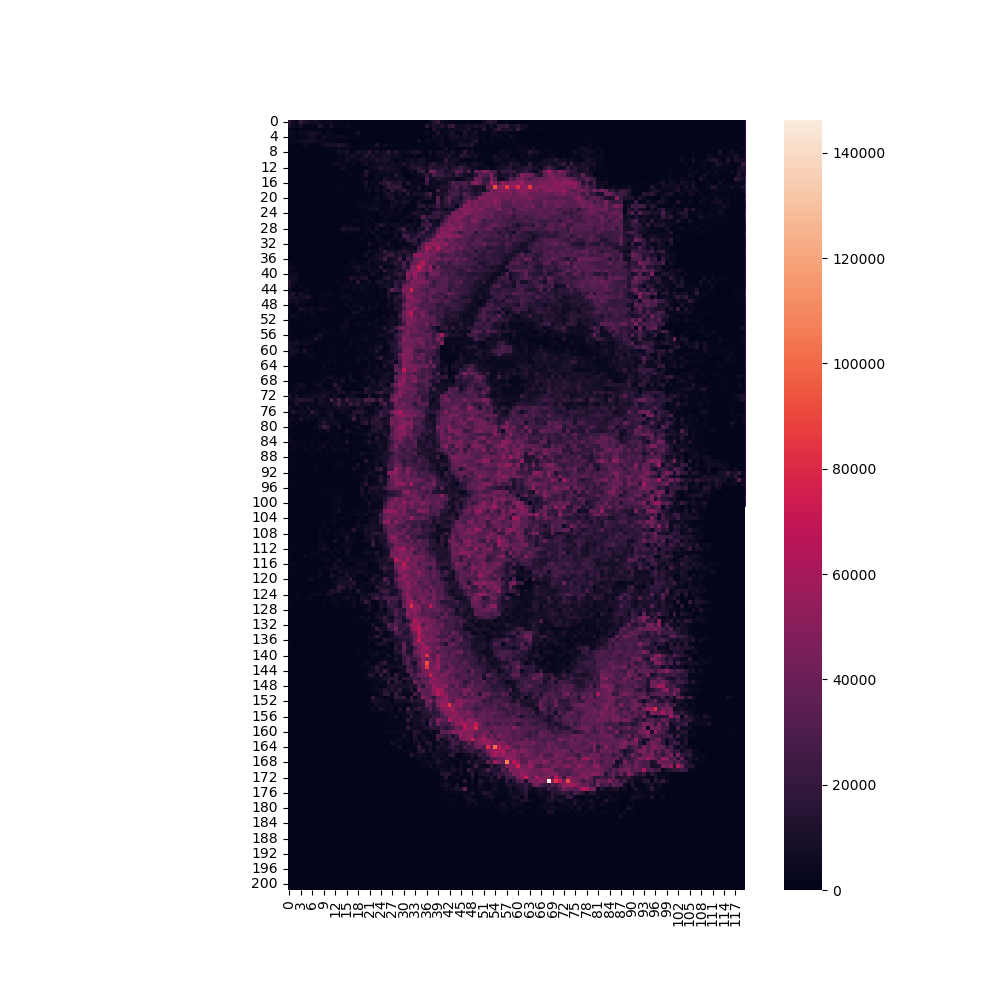

In [29]:
num_metabolites_negative = 10783
# Import metabolomics matrix only
metabolomics_matrix_256_a3_Tg_s3 = pd.read_csv('Z:/All AGE Positive TL/AL123022_AGE_256_a3_Tg_s3_pos on DESI HDMS_TLall.txt', sep = '\t', usecols = [i for i in range(3, num_metabolites_negative+3)], header = 2)
# Drop retention time
metabolomics_matrix_256_a3_Tg_s3 = metabolomics_matrix_256_a3_Tg_s3.drop(0)
# Reset index to start with 0
metabolomics_matrix_256_a3_Tg_s3 = metabolomics_matrix_256_a3_Tg_s3.reset_index(drop = True)
# Read in coordinates for metabolomics matrix
coordinates_matrix_256_a3_Tg_s3 = pd.read_csv('Z:/All AGE Positive TL/AL123022_AGE_256_a3_Tg_s3_pos on DESI HDMS_TLall.txt', sep = '\t', usecols = [i for i in range(1,3)], skiprows = 5, names = ['x_coord', 'y_coord'])
# Below we plot the ion 303.2328 (the second ion in the list)
uniform_data_256_a3_Tg_s3 = np.array(metabolomics_matrix_256_a3_Tg_s3).T.reshape([num_metabolites_negative, len(coordinates_matrix_256_a3_Tg_s3[coordinates_matrix_256_a3_Tg_s3['x_coord'] == coordinates_matrix_256_a3_Tg_s3.iloc[0][0]]), len(coordinates_matrix_256_a3_Tg_s3[coordinates_matrix_256_a3_Tg_s3['y_coord'] == coordinates_matrix_256_a3_Tg_s3.iloc[0][1]])])[metabolomics_matrix_256_a3_Tg_s3.columns.get_loc('773.5269')]
ax = sns.heatmap(uniform_data_256_a3_Tg_s3)
plt.show()

<a class="anchor" id="left_hippocampus"></a>
Below we use the segmentation tool from the mpl_interactions package. This allows us to easily trace a region of interest of an image and even spits out the coordinates for the mask we want to use!

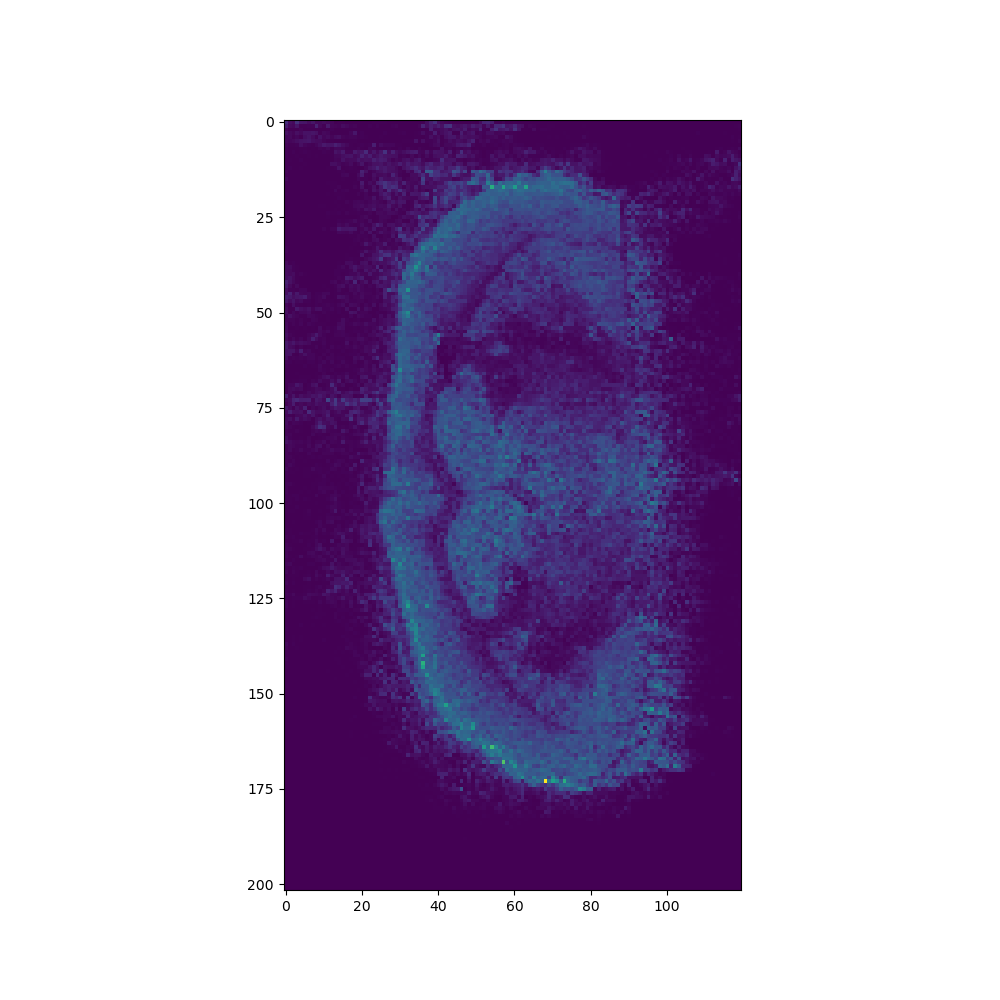

In [30]:
classes = ['Left Hippocampus']

# Define number of rois (here just 1 since we want the Left Hippocampus)
N_classes = 1
class_selector = widgets.Dropdown(options=classes, description="class")


def update(change):
    segmenter_256_a3_Tg_s3_left_hippocampus.current_class = class_selector.value
    segmenter_256_a3_Tg_s3_left_hippocampus.erasing = erasing_button.value


erasing_button = widgets.Checkbox(value=False, description="Erasing")
erasing_button.observe(update, names="value")

class_selector.observe(update, names="value")
# Define number of classes (rois) as N_classes set above
segmenter_256_a3_Tg_s3_left_hippocampus = image_segmenter(uniform_data_256_a3_Tg_s3, nclasses = N_classes, mask_alpha=0.76)
display(widgets.HBox([erasing_button, class_selector]))
display(segmenter_256_a3_Tg_s3_left_hippocampus)

Below we set all background pixels to zero, and calculate the percentages of all ions within the brain and save these results.

In [31]:
# Make variable for mask
mask_256_a3_Tg_s3_left_hippocampus = segmenter_256_a3_Tg_s3_left_hippocampus.mask
# Create mask for pixels to tell where brain matter is
coordinates_roi_256_a3_Tg_s3_left_hippocampus = pd.DataFrame(mask_256_a3_Tg_s3_left_hippocampus.reshape(len(coordinates_matrix_256_a3_Tg_s3)))
print('Number of pixels in mask:', len(coordinates_roi_256_a3_Tg_s3_left_hippocampus[coordinates_roi_256_a3_Tg_s3_left_hippocampus[0] == 1]))

# Make copy of metabolomics matrix to use as identifier of pixels for brain matter
metabolomics_matrix_256_a3_Tg_s3_for_pixel_identities_left_hippocampus = metabolomics_matrix_256_a3_Tg_s3.copy()
# Add segmentation labels to metabolomics matrix
metabolomics_matrix_256_a3_Tg_s3_for_pixel_identities_left_hippocampus['roi'] = coordinates_roi_256_a3_Tg_s3_left_hippocampus
# Specify the pixels are from the background
metabolomics_matrix_256_a3_Tg_s3_for_pixel_identities_left_hippocampus.loc[metabolomics_matrix_256_a3_Tg_s3_for_pixel_identities_left_hippocampus.roi == 0, :] = 0
# Drop identity column
metabolomics_matrix_256_a3_Tg_s3_for_pixel_identities_left_hippocampus = metabolomics_matrix_256_a3_Tg_s3_for_pixel_identities_left_hippocampus.drop(columns = 'roi')
# Save dataframe results
metabolomics_matrix_256_a3_Tg_s3_for_pixel_identities_left_hippocampus.to_csv('Z:/All AGE Positive masks and roi sums/Left Hippocampus/256_a3_Tg_s3_pixel_matrix_with_mask_left_hippocampus.csv')
metabolomics_matrix_256_a3_Tg_s3_for_pixel_identities_left_hippocampus.to_csv('N:/All AGE Positive masks and roi sums/Left Hippocampus/256_a3_Tg_s3_pixel_matrix_with_mask_left_hippocampus.csv')
# Find total number of pixels
metabolomics_matrix_256_a3_Tg_s3_for_pixel_identities_left_hippocampus_pixel_count = len(metabolomics_matrix_256_a3_Tg_s3_for_pixel_identities_left_hippocampus[metabolomics_matrix_256_a3_Tg_s3_for_pixel_identities_left_hippocampus.sum(axis = 1) != 0])

# Find total ion current for pixel spectra
sum_by_pixel = metabolomics_matrix_256_a3_Tg_s3_for_pixel_identities_left_hippocampus.sum(axis=1)
# Divide pixel values by pixel sum for all pixels
metabolomics_matrix_256_a3_Tg_s3_for_pixel_identities_left_hippocampus_tic_normalized_pixel = metabolomics_matrix_256_a3_Tg_s3_for_pixel_identities_left_hippocampus.divide(sum_by_pixel, axis=0)
# Sum values for ions
sums_of_ion_intensities_metabolomics_matrix_256_a3_Tg_s3_for_pixel_identities_left_hippocampus_tic_normalized_pixel = metabolomics_matrix_256_a3_Tg_s3_for_pixel_identities_left_hippocampus_tic_normalized_pixel.sum(axis = 0)
sums_of_ion_intensities_metabolomics_matrix_256_a3_Tg_s3_for_pixel_identities_left_hippocampus_tic_normalized_pixel.to_csv('Z:/All AGE Positive masks and roi sums/Left Hippocampus/256_a3_Tg_s3_sum_of_ions_within_left_hippocampus.csv')
# Divide by brain size to get normalized ion sums
sums_of_ion_intensities_metabolomics_matrix_256_a3_Tg_s3_for_pixel_identities_left_hippocampus_tic_normalized_pixel_normalized_brain = sums_of_ion_intensities_metabolomics_matrix_256_a3_Tg_s3_for_pixel_identities_left_hippocampus_tic_normalized_pixel/metabolomics_matrix_256_a3_Tg_s3_for_pixel_identities_left_hippocampus_pixel_count
# Take sum of all values to get total ion count
total_sum_roi_normalized_256_a3_Tg_s3_left_hippocampus = sums_of_ion_intensities_metabolomics_matrix_256_a3_Tg_s3_for_pixel_identities_left_hippocampus_tic_normalized_pixel_normalized_brain.sum()
# Divide by total ion count and multiply by 100 to get final percentage
sums_of_ion_intensities_roi_percentage_normalized_256_a3_Tg_s3_left_hippocampus = sums_of_ion_intensities_metabolomics_matrix_256_a3_Tg_s3_for_pixel_identities_left_hippocampus_tic_normalized_pixel_normalized_brain/total_sum_roi_normalized_256_a3_Tg_s3_left_hippocampus*100
sums_of_ion_intensities_roi_percentage_normalized_256_a3_Tg_s3_left_hippocampus.to_csv('Z:/All AGE Positive masks and roi sums/Left Hippocampus/256_a3_Tg_s3_percentage_of_ions_within_left_hippocampus.csv')

Number of pixels in mask: 567
